In [1]:
import pandas as                                                      #https://pandas.pydata.org/
import seaborn as sns                                                 #https://seaborn.pydata.org/generated/seaborn.heatmap.html
from scipy.stats import pearsonr                                      #https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html
import matplotlib.pyplot as plt                                       #https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html
from scipy.stats import ttest_ind                                     #https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
from scipy import stats                                               #https://docs.scipy.org/doc/scipy/tutorial/stats.html
from sklearn.preprocessing import MinMaxScaler                        #https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
import numpy as np                                                    #https://numpy.org/doc/stable/user/absolute_beginners.html
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score #https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
from sklearn.model_selection import train_test_split                  #https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.metrics import ConfusionMatrixDisplay                    #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
from sklearn.svm import SVC                                           #https://scikit-learn.org/stable/modules/svm.html
from sklearnex import patch_sklearn                                   #https://intel.github.io/scikit-learn-intelex/latest/
from sklearn import svm                                               #https://scikit-learn.org/stable/modules/svm.html
from sklearn.model_selection import GridSearchCV                      #https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.naive_bayes import GaussianNB                            #https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
from sklearn.ensemble import RandomForestClassifier                   #https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from dateutil.relativedelta import relativedelta                      #https://dateutil.readthedocs.io/en/stable/relativedelta.html
from sklearn.linear_model import LogisticRegression                   #https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html





path = "C:\\Users\\brams\\Documents\\Python\\thesis\\rl\\games_by_players.csv"
dtype_dict = {'int_column': int, 'float_column': float}


df = pd.read_csv(path, low_memory=False)

In [2]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt

In [4]:
pd.set_option('display.max_columns', None)
df.head(10)

game_id   color                   team_id team_region  \
0  616004f3143c37878b238690    blue  6020bc8ef1e4807cc700391a     Oceania   
1  616004f3143c37878b238690    blue  6020bc8ef1e4807cc700391a     Oceania   
2  616004f3143c37878b238690    blue  6020bc8ef1e4807cc700391a     Oceania   
3  616004f3143c37878b238690  orange  614c8930f8090ec745286474     Oceania   
4  616004f3143c37878b238690  orange  614c8930f8090ec745286474     Oceania   
5  616004f3143c37878b238690  orange  614c8930f8090ec745286474     Oceania   
6  616004f7143c37878b238697    blue  6020bc8ef1e4807cc700391a     Oceania   
7  616004f7143c37878b238697    blue  6020bc8ef1e4807cc700391a     Oceania   
8  616004f7143c37878b238697    blue  6020bc8ef1e4807cc700391a     Oceania   
9  616004f7143c37878b238697  orange  614c8930f8090ec745286474     Oceania   

                  player_id    player_tag  core_shots  core_goals  core_saves  \
0  5f3d8fdd95f40596eae2412e        Amphis           4           1           1   
1  5f3d8fdd95f40596eae23e01        Torsos           5           0           2   
2  5f3d8fdd95f40596eae23e53       Express           4           1           0   
3  604e562901d675f81a96b270       mel kin           2           0           6   
4  5f7ca648ea8a0f0714fb9a20         Laxin           1           0           3   
5  5f3d8fdd95f40596eae24503  Baked Potato           1           1           1   
6  5f3d8fdd95f40596eae2412e        Amphis           4           2           1   
7  5f3d8fdd95f40596eae23e01        Torsos           2           1           0   
8  5f3d8fdd95f40596eae23e53       Express           4           1           2   
9  5f3d8fdd95f40596eae24503  Baked Potato           2           2           2   

   core_assists  core_score  core_shooting_percentage  boost_bpm  boost_bcpm  \
0             0         348                      25.0      374.0   385.01580   
1             1         343                       0.0      450.0   448.96823   
2             0         230                      25.0      318.0   337.42330   
3             0         469                       0.0      435.0   446.73734   
4             0         353                       0.0      445.0   458.82135   
5             0         246                     100.0      433.0   445.99368   
6             0         499                      50.0      421.0   409.25873   
7             2         414                      50.0      443.0   480.10550   
8             1         370                      25.0      362.0   373.57166   
9             0         455                     100.0      433.0   447.40698   

   boost_avg_amount  boost_amount_collected  boost_amount_stolen  \
0             45.92                  2071.0                299.0   
1             51.26                  2415.0                763.0   
2             47.91                  1815.0                359.0   
3             53.41                  2403.0                380.0   
4             48.43                  2468.0                429.0   
5             50.55                  2399.0                535.0   
6             53.65                  2328.0                530.0   
7             55.37                  2731.0                886.0   
8             50.24                  2125.0                410.0   
9             49.89                  2545.0                197.0   

   boost_amount_collected_big  boost_amount_stolen_big  \
0                      1509.0                    183.0   
1                      1466.0                    400.0   
2                       969.0                    100.0   
3                      1721.0                    197.0   
4                      1730.0                    158.0   
5                      1743.0                    353.0   
6                      1742.0                    292.0   
7                      1910.0                    621.0   
8                      1200.0                    100.0   
9                      1755.0                      0.0   

   boost_am

In [5]:

row_count = len(df)


print(f'Total number of rows in the dataset: {row_count}')

Total number of rows in the dataset: 106795


In [6]:
distinct_count = df['player_tag'].nunique()


print("Distinct Count:", distinct_count)

Distinct Count: 1217


In [7]:
distinct_count = df['game_id'].nunique()


print("Distinct Count:", distinct_count)

Distinct Count: 17797


In [8]:
df['player_tag'] = df['player_tag'].str.lower()
df['player_tag'] = df['player_tag'].str.replace('_', ' ')
df['player_tag'] = df['player_tag'].str.replace('.', '')
distinct_names = df["player_tag"].drop_duplicates().tolist()


print(distinct_names)

['amphis', 'torsos', 'express', 'mel kin', 'laxin', 'baked potato', 'cjcj', 'fever', 'kamii', 'viic', 'rotor', 'smash', 'walcott', 'fiberr', 'misty', 'remik', 'sour', 'gus', 'cavemanben', 'siki', 'decka', 'scout', 'tobee', 'shmoopernator', 'superlachie', 'scrub', 'bananahead', 'delusion', 'lerky', 'ssteve', 'vortexioz', 'cobbo', 'snowy', 'hawk', 'spratt', 'zayd', 'tango', 'kaka', 'finn', 'shorez', 'mock', 'requiem', 'junior', 'eli', 'joel', 'spydoge', 'moss', 'le duck', 'vis', 'tonio', 'pagsi', 'bougee', 'storm', 'eckey', 'hughesy', 'caleb', 'jackay', 'ceeva', 'homie', 'change', 'tigr', 'kachow', 'scarth', 'jaffa', 'kuma', 'aimz', 'azmo', 'negative', 'airmac', 'sonic', 'civex', 'mith', 'garrettg', 'jstn', 'squishy', 'mectos', 'wondamike', 'freshness', 'retals', 'arsenal', 'sypical', 'oath', 'fefe', 'astro', 'atomic', 'turbopolsa', 'mist', 'kraziks', 'lj', 'toastie', 'rapid', 'memory', 'beastmode', 'kinseh', 'jordan', 'majicbear', 'firstkiller', 'allushin', 'ayyjayy', 'lionblaze', 'roll

C:\Users\brams\AppData\Local\Temp\ipykernel_3700\3706837938.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['player_tag'] = df['player_tag'].str.replace('.', '')


In [9]:
path2 = "C:\\Users\\brams\\Documents\\Python\\thesis\\rl\\age2.csv"
df2 = pd.read_csv(path2, low_memory=False)
df2.loc[df2['name'] == 'SquishyMuffinz', 'name'] = 'squishy'
df2.loc[df2['name'] == 'Scrub_(Australian_Player)', 'name'] = 'scrub'
df2.loc[df2['name'] == 'Fairy_Peak', 'name'] = 'fairy peak!'
df2['name'] = df2['name'].str.replace('_', ' ')
df2['name'] = df2['name'].str.lower()





distinct_names2 = df2["name"].drop_duplicates().tolist()


print(distinct_names2)

['( april )', '0ver zer0', '1zen', '2die4', '2fast', '2piece', '43', '4ngryman', '5bs', '7111', 'akkinn', 'andythemandy', 'asn rubiix', 'ayyjayy', 'azapatos', 'a random chicken', 'aarongilllive', 'abdulaziz', 'abeogand', 'abood', 'abscrazy', 'absolutolik', 'absorbentkarma', 'abulba', 'abyssial', 'acaraje', 'accro', 'achieves', 'achunl2', 'acqua', 'acronik', 'acrox88', 'adam baguette', 'addzey', 'ados', 'adot', 'adren', 'adriandro', 'adum', 'adverse', 'adzer', 'aech', 'aenia', 'aeon', 'agitate', 'agüesome', 'ahduhm', 'ahmad', 'aidanseesthings', 'aiipa', 'aimz', 'air', 'airmac', 'ajc', 'ajay', 'ajg', 'ajwww 1904', 'akame', 'akenro', 'akikansu', 'akira90', 'akwack', 'al0t', 'alraz', 'al dente', 'alaindodger', 'alanis', 'alerl', 'alecstorm8', 'alee', 'aleksiii', 'alem', 'alessio', 'alex161', 'alex837', 'alexthecaster', 'ali', 'aliagator', 'alik ander', 'alka', 'alligatorsaurus', 'allushin', 'alluvis', 'alpa', 'alpe', 'alpha54', 'alphakep', 'alter', 'alternix', 'alyiuu', 'amari', 'amatel', 

In [10]:
df2

DOB       name
0     18-12-2002  ( april )
1       2-9-1996  0ver zer0
2      12-6-2003       1zen
3       3-6-2005      2die4
4       9-8-2000      2fast
...          ...        ...
2793   18-9-2001     zspeed
2794    1-1-1970      zukoe
2795    1-1-1970      zurdo
2796   16-7-2000    zzrotex
2797    1-1-1970  álex polo

[2798 rows x 2 columns]

In [11]:
set1 = set(distinct_names)
set2 = set(distinct_names2)


common_elements = set1.intersection(set2)


common_count = len(common_elements)


print("Common elements:", common_elements)
print("Number of common elements:", common_count)

## streepjes zorgen ervoor dat namen niet kloppen

Common elements: {'archie', 'cyrax', 'vis', 'ianpinheiro', 'arinko', 'aztromick', 'pabl0', 'trstn', 'eclipse', 'derk', 'blu3y', 'snaz', 'fearlesscarrot', 'civex', 'baait', 'pulga', 'seeb', 'bananahead', 'jushu', 'oath', 'astro', 'lostt', 'rexo', 'ghostfire', 'cruzza', 'karma', 'cypso', 'rizex45', 'ivn', 'leakez', 'abulba', 'vortex', 'eleven', 'comm', 'tristn', 'joyo', 'renanx', 'mikan', 'butters', '5bs', 'luke', 'atomic', 'polar', 'mathz', 'eizo', 'noly', 'tgex', 'cyrix', 'torment', 'srnaniitou', 'geb', 'smash', 'beastmode', 'apparentlyjack', 'benniiz', 'shotzyy', 'jay', 'nikko', 'rise', 'mesho', 'isuquin', 'billy', 'maakaan', 'boy974s', 'septer', 'chace', 'tool', 'eris', 'cjcj', 'turinturo', 'naoki', 'shuka', 'ripoopi', 'jocse', 'res', 'xpurt', 'diaz', 'klawzt', 'forky', 'pagsi', 'tander', 'aza', 'panzer', 'the optimistic noob', 'flakes', 'alem', 'moss', 'scorcher', 'deevo', 'sen horo', 'junior', 'superlachie', 'kei', 'faisal', 'hiro m', 'pryyme', 'snowy', 'buddy', 'ballerrees', 'yanx

In [12]:
result = set1 - set2
result_list = list(result)
print("Elements in list1 but not in list2:", result_list)

Elements in list1 but not in list2: ['lixon', 'mkblack 41', 'tenpuraaaa', 'arcana', 'slow9611', 'ymto', 'true jeff', 'logic', 'kanoso', 'mohammed', 'rikocha', 'amukk', 'majide-deluxe', 'never', 'frwz', 'rhinofury', 'davidnicholai', 'kasumi momoshiro', 'f9', 'krono', 'sub-zero', 'hexa is tired', 'fantasy', 'masshu1st', 'kaka0/\\mame', 'gwlany', 'krysis', 'light', 'kneeknow', 'dam', 'craggles', 'winters', 'aimen', 'sola', 'engee', 'aruphy', 'naspire', 'amaryllis', 'bori', 'ixkillerx', 'nite', 'kadenp', 'fettic', 'bigfootboss26', 'arrow of lights', 'syuep', 'penju', 'errorless', 'starlord', 'fares', 'lorelei', 'strelitzia', '*yasudon*', 'nayr', 'david', 'bonzer', 'davindson', 'rhythmia', 'melt', 'eggnogg', 'slumdogg', 'maelstrom9508', 'akezorarara', 'nfloopy', 'hencov1d', 'takosuke', 'kz', 'creativix4', 'aljezz', 'whiiskydrink', 'niko', 'frostyy', 'tanukin', 'ovampiierz', 'serenity', 'jamity', 'dumbwaystodie', 'yii2 3', 'zeus', 'zhearx', 'fetelix', 'php', 'turtle crab and kaelu', 'mns', '

In [13]:
df2 = df2.rename(columns={'name': 'player_tag'})

In [14]:
merged_df = df.merge(df2, on='player_tag', how='left')

In [15]:
merged_df

game_id   color                   team_id  \
0       616004f3143c37878b238690    blue  6020bc8ef1e4807cc700391a   
1       616004f3143c37878b238690    blue  6020bc8ef1e4807cc700391a   
2       616004f3143c37878b238690    blue  6020bc8ef1e4807cc700391a   
3       616004f3143c37878b238690  orange  614c8930f8090ec745286474   
4       616004f3143c37878b238690  orange  614c8930f8090ec745286474   
...                          ...     ...                       ...   
106790  62f99ac9c437fde7e02daf25    blue  6020bd98f1e4807cc700dc74   
106791  62f99ac9c437fde7e02daf25    blue  6020bd98f1e4807cc700dc74   
106792  62f99ac9c437fde7e02daf25  orange  6020bc70f1e4807cc70023a5   
106793  62f99ac9c437fde7e02daf25  orange  6020bc70f1e4807cc70023a5   
106794  62f99ac9c437fde7e02daf25  orange  6020bc70f1e4807cc70023a5   

          team_region                 player_id   player_tag  core_shots  \
0             Oceania  5f3d8fdd95f40596eae2412e       amphis           4   
1             Oceania  5f3d8fdd95f40596eae23e01       torsos           5   
2             Oceania  5f3d8fdd95f40596eae23e53      express           4   
3             Oceania  604e562901d675f81a96b270      mel kin           2   
4             Oceania  5f7ca648ea8a0f0714fb9a20        laxin           1   
...               ...                       ...          ...         ...   
106790         Europe  5f3d8fdd95f40596eae240d2  m0nkey m00n           4   
106791         Europe  5fd40fc10e831f1d52bd96a5       seikoo           3   
106792  North America  5f3d8fdd95f40596eae23d8f       jknaps           2   
106793  North America  5f3d8fdd95f40596eae23dba      chicago           2   
106794  North America  5f3d8fdd95f40596eae23fe6       atomic           1   

        core_goals  core_saves  core_assists  core_score  \
0                1           1             0         348   
1                0           2             1         343   
2                1           0             0         230   
3                0           6             0         469   
4                0           3             0         353   
...            ...         ...           ...         ...   
106790           1           0             2         400   
106791           0           2             1         325   
106792           0           3             0         412   
106793           0           2             0         294   
106794           0           0             0          88   

        core_shooting_percentage  boost_bpm  boost_bcpm  boost_avg_amount  \
0                           25.0      374.0   385.01580             45.92   
1                            0.0      450.0   448.96823             51.26   
2                           25.0      318.0   337.42330             47.91   
3                            0.0      435.0   446.73734             53.41   
4                            0.0      445.0   458.82135             48.43   
...                          ...        ...         ...               ...   
106790                      25.0      380.0   388.65115             49.52   
106791                       0.0      378.0   400.37210             54.93   
106792                       0.0      443.0   448.18604             48.78   
106793                       0.0      431.0   451.90698             50.05   
106794                       0.0      420.0   443.16278             51.11   

        boost_amount_collected  boost_amount_stolen  \
0                       2071.0                299.0   
1                       2415.0                763.0   
2                       1815.0                359.0   
3                       2403.0                380.0   
4                       2468.0                429.0   
...                        ...                  ...   
106790                  2089.0                127.0   
106791                  2152.0                288.0   
106792                  2409.0                825.0   
106793                  2429.0                589.0   
106794              

In [16]:
missing_values_count = merged_df['DOB'].isna().sum()


print("Number of missing values:", missing_values_count)

Number of missing values: 13931


In [17]:
filtered_df = merged_df[merged_df['DOB'].isna()]


filtered_df

game_id   color                   team_id  \
21      61614e40f8090ec74528706b  orange  6156d4db143c37878b238367   
22      61614e40f8090ec74528706b  orange  6156d4db143c37878b238367   
27      61614e45143c37878b2387b8  orange  6156d4db143c37878b238367   
29      61614e45143c37878b2387b8  orange  6156d4db143c37878b238367   
33      61614e4a143c37878b2387bf  orange  6156d4db143c37878b238367   
...                          ...     ...                       ...   
105568  62eec397da9d7ca1c7bb31a3  orange  61845f24f8090ec74528af10   
105576  62eec565c437fde7e02dab98  orange  61845f24f8090ec74528af10   
105581  62eec75dc437fde7e02dab9f  orange  61845f24f8090ec74528af10   
105588  62eec917c437fde7e02daba6  orange  61845f24f8090ec74528af10   
105594  62eecabec437fde7e02dabad  orange  61845f24f8090ec74528af10   

               team_region                 player_id player_tag  core_shots  \
21                 Oceania  5f5ae860c6cbf591c568a505       viic           1   
22                 Oceania  5f5ae860c6cbf591c568a506      rotor           0   
27                 Oceania  5f5ae860c6cbf591c568a505       viic           3   
29                 Oceania  5f5ae860c6cbf591c568a506      rotor           0   
33                 Oceania  5f5ae860c6cbf591c568a506      rotor           3   
...                    ...                       ...        ...         ...   
105568  Sub-Saharan Africa  60c469b99fc1a47e5f11196f      daisy           1   
105576  Sub-Saharan Africa  60c469b99fc1a47e5f11196f      daisy           1   
105581  Sub-Saharan Africa  60c469b99fc1a47e5f11196f      daisy           1   
105588  Sub-Saharan Africa  60c469b99fc1a47e5f11196f      daisy           1   
105594  Sub-Saharan Africa  60c469b99fc1a47e5f11196f      daisy           4   

        core_goals  core_saves  core_assists  core_score  \
21               0           2             0         257   
22               0           2             0         247   
27               1           2             1         469   
29               0           1             0         124   
33               1           3             1         479   
...            ...         ...           ...         ...   
105568           0           3             0         306   
105576           0           2             2         317   
105581           0           3             0         359   
105588           0           2             0         224   
105594           0           1             0         278   

        core_shooting_percentage  boost_bpm  boost_bcpm  boost_avg_amount  \
21                      0.000000      388.0   426.42690             47.79   
22                      0.000000      399.0   450.51310             48.07   
27                     33.333333      376.0   387.76110             38.51   
29                      0.000000      416.0   458.07300             50.45   
33                     33.333333      418.0   398.95303             46.25   
...                          ...        ...         ...               ...   
105568                  0.000000      434.0   439.65598             45.79   
105576                  0.000000      401.0   394.17477             42.62   
105581                  0.000000      422.0   423.39285             47.26   
105588                  0.000000      459.0   463.12515             53.44   
105594                  0.000000      451.0   470.22528             46.06   

        boost_amount_collected  boost_amount_stolen  \
21                      2514.0                364.0   
22                      2656.0                317.0   
27                      2410.0                288.0   
29                      2847.0                510.0   
33                      2388.0                346.0   
...                        ...                  ...   
105568                  2360.0                489.0   
105576                  2233.0                405.0   
105581                  2225.0                235.0   
105588                  2582.0         

In [18]:
distinct_player_tags = filtered_df['player_tag'].unique()


print(distinct_player_tags)

['viic' 'rotor' 'eckey' 'savvyseal' 'dumbwaystodie' 'balloon' 'ch/&k$"!'
 'panjut' 'darkelimination' 'zayn' 'dabbod14' 'david' 'yogurt' 'seb 1143'
 'lixon' 'penju' 'sqqp' 'slk' 'onyx' 'cyan' 'bustanji' 'rustycolt'
 'k-nine' 'broski' 'dann' 'chaos adm' 'amaryllis' 'sun on run'
 'ovampiierz' 'fahad77' 'bodi' 'm7md8noop' 'evil97' 'lightning !'
 'wondercake' 'hasyimf' 'bmendesantos' 'aguz' 'artezzy' 'manteca' 'kisai'
 'bratiche' 'ipa   ' 'rayio' 'netao' 'caden' 'dam' 'sola' 'nipo' 'kz'
 'krilin' 'onrush' 'harutiki' 'lemni' 'turtle crab and kaelu' 'arcana'
 'yaki!' 'yukkkke' 'takosuke' 'toki' 'arodra' 'abechantv' 'masshu1st'
 'kor la' 'fettic' 'vital' 'komeno 333' 'jealous' 'ura' 'justomon' 'daisy'
 'entity ' 'li0n' 'mrlow' 'rocky' 'lux27' 'frostyy' 'langnekprof' 'shyon'
 'margio95' 'ilycoffeee' 'true jeff' 'richardh 04' 'kadenp' 'casesleet ds'
 'nooitboet' 'jwe' 'niko2kanta' 'nez' 'porra07' 'dece1ver'
 'kenobiwan10x x' 'maelstrom9508' 'bread' 'naspire' 'sharmajikabeta'
 'jayk' 'karthikb351

In [19]:
filtered_df2 = merged_df[merged_df['DOB'] == '1-1-1970']


filtered_df2

game_id   color                   team_id  \
3       616004f3143c37878b238690  orange  614c8930f8090ec745286474   
11      616004f7143c37878b238697  orange  614c8930f8090ec745286474   
16      616004fc143c37878b23869e  orange  614c8930f8090ec745286474   
41      616150a6f8090ec74528710c  orange  6091ad1bd50a7d046663343d   
47      616150aa143c37878b238860  orange  6091ad1bd50a7d046663343d   
...                          ...     ...                       ...   
105600  62ee920ec437fde7e02dab05  orange  621cd6a8c437fde7e02d129b   
105606  62ee9435c437fde7e02dab0c  orange  621cd6a8c437fde7e02d129b   
105611  62ee9620c437fde7e02dab13  orange  621cd6a8c437fde7e02d129b   
105618  62ee983ac437fde7e02dab28  orange  621cd6a8c437fde7e02d129b   
105622  62ee9b84da9d7ca1c7bb3148  orange  621cd6a8c437fde7e02d129b   

               team_region                 player_id  player_tag  core_shots  \
3                  Oceania  604e562901d675f81a96b270     mel kin           2   
11                 Oceania  604e562901d675f81a96b270     mel kin           2   
16                 Oceania  604e562901d675f81a96b270     mel kin           2   
41                 Oceania  605961fb426b95b9dd51146d         gus           0   
47                 Oceania  605961fb426b95b9dd51146d         gus           2   
...                    ...                       ...         ...         ...   
105600  Asia-Pacific North  6283a688c437fde7e02d6a13  commutator           1   
105606  Asia-Pacific North  6283a688c437fde7e02d6a13  commutator           1   
105611  Asia-Pacific North  6283a688c437fde7e02d6a13  commutator           2   
105618  Asia-Pacific North  6283a688c437fde7e02d6a13  commutator           2   
105622  Asia-Pacific North  6283a688c437fde7e02d6a13  commutator           3   

        core_goals  core_saves  core_assists  core_score  \
3                0           6             0         469   
11               0           1             1         274   
16               1           2             1         362   
41               0           0             0         174   
47               1           0             0         284   
...            ...         ...           ...         ...   
105600           0           0             0          98   
105606           0           0             0         102   
105611           1           2             1         378   
105618           0           2             0         228   
105622           0           6             3         762   

        core_shooting_percentage  boost_bpm  boost_bcpm  boost_avg_amount  \
3                            0.0      435.0   446.73734             53.41   
11                           0.0      394.0   424.72900             45.99   
16                          50.0      409.0   423.62302             48.22   
41                           0.0      459.0   472.08792             53.92   
47                          50.0      471.0   507.89407             55.03   
...                          ...        ...         ...               ...   
105600                       0.0      395.0   388.07510             40.10   
105606                       0.0      353.0   377.54736             39.91   
105611                      50.0      395.0   423.53357             43.29   
105618                       0.0      432.0   454.52222             37.78   
105622                       0.0      368.0   389.76685             44.39   

        boost_amount_collected  boost_amount_stolen  \
3                       2403.0                380.0   
11                      2416.0                217.0   
16                      2556.0                282.0   
41                      2506.0                221.0   
47                      3040.0                796.0   
...                        ...                  ...   
105600                  2380.0                572.0   
105606                  2112.0                505.0   
105611                  2396.0                497.0   
105618                  266

In [20]:
final_df = merged_df[(merged_df['DOB'] != '1-1-1970') & (~merged_df['DOB'].isna())]
final_df

game_id   color                   team_id  \
0       616004f3143c37878b238690    blue  6020bc8ef1e4807cc700391a   
1       616004f3143c37878b238690    blue  6020bc8ef1e4807cc700391a   
2       616004f3143c37878b238690    blue  6020bc8ef1e4807cc700391a   
4       616004f3143c37878b238690  orange  614c8930f8090ec745286474   
5       616004f3143c37878b238690  orange  614c8930f8090ec745286474   
...                          ...     ...                       ...   
106790  62f99ac9c437fde7e02daf25    blue  6020bd98f1e4807cc700dc74   
106791  62f99ac9c437fde7e02daf25    blue  6020bd98f1e4807cc700dc74   
106792  62f99ac9c437fde7e02daf25  orange  6020bc70f1e4807cc70023a5   
106793  62f99ac9c437fde7e02daf25  orange  6020bc70f1e4807cc70023a5   
106794  62f99ac9c437fde7e02daf25  orange  6020bc70f1e4807cc70023a5   

          team_region                 player_id    player_tag  core_shots  \
0             Oceania  5f3d8fdd95f40596eae2412e        amphis           4   
1             Oceania  5f3d8fdd95f40596eae23e01        torsos           5   
2             Oceania  5f3d8fdd95f40596eae23e53       express           4   
4             Oceania  5f7ca648ea8a0f0714fb9a20         laxin           1   
5             Oceania  5f3d8fdd95f40596eae24503  baked potato           1   
...               ...                       ...           ...         ...   
106790         Europe  5f3d8fdd95f40596eae240d2   m0nkey m00n           4   
106791         Europe  5fd40fc10e831f1d52bd96a5        seikoo           3   
106792  North America  5f3d8fdd95f40596eae23d8f        jknaps           2   
106793  North America  5f3d8fdd95f40596eae23dba       chicago           2   
106794  North America  5f3d8fdd95f40596eae23fe6        atomic           1   

        core_goals  core_saves  core_assists  core_score  \
0                1           1             0         348   
1                0           2             1         343   
2                1           0             0         230   
4                0           3             0         353   
5                1           1             0         246   
...            ...         ...           ...         ...   
106790           1           0             2         400   
106791           0           2             1         325   
106792           0           3             0         412   
106793           0           2             0         294   
106794           0           0             0          88   

        core_shooting_percentage  boost_bpm  boost_bcpm  boost_avg_amount  \
0                           25.0      374.0   385.01580             45.92   
1                            0.0      450.0   448.96823             51.26   
2                           25.0      318.0   337.42330             47.91   
4                            0.0      445.0   458.82135             48.43   
5                          100.0      433.0   445.99368             50.55   
...                          ...        ...         ...               ...   
106790                      25.0      380.0   388.65115             49.52   
106791                       0.0      378.0   400.37210             54.93   
106792                       0.0      443.0   448.18604             48.78   
106793                       0.0      431.0   451.90698             50.05   
106794                       0.0      420.0   443.16278             51.11   

        boost_amount_collected  boost_amount_stolen  \
0                       2071.0                299.0   
1                       2415.0                763.0   
2                       1815.0                359.0   
4                       2468.0                429.0   
5                       2399.0                535.0   
...                        ...                  ...   
106790                  2089.0                127.0   
106791                  2152.0                288.0   
106792                  2409.0                825.0   
106793                  2429.0                589.0   
106794  

In [21]:
final_df = final_df.copy()


final_df.loc[:, 'DOB'] = pd.to_datetime(final_df['DOB'], format='%d-%m-%Y')


reference_date = pd.to_datetime('1-10-2022', format='%d-%m-%Y')


final_df.loc[:, 'Age'] = (reference_date - final_df['DOB']).astype('<m8[Y]').astype(int)


final_df = final_df.drop(['game_id', 'color','player_id','platform','car_id','steering_sensitivity','camera_fov','camera_height','camera_pitch','camera_distance','camera_stiffness','camera_swivel_speed','camera_transition_speed','team_id'], axis=1)


final_df

team_region    player_tag  core_shots  core_goals  core_saves  \
0             Oceania        amphis           4           1           1   
1             Oceania        torsos           5           0           2   
2             Oceania       express           4           1           0   
4             Oceania         laxin           1           0           3   
5             Oceania  baked potato           1           1           1   
...               ...           ...         ...         ...         ...   
106790         Europe   m0nkey m00n           4           1           0   
106791         Europe        seikoo           3           0           2   
106792  North America        jknaps           2           0           3   
106793  North America       chicago           2           0           2   
106794  North America        atomic           1           0           0   

        core_assists  core_score  core_shooting_percentage  boost_bpm  \
0                  0         348                      25.0      374.0   
1                  1         343                       0.0      450.0   
2                  0         230                      25.0      318.0   
4                  0         353                       0.0      445.0   
5                  0         246                     100.0      433.0   
...              ...         ...                       ...        ...   
106790             2         400                      25.0      380.0   
106791             1         325                       0.0      378.0   
106792             0         412                       0.0      443.0   
106793             0         294                       0.0      431.0   
106794             0          88                       0.0      420.0   

        boost_bcpm  boost_avg_amount  boost_amount_collected  \
0        385.01580             45.92                  2071.0   
1        448.96823             51.26                  2415.0   
2        337.42330             47.91                  1815.0   
4        458.82135             48.43                  2468.0   
5        445.99368             50.55                  2399.0   
...            ...               ...                     ...   
106790   388.65115             49.52                  2089.0   
106791   400.37210             54.93                  2152.0   
106792   448.18604             48.78                  2409.0   
106793   451.90698             50.05                  2429.0   
106794   443.16278             51.11                  2382.0   

        boost_amount_stolen  boost_amount_collected_big  \
0                     299.0                      1509.0   
1                     763.0                      1466.0   
2                     359.0                       969.0   
4                     429.0                      1730.0   
5                     535.0                      1743.0   
...                     ...                         ...   
106790                127.0                      1085.0   
106791                288.0                      1423.0   
106792                825.0                      1630.0   
106793                589.0                      1873.0   
106794                667.0                      1803.0   

        boost_amount_stolen_big  boost_amount_collected_small  \
0                         183.0                         562.0   
1                         400.0                         949.0   
2                         100.0                         846.0   
4                         158.0                         738.0   
5                         353.0                         656.0   
...                         ...                           ...   
106790                      0.0                        1004.0   
106791                    157.0                         729.0   
106792                    568.0                         779.0   
106793                    354.0                         556.0   
106794                    395.0        

In [22]:
                                            # EDA

In [23]:
#missing values
na_counts_without_0 = (final_df.isna() & (final_df != 0)).sum()




na_columns_without_0 = na_counts_without_0[na_counts_without_0 > 0]
print(na_columns_without_0)

na_rows = final_df[final_df.isna().any(axis=1)]

na_rows

team_region                117
boost_bpm                  999
boost_bcpm                 999
boost_avg_amount           999
boost_amount_collected     999
                          ... 
demo_inflicted             999
demo_taken                 999
advanced_rating              2
platform_id               1058
car_name                  1058
Length: 79, dtype: int64


team_region   player_tag  core_shots  core_goals  core_saves  \
1602          Oceania        lerky           2           2           2   
1603          Oceania     delusion           3           0           0   
1604          Oceania       ssteve           2           0           1   
1605          Oceania       fiberr           3           1           0   
1606          Oceania        misty           1           0           2   
...               ...          ...         ...         ...         ...   
106280  North America  firstkiller           2           1           3   
106281  North America      ayyjayy           5           1           1   
106282  South America          kv1           4           1           0   
106283  South America        lostt           2           0           3   
106284  South America    aztromick           3           0           4   

        core_assists  core_score  core_shooting_percentage  boost_bpm  \
1602               0         480                100.000000      424.0   
1603               1         260                  0.000000      468.0   
1604               1         239                  0.000000      377.0   
1605               0         270                 33.333333      404.0   
1606               1         242                  0.000000      435.0   
...              ...         ...                       ...        ...   
106280             1         648                  0.000000        NaN   
106281             1         420                  0.000000        NaN   
106282             0         274                  0.000000        NaN   
106283             1         455                  0.000000        NaN   
106284             0         526                  0.000000        NaN   

        boost_bcpm  boost_avg_amount  boost_amount_collected  \
1602     421.35974             44.99                  2383.0   
1603     455.30902             53.32                  2575.0   
1604     355.75990             42.55                  2012.0   
1605     425.60342             54.21                  2407.0   
1606     414.28700             56.59                  2343.0   
...            ...               ...                     ...   
106280         NaN               NaN                     NaN   
106281         NaN               NaN                     NaN   
106282         NaN               NaN                     NaN   
106283         NaN               NaN                     NaN   
106284         NaN               NaN                     NaN   

        boost_amount_stolen  boost_amount_collected_big  \
1602                  417.0                      1750.0   
1603                  471.0                      1952.0   
1604                  759.0                      1271.0   
1605                  453.0                      1876.0   
1606                  481.0                      1668.0   
...                     ...                         ...   
106280                  NaN                         NaN   
106281                  NaN                         NaN   
106282                  NaN                         NaN   
106283                  NaN                         NaN   
106284                  NaN                         NaN   

        boost_amount_stolen_big  boost_amount_collected_small  \
1602                      196.0                         633.0   
1603                      248.0                         623.0   
1604                      531.0                         741.0   
1605                      245.0                         531.0   
1606                      308.0                         675.0   
...                         ...                           ...   
106280                      NaN                           NaN   
106281                      NaN                           NaN   
106282                      NaN                           NaN   
106283                      NaN                           NaN   
106284                      NaN                    

In [24]:
# delete missing values
final_df = final_df.dropna(subset=['boost_bpm'])



#nan_check = x.isna().any()


#nan_check

In [25]:
#--------------------- graphs

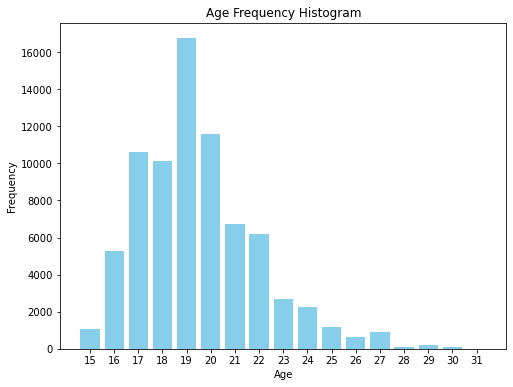

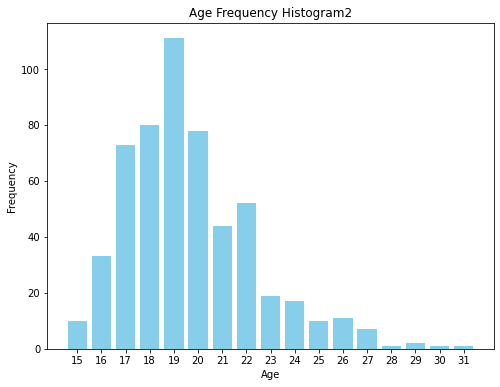

In [26]:
age_frequency = final_df['Age'].value_counts().reset_index()


age_frequency.columns = ['Age', 'Frequency']


age_frequency = age_frequency.sort_values(by='Frequency')

plt.figure(figsize=(8, 6))
plt.bar(age_frequency['Age'], age_frequency['Frequency'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Frequency Histogram')
plt.xticks(age_frequency['Age'])
plt.show()

#-----------------------------------
distinct_players = final_df.drop_duplicates(subset=['player_tag'])
age_frequency2 = distinct_players['Age'].value_counts().reset_index()


age_frequency2.columns = ['Age', 'Frequency']


age_frequency2 = age_frequency2.sort_values(by='Frequency')

plt.figure(figsize=(8, 6))
plt.bar(age_frequency2['Age'], age_frequency2['Frequency'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Frequency Histogram2')
plt.xticks(age_frequency2['Age'])
plt.show()







#-----------------------------


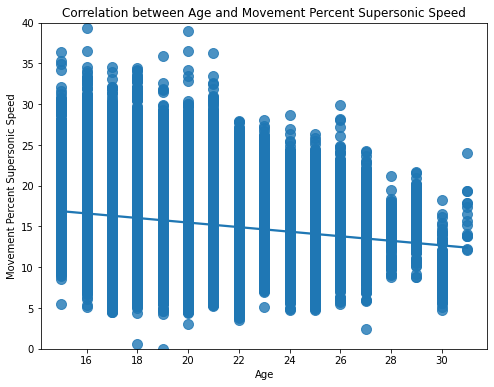

In [27]:

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.regplot(x='Age', y='movement_percent_supersonic_speed', data=final_df, scatter_kws={'s': 100})


plt.ylim(0, 40)


plt.title('Correlation between Age and Movement Percent Supersonic Speed')
plt.xlabel('Age')
plt.ylabel('Movement Percent Supersonic Speed')


plt.show()

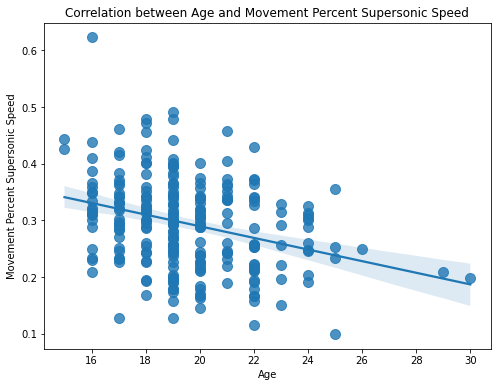

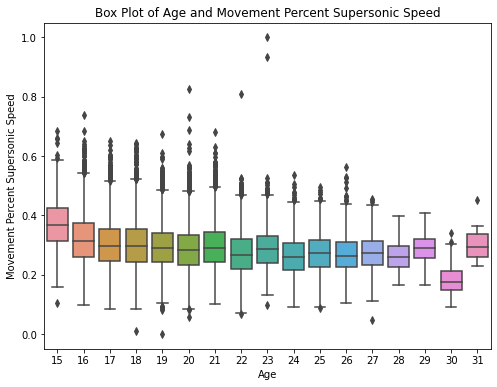

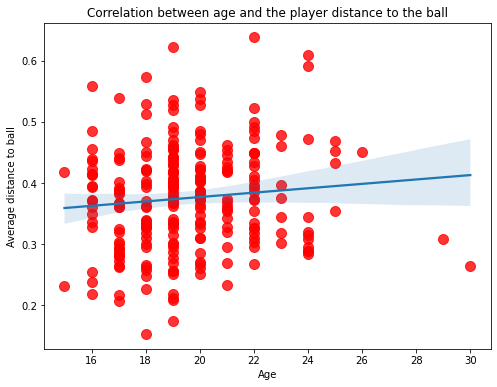

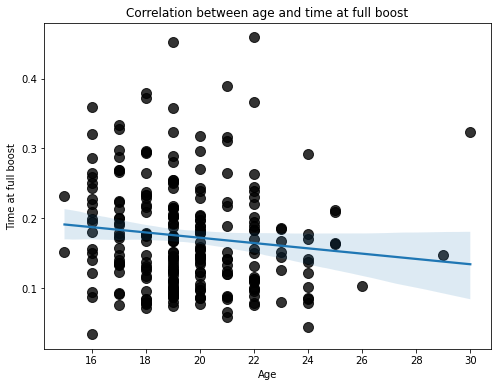

In [324]:
df_downsampled = final_df.sample(n=250, random_state=1) 


plt.figure(figsize=(8, 6))
sns.regplot(x='Age', y='movement_percent_supersonic_speed', data=df_downsampled, scatter_kws={'s': 100, 'marker': 'o'})





plt.title('Correlation between Age and Movement Percent Supersonic Speed')
plt.xlabel('Age')
plt.ylabel('Movement Percent Supersonic Speed')


plt.show()

#------------------------------------------------------------


plt.figure(figsize=(8, 6))
sns.boxplot(x='Age', y='movement_percent_supersonic_speed', data=final_df)




plt.title('Box Plot of Age and Movement Percent Supersonic Speed')
plt.xlabel('Age')
plt.ylabel('Movement Percent Supersonic Speed')


plt.show()


#---------------------------------------------
plt.figure(figsize=(8, 6))
sns.regplot(x='Age', y='positioning_avg_distance_to_ball_possession', data=df_downsampled, scatter_kws={'s': 100, 'marker': 'o', 'color' : 'red'})




plt.title('Correlation between age and the player distance to the ball')
plt.xlabel('Age')
plt.ylabel('Average distance to ball')


plt.show()

#----------------------------------------------------



plt.figure(figsize=(8, 6))
sns.regplot(x='Age', y='boost_time_full_boost', data=df_downsampled, scatter_kws={'s': 100, 'marker': 'o','color': 'black'})




plt.title('Correlation between age and time at full boost')
plt.xlabel('Age')
plt.ylabel('Time at full boost')


plt.show()

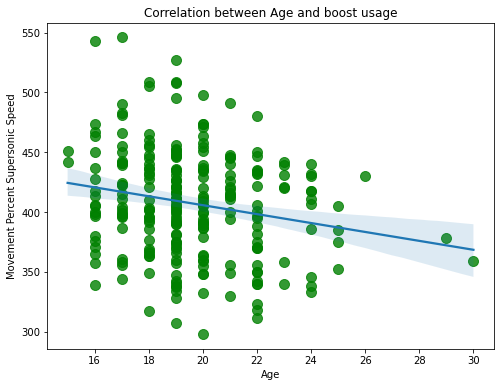

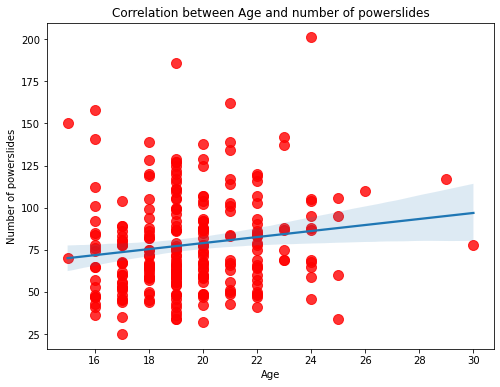

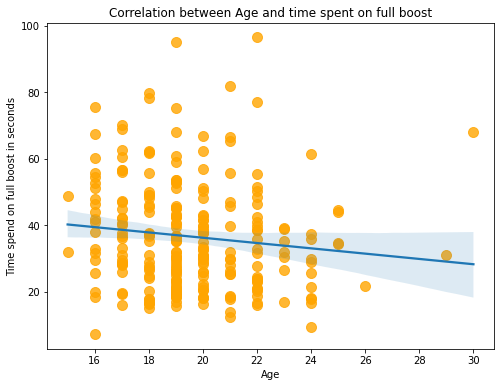

In [532]:
df_downsampled = final_featureengi.sample(n=250, random_state=1) 



plt.figure(figsize=(8, 6))
sns.regplot(x='Age', y='boost_bpm', data=df_downsampled, scatter_kws={'s': 100, 'marker': 'o','color': 'green'})

plt.title('Correlation between Age and boost usage')
plt.xlabel('Age')
plt.ylabel('Movement Percent Supersonic Speed')


plt.show()

#----------------------------------------------------------


plt.figure(figsize=(8, 6))
sns.regplot(x='Age', y='movement_count_powerslide', data=df_downsampled, scatter_kws={'s': 100, 'marker': 'o','color': 'red'})





plt.title('Correlation between Age and number of powerslides')
plt.xlabel('Age')
plt.ylabel('Number of powerslides')


plt.show()

#----------------------------------------------------------


plt.figure(figsize=(8, 6))
sns.regplot(x='Age', y='boost_time_full_boost', data=df_downsampled, scatter_kws={'s': 100, 'marker': 'o','color': 'orange'})





plt.title('Correlation between Age and time spent on full boost')
plt.xlabel('Age')
plt.ylabel('Time spend on full boost in seconds')


plt.show()




In [378]:




age = final_featureengi['Age']
movement_count_powerslide = final_featureengi['core_saves']


correlation_coefficient, p_value = pearsonr(age, movement_count_powerslide)


print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: -0.052082439499831434
P-value: 4.580003337115272e-47


In [600]:



age = final_featureengi['Age']
movement_count_powerslide = final_featureengi['movement_count_powerslide']


correlation_coefficient, p_value = pearsonr(age, movement_count_powerslide)


print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")



Pearson Correlation Coefficient: 0.15708116174155642
P-value: 0.0
The correlation is statistically significant.


In [590]:
final_bin_region

team_region   player_tag  core_shots  core_goals  core_saves  \
2124    North America       retals    0.428571    0.333333    0.333333   
2125    North America      arsenal    0.285714    0.333333    0.111111   
2126    North America      sypical    0.000000    0.000000    0.222222   
2127    North America         oath    0.214286    0.000000    0.333333   
2128    North America         fefe    0.285714    0.000000    0.000000   
...               ...          ...         ...         ...         ...   
106790         Europe  m0nkey m00n    0.285714    0.166667    0.000000   
106791         Europe       seikoo    0.214286    0.000000    0.222222   
106792  North America       jknaps    0.142857    0.000000    0.333333   
106793  North America      chicago    0.142857    0.000000    0.222222   
106794  North America       atomic    0.071429    0.000000    0.000000   

        core_assists  core_score  core_shooting_percentage  boost_bpm  \
2124           0.125    0.734735                  0.111111   0.721943   
2125           0.125    0.513514                  0.166667   0.611390   
2126           0.125    0.267267                  0.000000   0.713568   
2127           0.000    0.434434                  0.000000   0.559464   
2128           0.000    0.192192                  0.000000   0.616415   
...              ...         ...                       ...        ...   
106790         0.250    0.400400                  0.083333   0.571189   
106791         0.125    0.325325                  0.000000   0.567839   
106792         0.000    0.412412                  0.000000   0.676717   
106793         0.000    0.294294                  0.000000   0.656616   
106794         0.000    0.088088                  0.000000   0.638191   

        boost_bcpm  boost_avg_amount  boost_amount_collected  \
2124      0.684752          0.644817                0.300707   
2125      0.603397          0.621080                0.264989   
2126      0.720939          0.580139                0.316595   
2127      0.548985          0.477352                0.241099   
2128      0.587813          0.480183                0.258147   
...            ...               ...                     ...   
106790    0.563299          0.628049                0.238084   
106791    0.580579          0.745862                0.245390   
106792    0.651068          0.611934                0.275194   
106793    0.656553          0.639591                0.277514   
106794    0.643662          0.662674                0.272063   

        boost_amount_stolen  boost_amount_collected_big  \
2124               0.264508                    0.328057   
2125               0.238058                    0.299704   
2126               0.291354                    0.355018   
2127               0.188709                    0.225431   
2128               0.205685                    0.243521   
...                     ...                         ...   
106790             0.050138                    0.188728   
106791             0.113699                    0.247521   
106792             0.325701                    0.283528   
106793             0.232531                    0.325796   
106794             0.263324                    0.313620   

        boost_amount_stolen_big  boost_amount_collected_small  \
2124                   0.215686                      0.245999   
2125                   0.217865                      0.195546   
2126                   0.314270                      0.239736   
2127                   0.087146                      0.272443   
2128                   0.148148                      0.287404   
...                         ...                           ...   
106790                 0.000000                      0.336813   
106791                 0.085512                      0.241127   
106792                 0.309368                      0.258525   
106793                 0.192810                      0.180932   
106794                 0.215142                    

In [601]:

age = final_featureengi['Age']
movement_count_powerslide = final_featureengi['movement_count_powerslide']


correlation_coefficient, p_value = pearsonr(age, movement_count_powerslide)


t_statistic, t_p_value = ttest_ind(age, movement_count_powerslide)


degree_of_freedom = len(age) + len(movement_count_powerslide) - 2


p_value_threshold = 1e-15

print(f"Pearson Correlation Coefficient: {correlation_coefficient:.15f}")
print(f"P-value (Pearson): {'<2e-16' if p_value < p_value_threshold else f'{p_value:.15e}'}")
print(f"T-statistic: {t_statistic:.15f}")
print(f"P-value (t-test): {'<2e-16' if t_p_value < p_value_threshold else f'{t_p_value:.15e}'}")
print(f"Degrees of Freedom: {degree_of_freedom}")

alpha = 0.05
if p_value < alpha:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")


Pearson Correlation Coefficient: 0.157081161741556
P-value (Pearson): <2e-16
T-statistic: -566.889083758865354
P-value (t-test): <2e-16
Degrees of Freedom: 152862
The correlation is statistically significant.


In [509]:
final_featureengi['Age']
#correlation_matrix = final_df.corr()


#correlation_matrix

0         19
1         22
2         24
4         18
5         21
          ..
106790    19
106791    18
106792    23
106793    21
106794    19
Name: Age, Length: 76432, dtype: int32

In [626]:
wins_per_age = final_featureengi.groupby('Age')['winner'].sum()

print("Number of Wins per Age:")
print(wins_per_age)

Number of Wins per Age:
Age
15     546
16    2827
17    5519
18    5067
19    8990
20    5928
21    3569
22    3289
23    1365
24    1205
25     653
26     286
27     509
28      70
29      99
30      64
31       4
Name: winner, dtype: int64


In [510]:
final_featureengi['boost_time_full_boost']

0         55.88
1         27.82
2         36.14
4         51.28
5         33.45
          ...  
106790    16.83
106791    48.10
106792    31.08
106793    52.55
106794    46.26
Name: boost_time_full_boost, Length: 76432, dtype: float64

In [527]:
#import seaborn as sns
#plt.figure(figsize=(64, 48))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
#plt.title('Correlation Matrix Heatmap')
#plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')


final_featureengi.to_csv('final_featureengi.csv', index=False)



In [383]:
final_featureengi

team_region    player_tag  core_shots  core_goals  core_saves  \
0             Oceania        amphis           4           1           1   
1             Oceania        torsos           5           0           2   
2             Oceania       express           4           1           0   
4             Oceania         laxin           1           0           3   
5             Oceania  baked potato           1           1           1   
...               ...           ...         ...         ...         ...   
106790         Europe   m0nkey m00n           4           1           0   
106791         Europe        seikoo           3           0           2   
106792  North America        jknaps           2           0           3   
106793  North America       chicago           2           0           2   
106794  North America        atomic           1           0           0   

        core_assists  core_score  core_shooting_percentage  boost_bpm  \
0                  0         348                      25.0      374.0   
1                  1         343                       0.0      450.0   
2                  0         230                      25.0      318.0   
4                  0         353                       0.0      445.0   
5                  0         246                     100.0      433.0   
...              ...         ...                       ...        ...   
106790             2         400                      25.0      380.0   
106791             1         325                       0.0      378.0   
106792             0         412                       0.0      443.0   
106793             0         294                       0.0      431.0   
106794             0          88                       0.0      420.0   

        boost_bcpm  boost_avg_amount  boost_amount_collected  \
0        385.01580             45.92                  2071.0   
1        448.96823             51.26                  2415.0   
2        337.42330             47.91                  1815.0   
4        458.82135             48.43                  2468.0   
5        445.99368             50.55                  2399.0   
...            ...               ...                     ...   
106790   388.65115             49.52                  2089.0   
106791   400.37210             54.93                  2152.0   
106792   448.18604             48.78                  2409.0   
106793   451.90698             50.05                  2429.0   
106794   443.16278             51.11                  2382.0   

        boost_amount_stolen  boost_amount_collected_big  \
0                     299.0                      1509.0   
1                     763.0                      1466.0   
2                     359.0                       969.0   
4                     429.0                      1730.0   
5                     535.0                      1743.0   
...                     ...                         ...   
106790                127.0                      1085.0   
106791                288.0                      1423.0   
106792                825.0                      1630.0   
106793                589.0                      1873.0   
106794                667.0                      1803.0   

        boost_amount_stolen_big  boost_amount_collected_small  \
0                         183.0                         562.0   
1                         400.0                         949.0   
2                         100.0                         846.0   
4                         158.0                         738.0   
5                         353.0                         656.0   
...                         ...                           ...   
106790                      0.0                        1004.0   
106791                    157.0                         729.0   
106792                    568.0                         779.0   
106793                    354.0                         556.0   
106794                    395.0        

In [31]:
# outliers

In [32]:


final_df['Z_Scores'] = stats.zscore(final_df['core_score'])


threshold = 4.025 #boven the 1000 in game punten



outliers = final_df.loc[abs(final_df['Z_Scores']) > threshold]


outliers = outliers.sort_values(by='core_score', ascending=True)
outliers



C:\Users\brams\AppData\Local\Temp\ipykernel_3700\3200822035.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Z_Scores'] = stats.zscore(final_df['core_score'])


team_region player_tag  core_shots  core_goals  core_saves  \
51222       North America    toastie           8           5           1   
79302              Europe      flame           5           2           6   
94957       North America      astro           5           2           4   
89380              Europe       gekk           6           4           2   
22987  Sub-Saharan Africa  happymeal           5           5           2   
...                   ...        ...         ...         ...         ...   
83229             Oceania      ceeva           6           3           8   
80940  Sub-Saharan Africa      2die4          13           9           1   
69957              Europe    radosin           7           3           7   
87808       North America       jstn           9           0          12   
22986  Sub-Saharan Africa      2die4          10           8           2   

       core_assists  core_score  core_shooting_percentage  boost_bpm  \
51222             3        1000                 62.500000      380.0   
79302             0        1000                 40.000000      470.0   
94957             0        1001                 40.000000      408.0   
89380             3        1001                 66.666667      324.0   
22987             3        1001                100.000000      363.0   
...             ...         ...                       ...        ...   
83229             0        1363                 50.000000      388.0   
80940             2        1397                 69.230769      407.0   
69957             0        1440                 42.857143      407.0   
87808             1        1500                  0.000000      391.0   
22986             6        1642                 80.000000      399.0   

       boost_bcpm  boost_avg_amount  boost_amount_collected  \
51222   377.19710             40.33                  2264.0   
79302   469.86008             50.68                  6554.0   
94957   410.65040             52.72                  5488.0   
89380   349.01610             46.01                  2087.0   
22987   402.67764             46.35                  2737.0   
...           ...               ...                     ...   
83229   397.44223             47.18                  5107.0   
80940   418.21670             42.02                  2833.0   
69957   403.35486             49.38                  7302.0   
87808   387.09677             48.02                  7406.0   
22986   424.01060             44.96                  2882.0   

       boost_amount_stolen  boost_amount_collected_big  \
51222                467.0                      1296.0   
79302               1403.0                      4354.0   
94957               1195.0                      3954.0   
89380                308.0                      1521.0   
22987                749.0                      1794.0   
...                    ...                         ...   
83229                621.0                      3550.0   
80940                925.0                      1989.0   
69957                893.0                      5431.0   
87808               1248.0                      4937.0   
22986                790.0                      2113.0   

       boost_amount_stolen_big  boost_amount_collected_small  \
51222                     93.0                         968.0   
79302                    677.0                        2200.0   
94957                    916.0                        1534.0   
89380                    189.0                         566.0   
22987                    427.0                         943.0   
...                        ...                           ...   
83229                    300.0                        1557.0   
80940                    524.0                         844.0   
69957                    388.0                        1871.0   
87808                    665.0                        2469.0   
22986                    481.0                         769.0   

       boost_

In [33]:

indices_to_drop = outliers.index


final_df = final_df.drop(indices_to_drop)

final_df

team_region    player_tag  core_shots  core_goals  core_saves  \
0             Oceania        amphis           4           1           1   
1             Oceania        torsos           5           0           2   
2             Oceania       express           4           1           0   
4             Oceania         laxin           1           0           3   
5             Oceania  baked potato           1           1           1   
...               ...           ...         ...         ...         ...   
106790         Europe   m0nkey m00n           4           1           0   
106791         Europe        seikoo           3           0           2   
106792  North America        jknaps           2           0           3   
106793  North America       chicago           2           0           2   
106794  North America        atomic           1           0           0   

        core_assists  core_score  core_shooting_percentage  boost_bpm  \
0                  0         348                      25.0      374.0   
1                  1         343                       0.0      450.0   
2                  0         230                      25.0      318.0   
4                  0         353                       0.0      445.0   
5                  0         246                     100.0      433.0   
...              ...         ...                       ...        ...   
106790             2         400                      25.0      380.0   
106791             1         325                       0.0      378.0   
106792             0         412                       0.0      443.0   
106793             0         294                       0.0      431.0   
106794             0          88                       0.0      420.0   

        boost_bcpm  boost_avg_amount  boost_amount_collected  \
0        385.01580             45.92                  2071.0   
1        448.96823             51.26                  2415.0   
2        337.42330             47.91                  1815.0   
4        458.82135             48.43                  2468.0   
5        445.99368             50.55                  2399.0   
...            ...               ...                     ...   
106790   388.65115             49.52                  2089.0   
106791   400.37210             54.93                  2152.0   
106792   448.18604             48.78                  2409.0   
106793   451.90698             50.05                  2429.0   
106794   443.16278             51.11                  2382.0   

        boost_amount_stolen  boost_amount_collected_big  \
0                     299.0                      1509.0   
1                     763.0                      1466.0   
2                     359.0                       969.0   
4                     429.0                      1730.0   
5                     535.0                      1743.0   
...                     ...                         ...   
106790                127.0                      1085.0   
106791                288.0                      1423.0   
106792                825.0                      1630.0   
106793                589.0                      1873.0   
106794                667.0                      1803.0   

        boost_amount_stolen_big  boost_amount_collected_small  \
0                         183.0                         562.0   
1                         400.0                         949.0   
2                         100.0                         846.0   
4                         158.0                         738.0   
5                         353.0                         656.0   
...                         ...                           ...   
106790                      0.0                        1004.0   
106791                    157.0                         729.0   
106792                    568.0                         779.0   
106793                    354.0                         556.0   
106794                    395.0        

In [34]:
#normalize

In [35]:

final_featureengi = final_df.copy()


cols_to_normalize = final_df.columns[2:87]


scaler = MinMaxScaler()


final_df[cols_to_normalize] = scaler.fit_transform(final_df[cols_to_normalize])


final_df

team_region    player_tag  core_shots  core_goals  core_saves  \
0             Oceania        amphis    0.285714    0.166667    0.111111   
1             Oceania        torsos    0.357143    0.000000    0.222222   
2             Oceania       express    0.285714    0.166667    0.000000   
4             Oceania         laxin    0.071429    0.000000    0.333333   
5             Oceania  baked potato    0.071429    0.166667    0.111111   
...               ...           ...         ...         ...         ...   
106790         Europe   m0nkey m00n    0.285714    0.166667    0.000000   
106791         Europe        seikoo    0.214286    0.000000    0.222222   
106792  North America        jknaps    0.142857    0.000000    0.333333   
106793  North America       chicago    0.142857    0.000000    0.222222   
106794  North America        atomic    0.071429    0.000000    0.000000   

        core_assists  core_score  core_shooting_percentage  boost_bpm  \
0              0.000    0.348348                  0.083333   0.561139   
1              0.125    0.343343                  0.000000   0.688442   
2              0.000    0.230230                  0.083333   0.467337   
4              0.000    0.353353                  0.000000   0.680067   
5              0.000    0.246246                  0.333333   0.659966   
...              ...         ...                       ...        ...   
106790         0.250    0.400400                  0.083333   0.571189   
106791         0.125    0.325325                  0.000000   0.567839   
106792         0.000    0.412412                  0.000000   0.676717   
106793         0.000    0.294294                  0.000000   0.656616   
106794         0.000    0.088088                  0.000000   0.638191   

        boost_bcpm  boost_avg_amount  boost_amount_collected  \
0         0.560736          0.544589                0.238117   
1         0.654421          0.648339                0.277900   
2         0.491017          0.583252                0.208512   
4         0.668855          0.593355                0.284029   
5         0.650063          0.634544                0.276049   
...            ...               ...                     ...   
106790    0.566061          0.614533                0.240199   
106791    0.583232          0.719643                0.247485   
106792    0.653275          0.600155                0.277206   
106793    0.658726          0.624830                0.279519   
106794    0.645916          0.645425                0.274083   

        boost_amount_stolen  boost_amount_collected_big  \
0                  0.118042                    0.262480   
1                  0.301224                    0.255001   
2                  0.141729                    0.168551   
4                  0.169364                    0.300922   
5                  0.211212                    0.303183   
...                     ...                         ...   
106790             0.050138                    0.188728   
106791             0.113699                    0.247521   
106792             0.325701                    0.283528   
106793             0.232531                    0.325796   
106794             0.263324                    0.313620   

        boost_amount_stolen_big  boost_amount_collected_small  \
0                      0.099673                      0.189786   
1                      0.217865                      0.323326   
2                      0.054466                      0.287785   
4                      0.086057                      0.250518   
5                      0.192266                      0.222222   
...                         ...                           ...   
106790                 0.000000                      0.342305   
106791                 0.085512                      0.247412   
106792                 0.309368                      0.264665   
106793                 0.192810                      0.187716   
106794                 0.215142        

In [37]:
def metrics(true, pred):   
    acc = accuracy_score(true, pred)
    f1 = f1_score(true, pred, average='weighted') 
    recall = recall_score(true, pred, average='weighted')  
    precision = precision_score(true, pred, average='weighted')  
    print('F1 score: ', f1)
    print('Accuracy score: ', acc)
    print('Recall score: ', recall)
    print('Precision score: ', precision)

team_region player_tag  core_shots  core_goals  core_saves  \
0           North America      delta    0.142857    0.166667    0.333333   
1                  Europe        tox    0.357143    0.000000    0.111111   
2      Asia-Pacific South     kaizen    0.142857    0.000000    0.000000   
3                 Oceania     amphis    0.142857    0.000000    0.000000   
4                 Oceania      ceeva    0.000000    0.000000    0.111111   
...                   ...        ...         ...         ...         ...   
47995              Europe     pryyme    0.214286    0.000000    0.222222   
47996              Europe        nex    0.071429    0.000000    0.222222   
47997             Oceania     torsos    0.071429    0.166667    0.000000   
47998       North America      shock    0.071429    0.166667    0.222222   
47999             Oceania     scarth    0.500000    0.333333    0.111111   

       core_assists  core_score  core_shooting_percentage  boost_bpm  \
0             0.000    0.387387                  0.166667   0.688442   
1             0.125    0.258258                  0.000000   0.624791   
2             0.250    0.234234                  0.000000   0.666667   
3             0.000    0.110110                  0.000000   0.603015   
4             0.000    0.179179                  0.000000   0.529313   
...             ...         ...                       ...        ...   
47995         0.125    0.367367                  0.000000   0.432161   
47996         0.000    0.291291                  0.000000   0.606365   
47997         0.000    0.278278                  0.333333   0.654941   
47998         0.000    0.343343                  0.333333   0.594640   
47999         0.000    0.617618                  0.095238   0.530988   

       boost_bcpm  boost_avg_amount  boost_amount_collected  \
0        0.693107          0.740237                0.302070   
1        0.595003          0.510977                0.270498   
2        0.691355          0.587138                0.315601   
3        0.659445          0.610841                0.279519   
4        0.535836          0.443754                0.227593   
...           ...               ...                     ...   
47995    0.476923          0.568875                0.197756   
47996    0.602950          0.640567                0.250029   
47997    0.653961          0.531378                0.366948   
47998    0.601749          0.539149                0.256043   
47999    0.483217          0.470177                0.364982   

       boost_amount_stolen  boost_amount_collected_big  \
0                 0.149230                    0.310141   
1                 0.166206                    0.276222   
2                 0.238452                    0.338842   
3                 0.329649                    0.299530   
4                 0.136992                    0.212037   
...                    ...                         ...   
47995             0.175681                    0.198991   
47996             0.040663                    0.259002   
47997             0.365574                    0.372065   
47998             0.294118                    0.239520   
47999             0.300039                    0.327883   

       boost_amount_stolen_big  boost_amount_collected_small  \
0                     0.107843                      0.286059   
1                     0.163399                      0.259144   
2                     0.162854                      0.269496   
3                     0.267429                      0.239821   
4                     0.047386                      0.258454   
...                        ...                           ...   
47995                 0.163399                      0.195307   
47996                 0.000000                      0.232229   
47997                 0.320261                      0.356798   
47998                 0.210240                      0.288820   
47999                 0.260349                      0.438578   

       boost_

In [ ]:
#----------------------------------------------------machine learning--------------------------------------------------------------------------------

In [56]:
#balance the data
final_bal = final_df.copy()

final_bal['Age_Group'] = final_bal['Age'].apply(lambda x: '15-16' if 15 <= x <= 16 else '23+' if x >= 23 else str(x))
final_bal

team_region    player_tag  core_shots  core_goals  core_saves  \
0             Oceania        amphis    0.285714    0.166667    0.111111   
1             Oceania        torsos    0.357143    0.000000    0.222222   
2             Oceania       express    0.285714    0.166667    0.000000   
4             Oceania         laxin    0.071429    0.000000    0.333333   
5             Oceania  baked potato    0.071429    0.166667    0.111111   
...               ...           ...         ...         ...         ...   
106790         Europe   m0nkey m00n    0.285714    0.166667    0.000000   
106791         Europe        seikoo    0.214286    0.000000    0.222222   
106792  North America        jknaps    0.142857    0.000000    0.333333   
106793  North America       chicago    0.142857    0.000000    0.222222   
106794  North America        atomic    0.071429    0.000000    0.000000   

        core_assists  core_score  core_shooting_percentage  boost_bpm  \
0              0.000    0.348348                  0.083333   0.561139   
1              0.125    0.343343                  0.000000   0.688442   
2              0.000    0.230230                  0.083333   0.467337   
4              0.000    0.353353                  0.000000   0.680067   
5              0.000    0.246246                  0.333333   0.659966   
...              ...         ...                       ...        ...   
106790         0.250    0.400400                  0.083333   0.571189   
106791         0.125    0.325325                  0.000000   0.567839   
106792         0.000    0.412412                  0.000000   0.676717   
106793         0.000    0.294294                  0.000000   0.656616   
106794         0.000    0.088088                  0.000000   0.638191   

        boost_bcpm  boost_avg_amount  boost_amount_collected  \
0         0.560736          0.544589                0.238117   
1         0.654421          0.648339                0.277900   
2         0.491017          0.583252                0.208512   
4         0.668855          0.593355                0.284029   
5         0.650063          0.634544                0.276049   
...            ...               ...                     ...   
106790    0.566061          0.614533                0.240199   
106791    0.583232          0.719643                0.247485   
106792    0.653275          0.600155                0.277206   
106793    0.658726          0.624830                0.279519   
106794    0.645916          0.645425                0.274083   

        boost_amount_stolen  boost_amount_collected_big  \
0                  0.118042                    0.262480   
1                  0.301224                    0.255001   
2                  0.141729                    0.168551   
4                  0.169364                    0.300922   
5                  0.211212                    0.303183   
...                     ...                         ...   
106790             0.050138                    0.188728   
106791             0.113699                    0.247521   
106792             0.325701                    0.283528   
106793             0.232531                    0.325796   
106794             0.263324                    0.313620   

        boost_amount_stolen_big  boost_amount_collected_small  \
0                      0.099673                      0.189786   
1                      0.217865                      0.323326   
2                      0.054466                      0.287785   
4                      0.086057                      0.250518   
5                      0.192266                      0.222222   
...                         ...                           ...   
106790                 0.000000                      0.342305   
106791                 0.085512                      0.247412   
106792                 0.309368                      0.264665   
106793                 0.192810                      0.187716   
106794                 0.215142        

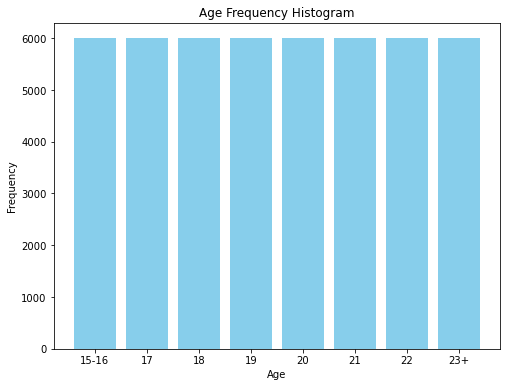

In [ ]:
age_frequency = final_bal['Age_Group'].value_counts().reset_index()


age_frequency.columns = ['Age_Group', 'Frequency']


age_frequency = age_frequency.sort_values(by='Age_Group')

plt.figure(figsize=(8, 6))
plt.bar(age_frequency['Age_Group'], age_frequency['Frequency'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Frequency Histogram')
plt.xticks(age_frequency['Age_Group'])
plt.show()

In [39]:
#random delete data so that the data is ballanced



group_counts = final_bal['Age_Group'].value_counts()


target_count = 6000

balanced_data = pd.DataFrame()  


for group in group_counts.index:
    
    group_data = final_bal[final_bal['Age_Group'] == group]
    
    
    if len(group_data) > target_count:
        group_data = group_data.sample(n=target_count, random_state=1)  
    
    
    balanced_data = balanced_data.append(group_data)


balanced_data = balanced_data.reset_index(drop=True)
balanced_data

C:\Users\brams\AppData\Local\Temp\ipykernel_3700\3485163550.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_data = balanced_data.append(group_data)
C:\Users\brams\AppData\Local\Temp\ipykernel_3700\3485163550.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_data = balanced_data.append(group_data)
C:\Users\brams\AppData\Local\Temp\ipykernel_3700\3485163550.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_data = balanced_data.append(group_data)
C:\Users\brams\AppData\Local\Temp\ipykernel_3700\3485163550.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_data = balanced_data.append(group_da

team_region player_tag  core_shots  core_goals  core_saves  \
0           North America      delta    0.142857    0.166667    0.333333   
1                  Europe        tox    0.357143    0.000000    0.111111   
2      Asia-Pacific South     kaizen    0.142857    0.000000    0.000000   
3                 Oceania     amphis    0.142857    0.000000    0.000000   
4                 Oceania      ceeva    0.000000    0.000000    0.111111   
...                   ...        ...         ...         ...         ...   
47995              Europe     pryyme    0.214286    0.000000    0.222222   
47996              Europe        nex    0.071429    0.000000    0.222222   
47997             Oceania     torsos    0.071429    0.166667    0.000000   
47998       North America      shock    0.071429    0.166667    0.222222   
47999             Oceania     scarth    0.500000    0.333333    0.111111   

       core_assists  core_score  core_shooting_percentage  boost_bpm  \
0             0.000    0.387387                  0.166667   0.688442   
1             0.125    0.258258                  0.000000   0.624791   
2             0.250    0.234234                  0.000000   0.666667   
3             0.000    0.110110                  0.000000   0.603015   
4             0.000    0.179179                  0.000000   0.529313   
...             ...         ...                       ...        ...   
47995         0.125    0.367367                  0.000000   0.432161   
47996         0.000    0.291291                  0.000000   0.606365   
47997         0.000    0.278278                  0.333333   0.654941   
47998         0.000    0.343343                  0.333333   0.594640   
47999         0.000    0.617618                  0.095238   0.530988   

       boost_bcpm  boost_avg_amount  boost_amount_collected  \
0        0.693107          0.740237                0.302070   
1        0.595003          0.510977                0.270498   
2        0.691355          0.587138                0.315601   
3        0.659445          0.610841                0.279519   
4        0.535836          0.443754                0.227593   
...           ...               ...                     ...   
47995    0.476923          0.568875                0.197756   
47996    0.602950          0.640567                0.250029   
47997    0.653961          0.531378                0.366948   
47998    0.601749          0.539149                0.256043   
47999    0.483217          0.470177                0.364982   

       boost_amount_stolen  boost_amount_collected_big  \
0                 0.149230                    0.310141   
1                 0.166206                    0.276222   
2                 0.238452                    0.338842   
3                 0.329649                    0.299530   
4                 0.136992                    0.212037   
...                    ...                         ...   
47995             0.175681                    0.198991   
47996             0.040663                    0.259002   
47997             0.365574                    0.372065   
47998             0.294118                    0.239520   
47999             0.300039                    0.327883   

       boost_amount_stolen_big  boost_amount_collected_small  \
0                     0.107843                      0.286059   
1                     0.163399                      0.259144   
2                     0.162854                      0.269496   
3                     0.267429                      0.239821   
4                     0.047386                      0.258454   
...                        ...                           ...   
47995                 0.163399                      0.195307   
47996                 0.000000                      0.232229   
47997                 0.320261                      0.356798   
47998                 0.210240                      0.288820   
47999                 0.260349                      0.438578   

       boost_

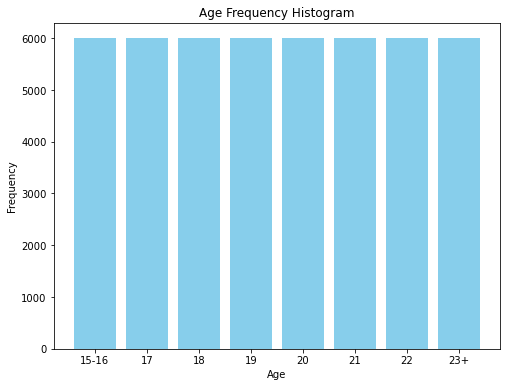

In [551]:
final_bal = balanced_data.copy()
age_frequency = final_bal['Age_Group'].value_counts().reset_index()


age_frequency.columns = ['Age_Group', 'Frequency']


age_frequency = age_frequency.sort_values(by='Age_Group')

plt.figure(figsize=(8, 6))
plt.bar(age_frequency['Age_Group'], age_frequency['Frequency'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Frequency Histogram')
plt.xticks(age_frequency['Age_Group'])
plt.show()

In [552]:
#split the data in training,test and validation set





pred = final_bal[["Age_Group"]]
x = final_bal.drop(['Age','team_region','player_tag','platform_id','car_name','DOB','advanced_rating','Z_Scores','Age_Group'], axis=1)
z = final_bal.iloc[:,2:13]
x

core_shots  core_goals  core_saves  core_assists  core_score  \
0        0.142857    0.166667    0.333333         0.000    0.387387   
1        0.357143    0.000000    0.111111         0.125    0.258258   
2        0.142857    0.000000    0.000000         0.250    0.234234   
3        0.142857    0.000000    0.000000         0.000    0.110110   
4        0.000000    0.000000    0.111111         0.000    0.179179   
...           ...         ...         ...           ...         ...   
47995    0.214286    0.000000    0.222222         0.125    0.367367   
47996    0.071429    0.000000    0.222222         0.000    0.291291   
47997    0.071429    0.166667    0.000000         0.000    0.278278   
47998    0.071429    0.166667    0.222222         0.000    0.343343   
47999    0.500000    0.333333    0.111111         0.000    0.617618   

       core_shooting_percentage  boost_bpm  boost_bcpm  boost_avg_amount  \
0                      0.166667   0.688442    0.693107          0.740237   
1                      0.000000   0.624791    0.595003          0.510977   
2                      0.000000   0.666667    0.691355          0.587138   
3                      0.000000   0.603015    0.659445          0.610841   
4                      0.000000   0.529313    0.535836          0.443754   
...                         ...        ...         ...               ...   
47995                  0.000000   0.432161    0.476923          0.568875   
47996                  0.000000   0.606365    0.602950          0.640567   
47997                  0.333333   0.654941    0.653961          0.531378   
47998                  0.333333   0.594640    0.601749          0.539149   
47999                  0.095238   0.530988    0.483217          0.470177   

       boost_amount_collected  boost_amount_stolen  \
0                    0.302070             0.149230   
1                    0.270498             0.166206   
2                    0.315601             0.238452   
3                    0.279519             0.329649   
4                    0.227593             0.136992   
...                       ...                  ...   
47995                0.197756             0.175681   
47996                0.250029             0.040663   
47997                0.366948             0.365574   
47998                0.256043             0.294118   
47999                0.364982             0.300039   

       boost_amount_collected_big  boost_amount_stolen_big  \
0                        0.310141                 0.107843   
1                        0.276222                 0.163399   
2                        0.338842                 0.162854   
3                        0.299530                 0.267429   
4                        0.212037                 0.047386   
...                           ...                      ...   
47995                    0.198991                 0.163399   
47996                    0.259002                 0.000000   
47997                    0.372065                 0.320261   
47998                    0.239520                 0.210240   
47999                    0.327883                 0.260349   

       boost_amount_collected_small  boost_amount_stolen_small  \
0                          0.286059                   0.159574   
1                          0.259144                   0.107270   
2                          0.269496                   0.270390   
3                          0.239821                   0.304965   
4                          0.258454                   0.230496   
...                             ...                        ...   
47995                      0.195307                   0.128546   
47996                      0.232229                   0.091312   
47997                      0.356798                   0.299645   
47998                      0.288820                   0.318262   
47999                      0.438578                   0.250000   

       boost_count_collected_big  boost_count_stolen_b

In [553]:


# Slit the data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(x, pred, test_size=0.2, random_state=123)

#further split the training set into a validation set

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

X_train

core_shots  core_goals  core_saves  core_assists  core_score  \
10340    0.142857    0.000000    0.222222         0.000    0.282282   
38720    0.142857    0.166667    0.111111         0.000    0.331331   
37493    0.071429    0.000000    0.000000         0.125    0.230230   
7387     0.142857    0.000000    0.222222         0.125    0.356356   
22253    0.214286    0.166667    0.000000         0.500    0.577578   
...           ...         ...         ...           ...         ...   
45437    0.142857    0.166667    0.000000         0.000    0.220220   
38064    0.285714    0.166667    0.000000         0.000    0.352352   
43650    0.214286    0.166667    0.111111         0.000    0.369369   
30341    0.000000    0.000000    0.111111         0.000    0.172172   
46766    0.285714    0.333333    0.222222         0.000    0.470470   

       core_shooting_percentage  boost_bpm  boost_bcpm  boost_avg_amount  \
10340                  0.000000   0.678392    0.683624          0.677093   
38720                  0.166667   0.690117    0.670253          0.494463   
37493                  0.000000   0.681742    0.678108          0.660968   
7387                   0.000000   0.592965    0.588018          0.643093   
22253                  0.111111   0.591290    0.632114          0.611813   
...                         ...        ...         ...               ...   
45437                  0.166667   0.663317    0.645465          0.473285   
38064                  0.083333   0.522613    0.510651          0.662133   
43650                  0.111111   0.636516    0.643053          0.569069   
30341                  0.000000   0.546064    0.558694          0.621916   
46766                  0.166667   0.614740    0.571337          0.630659   

       boost_amount_collected  boost_amount_stolen  \
10340                0.286342             0.439795   
38720                0.444085             0.116857   
37493                0.283682             0.238058   
7387                 0.244015             0.293328   
22253                0.301492             0.342282   
...                       ...                  ...   
45437                0.282641             0.086854   
38064                0.234417             0.051717   
43650                0.281254             0.114489   
30341                0.236267             0.201342   
46766                0.259743             0.273983   

       boost_amount_collected_big  boost_amount_stolen_big  \
10340                    0.308575                 0.458061   
38720                    0.490520                 0.009804   
37493                    0.301096                 0.217865   
7387                     0.254479                 0.326797   
22253                    0.291703                 0.303377   
...                           ...                      ...   
45437                    0.298139                 0.054466   
38064                    0.245086                 0.000000   
43650                    0.259871                 0.044118   
30341                    0.243173                 0.173747   
46766                    0.267525                 0.233660   

       boost_amount_collected_small  boost_amount_stolen_small  \
10340                      0.242236                   0.242021   
38720                      0.351967                   0.246454   
37493                      0.249137                   0.179965   
7387                       0.223257                   0.126773   
22253                      0.320911                   0.274823   
...                             ...                        ...   
45437                      0.251898                   0.106383   
38064                      0.213251                   0.116135   
43650                      0.323671                   0.185284   
30341                      0.222567                   0.169326   
46766                      0.244306                   0.234929   

       boost_count_collected_big  boost_count_stolen_b

In [ ]:
# modelling

In [279]:
# training


#support vector machine

y_train = np.ravel(y_train) 

svm_classifier = SVC(kernel='linear')


svm_classifier.fit(X_train, y_train)


y_pred = svm_classifier.predict(X_test)



    
def metrics(true, pred):   
    acc = accuracy_score(true, pred)
    f1 = f1_score(true, pred, average='weighted')  
    recall = recall_score(true, pred, average='weighted')  
    precision = precision_score(true, pred, average='weighted')  
    print('F1 score: ', f1)
    print('Accuracy score: ', acc)
    print('Recall score: ', recall)
    print('Precision score: ', precision)
    
metrics(y_test, y_pred)


F1 score:  0.2388243492659526
Accuracy score:  0.249375
Recall score:  0.249375
Precision score:  0.23858571013057714


In [146]:


frequency_table_SVM = y_test['Age_Group'].value_counts()


print(frequency_table_SVM)

22       1246
23+      1240
21       1230
18       1221
17       1217
19       1152
15-16    1149
20       1145
Name: Age_Group, dtype: int64


In [148]:
predict = pd.DataFrame(y_pred, columns=['Predicted Age'])

frequency_table = predict['Predicted Age'].value_counts()


print(frequency_table)

23+      1681
15-16    1647
17       1476
22       1292
20       1005
19        960
21        810
18        729
Name: Predicted Age, dtype: int64


In [218]:
#improve with feature importance
pred_2 = final_bal[["Age_Group"]]
selected_columns = [
    "movement_count_powerslide",
    "movement_time_powerslide",
    "boost_percent_full_boost",
    "positioning_avg_distance_to_mates",
    "movement_percent_supersonic_speed",
    "boost_time_full_boost",
    "positioning_avg_distance_to_ball_possession",
    "movement_percent_ground",
    "boost_amount_used_while_supersonic",
    "movement_percent_low_air",
    "positioning_avg_distance_to_ball",
    "movement_time_supersonic_speed",
    "boost_percent_zero_boost",
    "movement_percent_high_air",
    "movement_percent_boost_speed",
    "boost_amount_overfill",
    "movement_time_high_air",
    "boost_time_zero_boost",
    "positioning_percent_most_back",
    "boost_avg_amount",
    "boost_bpm",
    "positioning_avg_distance_to_ball_no_possession",
    "boost_amount_collected_small",
    "positioning_percent_farthest_from_ball",
    "boost_percent_boost_75_100",
    "positioning_percent_closest_to_ball",
    "boost_bcpm",
    "boost_percent_boost_25_50",
    "positioning_percent_most_forward",
    "movement_time_low_air",
    "boost_percent_boost_0_25"
]



x_2 = final_bal[selected_columns]
#x_2 = final_bal.drop(['Age','team_region','player_tag','platform_id','car_name','DOB','advanced_rating','Z_Scores','Age_Group'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x_2, pred_2, test_size=0.2, random_state=123)

#further split the training set into a validation set

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)
X_train


0         1         2         3         4         5         6   \
28934  0.272727  0.256313  0.192978  0.342477  0.405726  0.104258  0.248457   
21697  0.380682  0.304371  0.214856  0.322804  0.318483  0.183283  0.402469   
8502   0.323864  0.282378  0.355783  0.408978  0.290300  0.191979  0.400617   
10083  0.133523  0.097203  0.389897  0.323635  0.375293  0.208706  0.199074   
14405  0.133523  0.135487  0.189288  0.288723  0.356565  0.116375  0.250926   
...         ...       ...       ...       ...       ...       ...       ...   
7763   0.326705  0.351887  0.252040  0.422001  0.333801  0.142321  0.498765   
15377  0.232955  0.196307  0.265471  0.378498  0.245873  0.157099  0.389198   
17730  0.161932  0.138203  0.242057  0.443336  0.343331  0.136523  0.494444   
28030  0.232955  0.430899  0.295084  0.335273  0.228523  0.160948  0.412963   
15725  0.170455  0.167255  0.225547  0.443613  0.347491  0.132199  0.308333   

             7         8         9         10        11        12        13  \
28934  0.208300  0.108949  0.723716  0.292512  0.292182  0.250894  0.300758   
21697  0.361740  0.272763  0.528730  0.337514  0.362385  0.505920  0.350652   
8502   0.405744  0.159533  0.519677  0.350793  0.206847  0.332511  0.272307   
10083  0.236298  0.121790  0.628251  0.150498  0.265473  0.353109  0.428254   
14405  0.339880  0.157977  0.643968  0.228329  0.307273  0.311715  0.170641   
...         ...       ...       ...       ...       ...       ...       ...   
7763   0.368322  0.187160  0.587458  0.438215  0.253070  0.434144  0.220153   
15377  0.298980  0.093774  0.588534  0.325341  0.197007  0.092332  0.369681   
17730  0.271615  0.128405  0.649682  0.414238  0.260098  0.302973  0.308646   
28030  0.382673  0.089494  0.519237  0.306160  0.165047  0.202877  0.323636   
15725  0.374128  0.156031  0.560256  0.291405  0.279737  0.218899  0.261233   

             14        15        16        17        18        19        20  \
28934  0.651312  0.205304  0.253897  0.168080  0.260403  0.677093  0.678392   
21697  0.679470  0.221765  0.467699  0.535157  0.370964  0.494463  0.690117   
8502   0.671866  0.187014  0.227441  0.222484  0.385683  0.660968  0.681742   
10083  0.634251  0.069044  0.355107  0.234379  0.275800  0.643093  0.592965   
14405  0.626975  0.087791  0.172375  0.237641  0.365413  0.611813  0.591290   
...         ...       ...       ...       ...       ...       ...       ...   
7763   0.652030  0.086420  0.195652  0.303990  0.500333  0.473285  0.663317   
15377  0.636525  0.236854  0.347211  0.067754  0.459991  0.662133  0.522613   
17730  0.663493  0.153635  0.274098  0.211895  0.434561  0.569069  0.636516   
28030  0.513039  0.097394  0.273995  0.137215  0.272806  0.621916  0.546064   
15725  0.667859  0.310014  0.246514  0.159097  0.327935  0.630659  0.614740   

             21        22        23        24        25        26        27  \
28934  0.417876  0.242236  0.308791  0.469199  0.420193  0.683624  0.293562   
21697  0.345302  0.351967  0.346288  0.370565  0.312563  0.670253  0.221018   
8502   0.380443  0.249137  0.314003  0.586855  0.450413  0.678108  0.242390   
10083  0.216960  0.223257  0.197491  0.593402  0.521524  0.588018  0.261371   
14405  0.416730  0.320911  0.278165  0.393134  0.515464  0.632114  0.371752   
...         ...       ...       ...       ...       ...       ...       ...   
7763   0.441558  0.251898  0.465904  0.377527  0.283217  0.645465  0.232761   
15377  0.300611  0.213251  0.295596  0.499412  0.336849  0.510651  0.227540   
17730  0.387319  0.323671  0.400312  0.382788  0.361074  0.643053  0.281095   
28030  0.244079  0.222567  0.282064  0.359083  0.342096  0.558694  0.477380   
15725  0.358289  0.244306  0.202714  0.499629  0.506797  0.571337  0.348218   

             28        29        30  
28934  0.400588  0.326094  0.296275  
21697  0.254385  0.408214  0.492244  
8502   0.273358  0.242367  0.253508  
10083  0.437891  0.282685  0.254809  
14405  0.352380  0.357501  

In [199]:
#support vector machine

y_train = np.ravel(y_train) 

svm_classifier = SVC(kernel='linear')


svm_classifier.fit(X_train, y_train)


y_pred = svm_classifier.predict(X_test)



metrics(y_test, y_pred)

#0.249375 with all features
#0.2403125 with 43
#0.238 with 31
#no improvement

F1 score:  0.22431636093587162
Accuracy score:  0.238125
Recall score:  0.238125
Precision score:  0.22552790258438501


In [220]:
#reset data
# Slit the data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(x, pred, test_size=0.2, random_state=123)

#further split the training set into a validation set

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

X_train

0         1         2      3         4         5         6   \
28934  0.142857  0.000000  0.222222  0.000  0.282282  0.000000  0.678392   
21697  0.142857  0.166667  0.111111  0.000  0.331331  0.166667  0.690117   
8502   0.071429  0.000000  0.000000  0.125  0.230230  0.000000  0.681742   
10083  0.142857  0.000000  0.222222  0.125  0.356356  0.000000  0.592965   
14405  0.214286  0.166667  0.000000  0.500  0.577578  0.111111  0.591290   
...         ...       ...       ...    ...       ...       ...       ...   
7763   0.142857  0.166667  0.000000  0.000  0.220220  0.166667  0.663317   
15377  0.285714  0.166667  0.000000  0.000  0.352352  0.083333  0.522613   
17730  0.214286  0.166667  0.111111  0.000  0.369369  0.111111  0.636516   
28030  0.000000  0.000000  0.111111  0.000  0.172172  0.000000  0.546064   
15725  0.285714  0.333333  0.222222  0.000  0.470470  0.166667  0.614740   

             7         8         9         10        11        12        13  \
28934  0.683624  0.677093  0.286342  0.439795  0.308575  0.458061  0.242236   
21697  0.670253  0.494463  0.444085  0.116857  0.490520  0.009804  0.351967   
8502   0.678108  0.660968  0.283682  0.238058  0.301096  0.217865  0.249137   
10083  0.588018  0.643093  0.244015  0.293328  0.254479  0.326797  0.223257   
14405  0.632114  0.611813  0.301492  0.342282  0.291703  0.303377  0.320911   
...         ...       ...       ...       ...       ...       ...       ...   
7763   0.645465  0.473285  0.282641  0.086854  0.298139  0.054466  0.251898   
15377  0.510651  0.662133  0.234417  0.051717  0.245086  0.000000  0.213251   
17730  0.643053  0.569069  0.281254  0.114489  0.259871  0.044118  0.323671   
28030  0.558694  0.621916  0.236267  0.201342  0.243173  0.173747  0.222567   
15725  0.571337  0.630659  0.259743  0.273983  0.267525  0.233660  0.244306   

             14        15        16        17        18        19        20  \
28934  0.242021  0.314286  0.428571  0.255061  0.274725  0.205304  0.098784   
21697  0.246454  0.471429  0.047619  0.360324  0.263736  0.221765  0.123100   
8502   0.179965  0.314286  0.238095  0.198381  0.186813  0.187014  0.150456   
10083  0.126773  0.228571  0.285714  0.214575  0.153846  0.069044  0.001520   
14405  0.274823  0.257143  0.285714  0.327935  0.318681  0.087791  0.109422   
...         ...       ...       ...       ...       ...       ...       ...   
7763   0.106383  0.271429  0.047619  0.226721  0.109890  0.086420  0.000000   
15377  0.116135  0.285714  0.000000  0.218623  0.120879  0.236854  0.000000   
17730  0.185284  0.257143  0.047619  0.307692  0.208791  0.153635  0.041033   
28030  0.169326  0.228571  0.190476  0.222672  0.175824  0.097394  0.123100   
15725  0.234929  0.314286  0.238095  0.234818  0.252747  0.310014  0.106383   

             21        22        23        24        25        26        27  \
28934  0.108949  0.168080  0.250894  0.104258  0.192978  0.205288  0.247856   
21697  0.272763  0.535157  0.505920  0.183283  0.214856  0.499779  0.320891   
8502   0.159533  0.222484  0.332511  0.191979  0.355783  0.175399  0.210672   
10083  0.121790  0.234379  0.353109  0.208706  0.389897  0.175736  0.221482   
14405  0.157977  0.237641  0.311715  0.116375  0.189288  0.284437  0.345500   
...         ...       ...       ...       ...       ...       ...       ...   
7763   0.187160  0.303990  0.434144  0.142321  0.252040  0.328965  0.211573   
15377  0.093774  0.067754  0.092332  0.157099  0.265471  0.149465  0.213663   
17730  0.128405  0.211895  0.302973  0.136523  0.242057  0.289422  0.248253   
28030  0.089494  0.137215  0.202877  0.160948  0.295084  0.185895  0.346328   
15725  0.156031  0.159097  0.218899  0.132199  0.225547  0.208085  0.305001   

             28        29        30        31        32        33        34  \
28934  0.231207  0.230631  0.296275  0.293562  0.533698  0.469199  0.732203   
21697  0.225622  0.281058  0.492244  0.221018  0.337525  0.370565  0.714576   
8502   0.222776 

In [ ]:
#improve with hyperparameter tuning



  Attempting uninstall: tbb
    Found existing installation: TBB 0.2
Note: you may need to restart the kernel to use updated packages.


ERROR: Cannot uninstall 'TBB'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [206]:

patch_sklearn()

y_train = np.ravel(y_train) 

svm_classifier = svm.SVC()


param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': [0.1, 0.01, 0.001]}


grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy', verbose=1)


grid_search.fit(X_train, y_train)


print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))


test_accuracy = grid_search.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(test_accuracy))


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found:  {'C': 100, 'gamma': 0.1, 'kernel': 'poly'}
Best cross-validation accuracy: 0.29
Test set accuracy: 0.30
F1 score:  0.2388243492659526
Accuracy score:  0.249375
Recall score:  0.249375
Precision score:  0.23858571013057714


In [ ]:
metrics(y_test, y_pred)

In [221]:

best_svm_classifier = svm.SVC(C=100, gamma=0.1, kernel='poly')


best_svm_classifier.fit(X_train, y_train)


y_pred = best_svm_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


metrics(y_test, y_pred) 

C:\Users\brams\anaconda3\lib\site-packages\onedal\datatypes\validation.py:126: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = _column_or_1d(y, warn=True)


Accuracy: 0.3015625
F1 score:  0.29768394265825043
Accuracy score:  0.3015625
Recall score:  0.3015625
Precision score:  0.29851764860944485


In [280]:
#reset data
# Slit the data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(x, pred, test_size=0.2, random_state=123)

#further split the training set into a validation set

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

X_train

core_shots  core_goals  core_saves  core_assists  core_score  \
10340    0.142857    0.000000    0.222222         0.000    0.282282   
38720    0.142857    0.166667    0.111111         0.000    0.331331   
37493    0.071429    0.000000    0.000000         0.125    0.230230   
7387     0.142857    0.000000    0.222222         0.125    0.356356   
22253    0.214286    0.166667    0.000000         0.500    0.577578   
...           ...         ...         ...           ...         ...   
45437    0.142857    0.166667    0.000000         0.000    0.220220   
38064    0.285714    0.166667    0.000000         0.000    0.352352   
43650    0.214286    0.166667    0.111111         0.000    0.369369   
30341    0.000000    0.000000    0.111111         0.000    0.172172   
46766    0.285714    0.333333    0.222222         0.000    0.470470   

       core_shooting_percentage  boost_bpm  boost_bcpm  boost_avg_amount  \
10340                  0.000000   0.678392    0.683624          0.677093   
38720                  0.166667   0.690117    0.670253          0.494463   
37493                  0.000000   0.681742    0.678108          0.660968   
7387                   0.000000   0.592965    0.588018          0.643093   
22253                  0.111111   0.591290    0.632114          0.611813   
...                         ...        ...         ...               ...   
45437                  0.166667   0.663317    0.645465          0.473285   
38064                  0.083333   0.522613    0.510651          0.662133   
43650                  0.111111   0.636516    0.643053          0.569069   
30341                  0.000000   0.546064    0.558694          0.621916   
46766                  0.166667   0.614740    0.571337          0.630659   

       boost_amount_collected  boost_amount_stolen  \
10340                0.286342             0.439795   
38720                0.444085             0.116857   
37493                0.283682             0.238058   
7387                 0.244015             0.293328   
22253                0.301492             0.342282   
...                       ...                  ...   
45437                0.282641             0.086854   
38064                0.234417             0.051717   
43650                0.281254             0.114489   
30341                0.236267             0.201342   
46766                0.259743             0.273983   

       boost_amount_collected_big  boost_amount_stolen_big  \
10340                    0.308575                 0.458061   
38720                    0.490520                 0.009804   
37493                    0.301096                 0.217865   
7387                     0.254479                 0.326797   
22253                    0.291703                 0.303377   
...                           ...                      ...   
45437                    0.298139                 0.054466   
38064                    0.245086                 0.000000   
43650                    0.259871                 0.044118   
30341                    0.243173                 0.173747   
46766                    0.267525                 0.233660   

       boost_amount_collected_small  boost_amount_stolen_small  \
10340                      0.242236                   0.242021   
38720                      0.351967                   0.246454   
37493                      0.249137                   0.179965   
7387                       0.223257                   0.126773   
22253                      0.320911                   0.274823   
...                             ...                        ...   
45437                      0.251898                   0.106383   
38064                      0.213251                   0.116135   
43650                      0.323671                   0.185284   
30341                      0.222567                   0.169326   
46766                      0.244306                   0.234929   

       boost_count_collected_big  boost_count_stolen_b

In [538]:
#naive base
y_train = np.ravel(y_train) 
gnb = GaussianNB()


gnb.fit(X_train, y_train)


y_pred = gnb.predict(X_test)
metrics(y_test, y_pred)

F1 score:  0.18764610412803165
Accuracy score:  0.20958333333333334
Recall score:  0.20958333333333334
Precision score:  0.20892698783963076


In [283]:
nb_scores = cross_val_score(gnb, x, pred, cv=10)  

print('Cross-Validation Scores:', nb_scores)
print('Mean Accuracy:', nb_scores.mean())

C:\Users\brams\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Cross-Validation Scores: [0.20020833 0.2125     0.21458333 0.20875    0.20791667 0.206875
 0.203125   0.223125   0.21083333 0.21333333]
Mean Accuracy: 0.21012500000000003


C:\Users\brams\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
# improve with hyperparameter tuning

gnb = GaussianNB()


param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],  
    'priors': [None, [0.25, 0.25, 0.5], [0.2, 0.3, 0.5]]  

}

param_grid = {'var_smoothing': np.logspace(0,-9, num=100)
             }


grid_search = GridSearchCV(gnb, param_grid, cv=5)
grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)
metrics(y_test, y_pred)

F1 score:  0.18759408678455283
Accuracy score:  0.2096875
Recall score:  0.2096875
Precision score:  0.20960514496303795


In [284]:
pd.reset_option('display.max_rows')

pred_2 = final_bal[["Age_Group"]]
selected_columns = [
    "movement_count_powerslide",
    "movement_time_powerslide",
    "boost_percent_full_boost",
    "positioning_avg_distance_to_mates",
    "movement_percent_supersonic_speed",
    "boost_time_full_boost",
    "positioning_avg_distance_to_ball_possession",
    "movement_percent_ground",
    "boost_amount_used_while_supersonic",
    "movement_percent_low_air",
    "positioning_avg_distance_to_ball",
    "movement_time_supersonic_speed",
    "boost_percent_zero_boost",
    "movement_percent_high_air",
    "movement_percent_boost_speed",
    "boost_amount_overfill",
    "movement_time_high_air",
    "boost_time_zero_boost",
    "positioning_percent_most_back",
    "boost_avg_amount",
    "boost_bpm",
    "positioning_avg_distance_to_ball_no_possession",
    "boost_amount_collected_small",
    "positioning_percent_farthest_from_ball",
    "boost_percent_boost_75_100",
    "positioning_percent_closest_to_ball",
    "boost_bcpm",
    "boost_percent_boost_25_50",
    "positioning_percent_most_forward",
    "movement_time_low_air",
    "boost_percent_boost_0_25",
    "boost_time_boost_75_100",
    "movement_avg_powerslide_duration",
    "core_score",
    "boost_percent_boost_50_75",
    "movement_time_ground",
    "movement_percent_slow_speed",
    "positioning_percent_neutral_third",
    "boost_time_boost_50_75",
    "positioning_time_most_back",
    "positioning_time_farthest_from_ball",
    "boost_amount_stolen_small",
    "movement_time_boost_speed"
]



x_2 = final_bal[selected_columns]
#x_2 = final_bal.drop(['Age','team_region','player_tag','platform_id','car_name','DOB','advanced_rating','Z_Scores','Age_Group'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x_2, pred_2, test_size=0.2, random_state=123)

#further split the training set into a validation set

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)
X_train




movement_count_powerslide  movement_time_powerslide  \
10340                   0.272727                  0.256313   
38720                   0.380682                  0.304371   
37493                   0.323864                  0.282378   
7387                    0.133523                  0.097203   
22253                   0.133523                  0.135487   
...                          ...                       ...   
45437                   0.326705                  0.351887   
38064                   0.232955                  0.196307   
43650                   0.161932                  0.138203   
30341                   0.232955                  0.430899   
46766                   0.170455                  0.167255   

       boost_percent_full_boost  positioning_avg_distance_to_mates  \
10340                  0.192978                           0.342477   
38720                  0.214856                           0.322804   
37493                  0.355783                           0.408978   
7387                   0.389897                           0.323635   
22253                  0.189288                           0.288723   
...                         ...                                ...   
45437                  0.252040                           0.422001   
38064                  0.265471                           0.378498   
43650                  0.242057                           0.443336   
30341                  0.295084                           0.335273   
46766                  0.225547                           0.443613   

       movement_percent_supersonic_speed  boost_time_full_boost  \
10340                           0.405726               0.104258   
38720                           0.318483               0.183283   
37493                           0.290300               0.191979   
7387                            0.375293               0.208706   
22253                           0.356565               0.116375   
...                                  ...                    ...   
45437                           0.333801               0.142321   
38064                           0.245873               0.157099   
43650                           0.343331               0.136523   
30341                           0.228523               0.160948   
46766                           0.347491               0.132199   

       positioning_avg_distance_to_ball_possession  movement_percent_ground  \
10340                                     0.248457                 0.208300   
38720                                     0.402469                 0.361740   
37493                                     0.400617                 0.405744   
7387                                      0.199074                 0.236298   
22253                                     0.250926                 0.339880   
...                                            ...                      ...   
45437                                     0.498765                 0.368322   
38064                                     0.389198                 0.298980   
43650                                     0.494444                 0.271615   
30341                                     0.412963                 0.382673   
46766                                     0.308333                 0.374128   

       boost_amount_used_while_supersonic  movement_percent_low_air  \
10340                            0.108949                  0.723716   
38720                            0.272763                  0.528730   
37493                            0.159533                  0.519677   
7387                             0.121790                  0.628251   
22253                            0.157977                  0.643968   
...                                   ...                       ...   
45437                            0.187160                  0.587458   
38064                            0.093774                  0.588534   
43650                       

In [286]:
#improve with feature importance
y_train = np.ravel(y_train) 
gnb = GaussianNB()


gnb.fit(X_train, y_train)


y_pred = gnb.predict(X_test)
metrics(y_test, y_pred)

#0.2253125 with 43

F1 score:  0.20702008257146357
Accuracy score:  0.2253125
Recall score:  0.2253125
Precision score:  0.2227673145984358


In [287]:

gnb = GaussianNB()
y_train = np.ravel(y_train) 

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],  
    'priors': [None, [0.25, 0.25, 0.5], [0.2, 0.3, 0.5]]  

}

param_grid = {'var_smoothing': np.logspace(0,-9, num=100)
             }


grid_search = GridSearchCV(gnb, param_grid, cv=5)
grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)
metrics(y_test, y_pred)

F1 score:  0.2059646000858004
Accuracy score:  0.22458333333333333
Recall score:  0.22458333333333333
Precision score:  0.2212852796424059


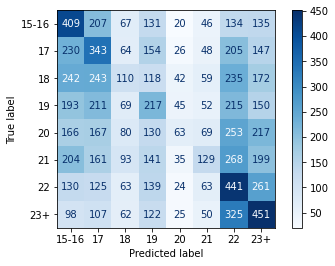

In [66]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.show()

In [571]:

#reset data
# Slit the data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(x, pred, test_size=0.2, random_state=123)

#further split the training set into a validation set

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

X_train





core_shots  core_goals  core_saves  core_assists  core_score  \
10340    0.142857    0.000000    0.222222         0.000    0.282282   
38720    0.142857    0.166667    0.111111         0.000    0.331331   
37493    0.071429    0.000000    0.000000         0.125    0.230230   
7387     0.142857    0.000000    0.222222         0.125    0.356356   
22253    0.214286    0.166667    0.000000         0.500    0.577578   
...           ...         ...         ...           ...         ...   
45437    0.142857    0.166667    0.000000         0.000    0.220220   
38064    0.285714    0.166667    0.000000         0.000    0.352352   
43650    0.214286    0.166667    0.111111         0.000    0.369369   
30341    0.000000    0.000000    0.111111         0.000    0.172172   
46766    0.285714    0.333333    0.222222         0.000    0.470470   

       core_shooting_percentage  boost_bpm  boost_bcpm  boost_avg_amount  \
10340                  0.000000   0.678392    0.683624          0.677093   
38720                  0.166667   0.690117    0.670253          0.494463   
37493                  0.000000   0.681742    0.678108          0.660968   
7387                   0.000000   0.592965    0.588018          0.643093   
22253                  0.111111   0.591290    0.632114          0.611813   
...                         ...        ...         ...               ...   
45437                  0.166667   0.663317    0.645465          0.473285   
38064                  0.083333   0.522613    0.510651          0.662133   
43650                  0.111111   0.636516    0.643053          0.569069   
30341                  0.000000   0.546064    0.558694          0.621916   
46766                  0.166667   0.614740    0.571337          0.630659   

       boost_amount_collected  boost_amount_stolen  \
10340                0.286342             0.439795   
38720                0.444085             0.116857   
37493                0.283682             0.238058   
7387                 0.244015             0.293328   
22253                0.301492             0.342282   
...                       ...                  ...   
45437                0.282641             0.086854   
38064                0.234417             0.051717   
43650                0.281254             0.114489   
30341                0.236267             0.201342   
46766                0.259743             0.273983   

       boost_amount_collected_big  boost_amount_stolen_big  \
10340                    0.308575                 0.458061   
38720                    0.490520                 0.009804   
37493                    0.301096                 0.217865   
7387                     0.254479                 0.326797   
22253                    0.291703                 0.303377   
...                           ...                      ...   
45437                    0.298139                 0.054466   
38064                    0.245086                 0.000000   
43650                    0.259871                 0.044118   
30341                    0.243173                 0.173747   
46766                    0.267525                 0.233660   

       boost_amount_collected_small  boost_amount_stolen_small  \
10340                      0.242236                   0.242021   
38720                      0.351967                   0.246454   
37493                      0.249137                   0.179965   
7387                       0.223257                   0.126773   
22253                      0.320911                   0.274823   
...                             ...                        ...   
45437                      0.251898                   0.106383   
38064                      0.213251                   0.116135   
43650                      0.323671                   0.185284   
30341                      0.222567                   0.169326   
46766                      0.244306                   0.234929   

       boost_count_collected_big  boost_count_stolen_b

In [192]:
# Logstic regression
from sklearn.linear_model import LogisticRegression
y_train = np.ravel(y_train) 

log_reg = LogisticRegression(n_jobs=-1)


log_reg.fit(X_train, y_train)


y_pred = log_reg.predict(X_test)
metrics(y_test, y_pred)


F1 score:  0.23265756767803505
Accuracy score:  0.245
Recall score:  0.245
Precision score:  0.2318189641261211


In [ ]:
#0.245 with all features
#0.2367 with 43 features

In [110]:
logreg = LogisticRegression()


param_grid = {
    'C': [0.1, 1.0, 5.0, 10.0,20.0], 
    'solver': ['liblinear', 'saga'], 
    'penalty': ['l1', 'l2'], 
    'max_iter': [1000] 
}



y_train = np.ravel(y_train)
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train, y_train)


grid_search.best_estimator_




y_pred = grid_search.predict(X_test) 


metrics(y_test, y_pred)

C:\Users\brams\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\brams\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\brams\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\brams\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\brams\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. G

F1 score:  0.2343946249444387
Accuracy score:  0.246875
Recall score:  0.246875
Precision score:  0.23363036216386504


In [570]:
X_train

movement_count_powerslide  movement_percent_supersonic_speed  \
94268                   0.193182                           0.509225   
1603                    0.201705                           0.273108   
74713                   0.161932                           0.216589   
96884                   0.167614                           0.353504   
70431                   0.196023                           0.341082   
...                          ...                                ...   
65457                   0.181818                           0.382678   
22220                   0.230114                           0.298478   
58698                   0.147727                           0.444322   
16072                   0.292614                           0.202255   
17808                   0.167614                           0.215134   

       movement_time_powerslide  movement_time_supersonic_speed  \
94268                  0.115938                        0.404970   
1603                   0.201195                        0.209245   
74713                  0.187619                        0.160210   
96884                  0.194407                        0.266879   
70431                  0.220201                        0.257246   
...                         ...                             ...   
65457                  0.229161                        0.281060   
22220                  0.325550                        0.244966   
58698                  0.150149                        0.319800   
16072                  0.242465                        0.189399   
17808                  0.140918                        0.175177   

       positioning_avg_distance_to_ball_possession  \
94268                                     0.236420   
1603                                      0.421914   
74713                                     0.262346   
96884                                     0.525926   
70431                                     0.470370   
...                                            ...   
65457                                     0.410494   
22220                                     0.484877   
58698                                     0.267901   
16072                                     0.507099   
17808                                     0.466975   

       movement_avg_powerslide_duration  boost_percent_full_boost  \
94268                          0.038462                  0.296527   
1603                           0.115385                  0.261181   
74713                          0.153846                  0.206115   
96884                          0.153846                  0.325829   
70431                          0.153846                  0.218482   
...                                 ...                       ...   
65457                          0.173077                  0.282003   
22220                          0.211538                  0.241029   
58698                          0.134615                  0.371421   
16072                          0.096154                  0.305537   
17808                          0.096154                  0.285547   

       boost_amount_used_while_supersonic  positioning_avg_distance_to_ball  \
94268                            0.221401                          0.231280   
1603                             0.157588                          0.423829   
74713                            0.142023                          0.284397   
96884                            0.210506                          0.359646   
70431                            0.136965                          0.496496   
...                                   ...                               ...   
65457                            0.105837                          0.420140   
22220                            0.063424                          0.362228   
58698                            0.177432                          0.254150   
16072                            0.067315                          0.425673   
17

In [572]:
# random forest
y_train = np.ravel(y_train) 
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42,n_jobs=-1)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

metrics(y_test, y_pred)

#0.31222607444233663 unbalanced
#0.31 balanced


F1 score:  0.3064776861164239
Accuracy score:  0.31
Recall score:  0.31
Precision score:  0.3073195157952087


In [546]:
predict = pd.DataFrame(y_pred, columns=['Predicted Age'])

frequency_table = predict['Predicted Age'].value_counts()


print(frequency_table)

23+      1705
15-16    1384
17       1368
22       1275
21       1018
20        973
19        939
18        938
Name: Predicted Age, dtype: int64


In [ ]:
#Improve with feature importance

In [46]:
# Retrieve feature importances
feature_importance = pd.Series(rf_classifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)
pd.set_option('display.max_rows', None)

print(feature_importance)

movement_count_powerslide                         0.021371
movement_time_powerslide                          0.018739
boost_percent_full_boost                          0.016807
positioning_avg_distance_to_mates                 0.016791
movement_percent_supersonic_speed                 0.016602
boost_time_full_boost                             0.015916
positioning_avg_distance_to_ball_possession       0.015479
movement_percent_ground                           0.015428
boost_amount_used_while_supersonic                0.015272
movement_percent_low_air                          0.015213
positioning_avg_distance_to_ball                  0.015135
movement_time_supersonic_speed                    0.014912
boost_percent_zero_boost                          0.014430
movement_percent_high_air                         0.014406
movement_percent_boost_speed                      0.014270
boost_amount_overfill                             0.014059
movement_time_high_air                            0.0139

In [573]:
pd.reset_option('display.max_rows')

pred_2 = final_bal[["Age_Group"]]
selected_columns = [

    "movement_count_powerslide",
    "movement_time_powerslide",
    "boost_percent_full_boost",
    "positioning_avg_distance_to_mates",
    "movement_percent_supersonic_speed",
    "boost_time_full_boost",
    "positioning_avg_distance_to_ball_possession",
    "movement_percent_ground",
    "boost_amount_used_while_supersonic",
    "movement_percent_low_air",
    "positioning_avg_distance_to_ball",
    "movement_time_supersonic_speed",
    "boost_percent_zero_boost",
    "movement_percent_high_air",
    "movement_percent_boost_speed",
    "boost_amount_overfill",
    "movement_time_high_air",
    "boost_time_zero_boost",
    "positioning_percent_most_back",
    "boost_avg_amount",
    "boost_bpm",
    "positioning_avg_distance_to_ball_no_possession",
    "boost_amount_collected_small",
    "positioning_percent_farthest_from_ball",
    "boost_percent_boost_75_100",
    "positioning_percent_closest_to_ball",
    "boost_bcpm",
    "boost_percent_boost_25_50",
    "positioning_percent_most_forward",
    "movement_time_low_air",
    "boost_percent_boost_0_25",
    "boost_time_boost_75_100",
    "movement_avg_powerslide_duration",
    "core_score",
    "boost_percent_boost_50_75",
    "movement_time_ground",
    "movement_percent_slow_speed",
    "positioning_percent_neutral_third",
    "boost_time_boost_50_75",
    "positioning_time_most_back",
    "positioning_time_farthest_from_ball",
    "boost_amount_stolen_small",
    "movement_time_boost_speed",
    "positioning_percent_in_front_ball"
]



x_2 = final_bal[selected_columns]
#x_2 = final_bal.drop(['Age','team_region','player_tag','platform_id','car_name','DOB','advanced_rating','Z_Scores','Age_Group'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x_2, pred_2, test_size=0.2, random_state=123)

#further split the training set into a validation set

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)
x_2

movement_count_powerslide  movement_time_powerslide  \
0                       0.343750                  0.314961   
1                       0.298295                  0.319305   
2                       0.218750                  0.191692   
3                       0.170455                  0.161010   
4                       0.289773                  0.255498   
...                          ...                       ...   
47995                   0.133523                  0.167255   
47996                   0.159091                  0.175400   
47997                   0.335227                  0.257399   
47998                   0.147727                  0.147163   
47999                   0.647727                  0.485202   

       boost_percent_full_boost  positioning_avg_distance_to_mates  \
0                      0.280959                           0.387365   
1                      0.248005                           0.280410   
2                      0.252869                           0.300360   
3                      0.514581                           0.408423   
4                      0.227532                           0.395123   
...                         ...                                ...   
47995                  0.332535                           0.335827   
47996                  0.216501                           0.399280   
47997                  0.111104                           0.359656   
47998                  0.170846                           0.270712   
47999                  0.108954                           0.358548   

       movement_percent_supersonic_speed  boost_time_full_boost  \
0                               0.338556               0.157907   
1                               0.297816               0.145362   
2                               0.353171               0.148831   
3                               0.255227               0.281315   
4                               0.312279               0.124644   
...                                  ...                    ...   
47995                           0.281512               0.177865   
47996                           0.403654               0.115805   
47997                           0.370756               0.080308   
47998                           0.212789               0.093756   
47999                           0.183023               0.105826   

       positioning_avg_distance_to_ball_possession  movement_percent_ground  \
0                                         0.477469                 0.439652   
1                                         0.332716                 0.248992   
2                                         0.315432                 0.404628   
3                                         0.422531                 0.310534   
4                                         0.457716                 0.365180   
...                                            ...                      ...   
47995                                     0.446914                 0.354465   
47996                                     0.417284                 0.331361   
47997                                     0.277469                 0.297214   
47998                                     0.248765                 0.415588   
47999                                     0.413889                 0.374369   

       boost_amount_used_while_supersonic  movement_percent_low_air  \
0                                0.151362                  0.521277   
1                                0.070428                  0.719240   
2                                0.193385                  0.588640   
3                                0.106615                  0.599498   
4                                0.060311                  0.628196   
...                                   ...                       ...   
47995                            0.112451                  0.576571   
47996                            0.091440                  0.559741   
47997                       

In [575]:
y_train = np.ravel(y_train) 


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)


rf_classifier.fit(X_train, y_train)


y_pred = rf_classifier.predict(X_val)

metrics(y_val, y_pred)

#0.328125 with 43
#0.3226041666666667 with 47
#0.30645833333333333 with 25
#0.2833333333333333 with 13
#0.2184375 with 5



#0.3104166666666667 with 84
#0.3120833333333333 with 74
#0.31333333333333335 with 64
#0.314375 with 54
#0.322265625 with 44
#0.3196875 with 34
#0.30114583333333333 with 24
#0.2759375 with 14
#0.185 with 4


F1 score:  0.31888331273309567
Accuracy score:  0.322265625
Recall score:  0.322265625
Precision score:  0.3201395746373032


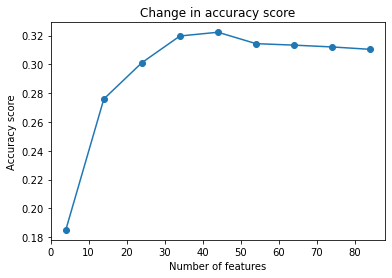

In [323]:


data = {
    84: 0.3104166666666667,
    74: 0.3120833333333333,
    64: 0.31333333333333335,
    54: 0.314375,
    44: 0.32229166666666664,
    34: 0.3196875,
    24: 0.30114583333333333,
    14: 0.2759375,
    4: 0.185
}

x_values = list(data.keys())
y_values = list(data.values())

plt.plot(x_values, y_values, marker='o')
plt.xlabel('Number of features')
plt.ylabel('Accuracy score')
plt.title('Change in accuracy score')
plt.show()

In [547]:
X_train

movement_count_powerslide  movement_time_powerslide  \
10340                   0.272727                  0.256313   
38720                   0.380682                  0.304371   
37493                   0.323864                  0.282378   
7387                    0.133523                  0.097203   
22253                   0.133523                  0.135487   
...                          ...                       ...   
45437                   0.326705                  0.351887   
38064                   0.232955                  0.196307   
43650                   0.161932                  0.138203   
30341                   0.232955                  0.430899   
46766                   0.170455                  0.167255   

       boost_percent_full_boost  positioning_avg_distance_to_mates  \
10340                  0.192978                           0.342477   
38720                  0.214856                           0.322804   
37493                  0.355783                           0.408978   
7387                   0.389897                           0.323635   
22253                  0.189288                           0.288723   
...                         ...                                ...   
45437                  0.252040                           0.422001   
38064                  0.265471                           0.378498   
43650                  0.242057                           0.443336   
30341                  0.295084                           0.335273   
46766                  0.225547                           0.443613   

       movement_percent_supersonic_speed  boost_time_full_boost  \
10340                           0.405726               0.104258   
38720                           0.318483               0.183283   
37493                           0.290300               0.191979   
7387                            0.375293               0.208706   
22253                           0.356565               0.116375   
...                                  ...                    ...   
45437                           0.333801               0.142321   
38064                           0.245873               0.157099   
43650                           0.343331               0.136523   
30341                           0.228523               0.160948   
46766                           0.347491               0.132199   

       positioning_avg_distance_to_ball_possession  movement_percent_ground  \
10340                                     0.248457                 0.208300   
38720                                     0.402469                 0.361740   
37493                                     0.400617                 0.405744   
7387                                      0.199074                 0.236298   
22253                                     0.250926                 0.339880   
...                                            ...                      ...   
45437                                     0.498765                 0.368322   
38064                                     0.389198                 0.298980   
43650                                     0.494444                 0.271615   
30341                                     0.412963                 0.382673   
46766                                     0.308333                 0.374128   

       boost_amount_used_while_supersonic  movement_percent_low_air  \
10340                            0.108949                  0.723716   
38720                            0.272763                  0.528730   
37493                            0.159533                  0.519677   
7387                             0.121790                  0.628251   
22253                            0.157977                  0.643968   
...                                   ...                       ...   
45437                            0.187160                  0.587458   
38064                            0.093774                  0.588534   
43650                       

In [ ]:
#improve with crossvalidation

In [50]:
#run hyperparamter with more setting for longer loading time
y_train = np.ravel(y_train)
rf_classifier = RandomForestClassifier(n_jobs=-1)

param_grid = {
    'n_estimators': [50, 100, 300, 400],
    'max_depth': [None, 1,3, 5, 10, 20],
    'min_samples_split': [1,2, 5, 10,15],
    'min_samples_leaf': [1, 2, 4, 6,10]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


y_pred = grid_search.predict(X_val) 


metrics(y_val, y_pred) 

C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
600 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\brams\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\brams\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\brams\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
   

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Best Score: 0.33248697916666664
F1 score:  0.3416514714802461
Accuracy score:  0.345625
Recall score:  0.345625
Precision score:  0.3435675039338302


In [ ]:
#Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 1000}
#Best Score: 0.3330729166666667
#F1 score:  0.3408738894105582
#Accuracy score:  0.34625
#Recall score:  0.34625
#Precision score:  0.34338759255193935

In [555]:
params = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}
y_train = np.ravel(y_train) 

rf_classifier = RandomForestClassifier(max_depth=params['max_depth'],
                                      min_samples_leaf=params['min_samples_leaf'],
                                      min_samples_split=params['min_samples_split'],
                                      n_estimators=params['n_estimators'] , n_jobs=-1,random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test) 


metrics(y_test, y_pred) 

F1 score:  0.34917286207619913
Accuracy score:  0.3540625
Recall score:  0.3540625
Precision score:  0.3515245654092772


In [557]:

rf_scores = cross_val_score(rf_classifier, x_2, pred_2, cv=10) 




C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

In [558]:


print('Cross-Validation Scores:', rf_scores)
print('Mean Accuracy:', rf_scores.mean())
print('Standard Deviation:', np.std(rf_scores))

Cross-Validation Scores: [0.35729167 0.359375   0.35083333 0.35125    0.36229167 0.35854167
 0.349375   0.37104167 0.361875   0.35041667]
Mean Accuracy: 0.3572291666666667
Standard Deviation: 0.006550451903410092


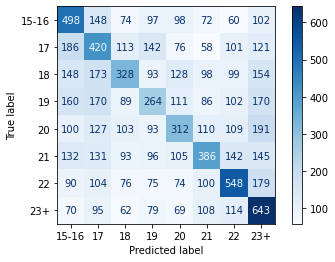

In [556]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.show()

In [80]:
frequency_table = y_test['Age_Group'].value_counts()


print(frequency_table)

22       1246
23+      1240
21       1230
18       1221
17       1217
19       1152
15-16    1149
20       1145
Name: Age_Group, dtype: int64


In [260]:
X_val

0         1         2         3         4         5         6   \
12238  0.116477  0.127342  0.274971  0.396509  0.392507  0.173351  0.434877   
22173  0.127841  0.171328  0.443941  0.287614  0.204647  0.240829  0.240741   
22842  0.221591  0.257670  0.194437  0.377113  0.419788  0.114997  0.547840   
29507  0.193182  0.178116  0.247194  0.378221  0.408634  0.135763  0.324383   
14388  0.261364  0.260114  0.393794  0.290385  0.455061  0.213933  0.358333   
...         ...       ...       ...       ...       ...       ...       ...   
18822  0.167614  0.157480  0.374430  0.469105  0.442006  0.208611  0.329321   
2438   0.164773  0.189791  0.429005  0.423109  0.331485  0.246246  0.384259   
24520  0.142045  0.169970  0.259226  0.389582  0.302459  0.156387  0.538889   
36934  0.176136  0.186804  0.251279  0.417290  0.444041  0.141418  0.257716   
31233  0.139205  0.164268  0.174009  0.278470  0.249288  0.113762  0.318827   

             7         8         9         10        11        12        13  \
12238  0.411930  0.171595  0.583583  0.369974  0.344813  0.294678  0.132439   
22173  0.312020  0.081712  0.606837  0.189967  0.146690  0.330146  0.304978   
22842  0.443747  0.238521  0.509959  0.438215  0.343242  0.347230  0.208404   
29507  0.276660  0.222568  0.580503  0.345629  0.301608  0.373923  0.434375   
14388  0.442102  0.327237  0.519328  0.331981  0.323231  0.233415  0.193478   
...         ...       ...       ...       ...       ...       ...       ...   
18822  0.152631  0.197665  0.779306  0.400221  0.327903  0.425268  0.312611   
2438   0.264339  0.107393  0.659602  0.413501  0.259685  0.303347  0.304948   
24520  0.271006  0.071984  0.655090  0.423091  0.248067  0.246755  0.299285   
36934  0.262638  0.178988  0.614344  0.272593  0.338446  0.370657  0.398141   
31233  0.313928  0.117899  0.544119  0.225378  0.218382  0.489946  0.424797   

             14        15        16        17        18        19        20  \
12238  0.688962  0.196159  0.136382  0.230364  0.426032  0.678842  0.641541   
22173  0.723866  0.306813  0.256255  0.222083  0.466689  0.777735  0.628141   
22842  0.648761  0.099680  0.199754  0.254655  0.377284  0.580144  0.755444   
29507  0.740928  0.102423  0.375820  0.254655  0.286622  0.629687  0.757119   
14388  0.664274  0.246914  0.161095  0.157240  0.291951  0.695162  0.867672   
...         ...       ...       ...       ...       ...       ...       ...   
18822  0.684211  0.228166  0.271842  0.293802  0.296450  0.578007  0.825796   
2438   0.591352  0.198445  0.280045  0.215910  0.390793  0.738683  0.619765   
24520  0.626941  0.160494  0.287736  0.184592  0.433755  0.624636  0.653266   
36934  0.591127  0.277549  0.355722  0.258670  0.333093  0.788226  0.624791   
31233  0.610339  0.063100  0.436218  0.397189  0.377911  0.476588  0.633166   

             21        22        23        24        25        26        27  \
12238  0.377387  0.297792  0.355006  0.558926  0.377039  0.724722  0.358559   
22173  0.249809  0.181159  0.236991  0.610050  0.481971  0.624718  0.108118   
22842  0.370894  0.270876  0.477063  0.379246  0.341096  0.725815  0.310467   
29507  0.450344  0.247412  0.292735  0.425917  0.409208  0.737869  0.360903   
14388  0.406799  0.184955  0.363012  0.533687  0.328138  0.827814  0.190369   
...         ...       ...       ...       ...       ...       ...       ...   
18822  0.577540  0.186680  0.410579  0.378690  0.445530  0.796666  0.156630   
2438   0.512987  0.213941  0.394700  0.487696  0.392482  0.629479  0.093067   
24520  0.364018  0.228433  0.480954  0.530627  0.412277  0.652409  0.289192   
36934  0.501528  0.191856  0.331592  0.640228  0.519539  0.646047  0.280347   
31233  0.213522  0.305038  0.349244  0.334020  0.431449  0.625046  0.352123   

             28        29        30        31        32        33        34  \
12238  0.322906  0.335760  0.234092  0.327924  0.153846  0.399399  0.452501   
22173  0.267124  0.278351  0.289930  0.297504  0.192308  0.

In [ ]:
#multiclass classification

In [67]:
frequency_table2 = final_df['Age'].value_counts()
frequency_table2 = frequency_table2.sort_index()
print(frequency_table2)

15     1057
16     5289
17    10613
18    10121
19    16730
20    11589
21     6722
22     6196
23     2665
24     2239
25     1166
26      657
27      922
28      116
29      211
30      124
31       15
Name: Age, dtype: int64


In [43]:
final_binary = final_df.copy()

final_binary['DOB'] = pd.to_datetime(final_binary['DOB'])


reference_date = pd.to_datetime('2022-10-01')


final_binary['Age'] = final_binary['DOB'].apply(lambda x: relativedelta(reference_date, x).years + round(relativedelta(reference_date, x).months / 12, 1))


In [ ]:



#frequency_table3 = final_binary['Age'].value_counts()
#frequency_table3 = frequency_table3.sort_index()

#frequency_table3.to_excel('frequency_table3.xlsx', index_label='Age')

#print(frequency_table3)

In [44]:
#make the problem binary classification: 15:19 and 20:31
#which are 43810 and 32622 values

#now better with 15:19.7 and 19.8:31.2
#which are 38323 and 18109

def categorize_age(age):
    if age >= 15 and age <= 19.7:
        return 'young'
    elif age >= 19.8 and age <= 31.2:
        return 'old'
    else:
        return 'unknown'



#'1-10-2022'



final_binary['Age_Category'] = final_binary['Age'].apply(categorize_age)


frequency_table3 = final_binary['Age_Category'].value_counts()
frequency_table3 = frequency_table3.sort_index()

print(frequency_table3)




old      38323
young    38109
Name: Age_Category, dtype: int64


In [620]:
final_binary

team_region    player_tag  core_shots  core_goals  core_saves  \
0             Oceania        amphis    0.285714    0.166667    0.111111   
1             Oceania        torsos    0.357143    0.000000    0.222222   
2             Oceania       express    0.285714    0.166667    0.000000   
4             Oceania         laxin    0.071429    0.000000    0.333333   
5             Oceania  baked potato    0.071429    0.166667    0.111111   
...               ...           ...         ...         ...         ...   
106790         Europe   m0nkey m00n    0.285714    0.166667    0.000000   
106791         Europe        seikoo    0.214286    0.000000    0.222222   
106792  North America        jknaps    0.142857    0.000000    0.333333   
106793  North America       chicago    0.142857    0.000000    0.222222   
106794  North America        atomic    0.071429    0.000000    0.000000   

        core_assists  core_score  core_shooting_percentage  boost_bpm  \
0              0.000    0.348348                  0.083333   0.561139   
1              0.125    0.343343                  0.000000   0.688442   
2              0.000    0.230230                  0.083333   0.467337   
4              0.000    0.353353                  0.000000   0.680067   
5              0.000    0.246246                  0.333333   0.659966   
...              ...         ...                       ...        ...   
106790         0.250    0.400400                  0.083333   0.571189   
106791         0.125    0.325325                  0.000000   0.567839   
106792         0.000    0.412412                  0.000000   0.676717   
106793         0.000    0.294294                  0.000000   0.656616   
106794         0.000    0.088088                  0.000000   0.638191   

        boost_bcpm  boost_avg_amount  boost_amount_collected  \
0         0.560736          0.544589                0.238117   
1         0.654421          0.648339                0.277900   
2         0.491017          0.583252                0.208512   
4         0.668855          0.593355                0.284029   
5         0.650063          0.634544                0.276049   
...            ...               ...                     ...   
106790    0.566061          0.614533                0.240199   
106791    0.583232          0.719643                0.247485   
106792    0.653275          0.600155                0.277206   
106793    0.658726          0.624830                0.279519   
106794    0.645916          0.645425                0.274083   

        boost_amount_stolen  boost_amount_collected_big  \
0                  0.118042                    0.262480   
1                  0.301224                    0.255001   
2                  0.141729                    0.168551   
4                  0.169364                    0.300922   
5                  0.211212                    0.303183   
...                     ...                         ...   
106790             0.050138                    0.188728   
106791             0.113699                    0.247521   
106792             0.325701                    0.283528   
106793             0.232531                    0.325796   
106794             0.263324                    0.313620   

        boost_amount_stolen_big  boost_amount_collected_small  \
0                      0.099673                      0.189786   
1                      0.217865                      0.323326   
2                      0.054466                      0.287785   
4                      0.086057                      0.250518   
5                      0.192266                      0.222222   
...                         ...                           ...   
106790                 0.000000                      0.342305   
106791                 0.085512                      0.247412   
106792                 0.309368                      0.264665   
106793                 0.192810                      0.187716   
106794                 0.215142        

In [577]:
#new model with the binary predicted values

pred_bin = final_binary[["Age_Category"]]
x_bin = final_binary.drop(['Age','Age_Category','team_region','player_tag','platform_id','car_name','DOB','advanced_rating','Z_Scores'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(x_bin, pred_bin, test_size=0.2, random_state=123)

#further split the training set into a validation set

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)
x_bin

core_shots  core_goals  core_saves  core_assists  core_score  \
0         0.285714    0.166667    0.111111         0.000    0.348348   
1         0.357143    0.000000    0.222222         0.125    0.343343   
2         0.285714    0.166667    0.000000         0.000    0.230230   
4         0.071429    0.000000    0.333333         0.000    0.353353   
5         0.071429    0.166667    0.111111         0.000    0.246246   
...            ...         ...         ...           ...         ...   
106790    0.285714    0.166667    0.000000         0.250    0.400400   
106791    0.214286    0.000000    0.222222         0.125    0.325325   
106792    0.142857    0.000000    0.333333         0.000    0.412412   
106793    0.142857    0.000000    0.222222         0.000    0.294294   
106794    0.071429    0.000000    0.000000         0.000    0.088088   

        core_shooting_percentage  boost_bpm  boost_bcpm  boost_avg_amount  \
0                       0.083333   0.561139    0.560736          0.544589   
1                       0.000000   0.688442    0.654421          0.648339   
2                       0.083333   0.467337    0.491017          0.583252   
4                       0.000000   0.680067    0.668855          0.593355   
5                       0.333333   0.659966    0.650063          0.634544   
...                          ...        ...         ...               ...   
106790                  0.083333   0.571189    0.566061          0.614533   
106791                  0.000000   0.567839    0.583232          0.719643   
106792                  0.000000   0.676717    0.653275          0.600155   
106793                  0.000000   0.656616    0.658726          0.624830   
106794                  0.000000   0.638191    0.645916          0.645425   

        boost_amount_collected  boost_amount_stolen  \
0                     0.238117             0.118042   
1                     0.277900             0.301224   
2                     0.208512             0.141729   
4                     0.284029             0.169364   
5                     0.276049             0.211212   
...                        ...                  ...   
106790                0.240199             0.050138   
106791                0.247485             0.113699   
106792                0.277206             0.325701   
106793                0.279519             0.232531   
106794                0.274083             0.263324   

        boost_amount_collected_big  boost_amount_stolen_big  \
0                         0.262480                 0.099673   
1                         0.255001                 0.217865   
2                         0.168551                 0.054466   
4                         0.300922                 0.086057   
5                         0.303183                 0.192266   
...                            ...                      ...   
106790                    0.188728                 0.000000   
106791                    0.247521                 0.085512   
106792                    0.283528                 0.309368   
106793                    0.325796                 0.192810   
106794                    0.313620                 0.215142   

        boost_amount_collected_small  boost_amount_stolen_small  \
0                           0.189786                   0.102837   
1                           0.323326                   0.321809   
2                           0.287785                   0.229610   
4                           0.250518                   0.240248   
5                           0.222222                   0.161348   
...                              ...                        ...   
106790                      0.342305                   0.112589   
106791                      0.247412                   0.116135   
106792                      0.264665                   0.227837   
106793                      0.187716                   0.208333   
106794                      0.195652                   0.241135

In [561]:
frequency_table_x = y_test['Age_Category'].value_counts()
frequency_table_x = frequency_table_x.sort_index()



print(frequency_table_x)

old      7561
young    7726
Name: Age_Category, dtype: int64


In [ ]:
#modeling

In [401]:
#logistic regression
y_train = np.ravel(y_train) 

log_reg = LogisticRegression(n_jobs=-1)


log_reg.fit(X_train, y_train)


y_pred = log_reg.predict(X_test)
metrics(y_test, y_pred)

F1 score:  0.6310006877562696
Accuracy score:  0.630993654739321
Recall score:  0.630993654739321
Precision score:  0.6311003979641652


In [426]:
#feature importance

pd.reset_option('display.max_rows')

pred_2 = final_binary[["Age_Category"]]
selected_columns = selected_columns =selected_columns = [
    'movement_count_powerslide',
    'movement_percent_supersonic_speed',
    'movement_time_powerslide',
    'movement_time_supersonic_speed',
    'positioning_avg_distance_to_ball_possession',
    'movement_avg_powerslide_duration',
    'boost_percent_full_boost',
    'boost_amount_used_while_supersonic',
    'positioning_avg_distance_to_ball',
    'boost_time_full_boost',
    'movement_percent_boost_speed',
    'positioning_avg_distance_to_mates',
    'movement_percent_ground',
    'movement_percent_high_air',
    'positioning_avg_distance_to_ball_no_possession',
    'positioning_percent_most_back',
    'boost_bpm',
    'movement_time_high_air',
    'movement_percent_low_air',
    'boost_percent_boost_75_100',
    'boost_amount_overfill',
    'positioning_percent_closest_to_ball',
    'positioning_percent_farthest_from_ball',
    'boost_bcpm',
    'boost_avg_amount',
    'movement_time_boost_speed',
    'boost_amount_collected_small',
    'positioning_percent_most_forward',
    'boost_time_boost_75_100',
    'boost_percent_zero_boost',
    'positioning_percent_neutral_third',
    'core_score',
    'boost_percent_boost_25_50',
    'boost_time_zero_boost',
    'movement_time_ground',
    'boost_percent_boost_50_75',
    'boost_time_boost_25_50',
    'positioning_time_most_back',
    'movement_time_low_air',
    'boost_time_boost_50_75',
    'movement_percent_slow_speed',
    'boost_time_boost_0_25',
    'positioning_time_neutral_third',
    'positioning_time_most_forward',
    'positioning_time_farthest_from_ball',
    'positioning_percent_behind_ball',
    'boost_percent_boost_0_25',
    'movement_avg_speed',
    'boost_amount_stolen',
    'movement_avg_speed_percentage',
    'positioning_percent_in_front_ball',
    'boost_amount_stolen_small',
    'positioning_time_in_front_ball',
    'positioning_time_closest_to_ball',
    'boost_amount_collected',
    'boost_amount_collected_big',
    'boost_amount_stolen_big',
    'positioning_percent_offensive_third',
    'positioning_time_offensive_third',
    'movement_time_slow_speed',
    'boost_count_collected_small',
    'boost_amount_overfill_stolen',
    'movement_total_distance',
    'positioning_percent_defensive_third'

]



x_2 = final_binary[selected_columns]
#x_2 = final_bal.drop(['Age','team_region','player_tag','platform_id','car_name','DOB','advanced_rating','Z_Scores','Age_Group'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x_2, pred_2, test_size=0.2, random_state=123)

#further split the training set into a validation set

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)
X_train




movement_count_powerslide  movement_percent_supersonic_speed  \
94268                   0.193182                           0.509225   
1603                    0.201705                           0.273108   
74713                   0.161932                           0.216589   
96884                   0.167614                           0.353504   
70431                   0.196023                           0.341082   
...                          ...                                ...   
65457                   0.181818                           0.382678   
22220                   0.230114                           0.298478   
58698                   0.147727                           0.444322   
16072                   0.292614                           0.202255   
17808                   0.167614                           0.215134   

       movement_time_powerslide  movement_time_supersonic_speed  \
94268                  0.115938                        0.404970   
1603                   0.201195                        0.209245   
74713                  0.187619                        0.160210   
96884                  0.194407                        0.266879   
70431                  0.220201                        0.257246   
...                         ...                             ...   
65457                  0.229161                        0.281060   
22220                  0.325550                        0.244966   
58698                  0.150149                        0.319800   
16072                  0.242465                        0.189399   
17808                  0.140918                        0.175177   

       positioning_avg_distance_to_ball_possession  \
94268                                     0.236420   
1603                                      0.421914   
74713                                     0.262346   
96884                                     0.525926   
70431                                     0.470370   
...                                            ...   
65457                                     0.410494   
22220                                     0.484877   
58698                                     0.267901   
16072                                     0.507099   
17808                                     0.466975   

       movement_avg_powerslide_duration  boost_percent_full_boost  \
94268                          0.038462                  0.296527   
1603                           0.115385                  0.261181   
74713                          0.153846                  0.206115   
96884                          0.153846                  0.325829   
70431                          0.153846                  0.218482   
...                                 ...                       ...   
65457                          0.173077                  0.282003   
22220                          0.211538                  0.241029   
58698                          0.134615                  0.371421   
16072                          0.096154                  0.305537   
17808                          0.096154                  0.285547   

       boost_amount_used_while_supersonic  positioning_avg_distance_to_ball  \
94268                            0.221401                          0.231280   
1603                             0.157588                          0.423829   
74713                            0.142023                          0.284397   
96884                            0.210506                          0.359646   
70431                            0.136965                          0.496496   
...                                   ...                               ...   
65457                            0.105837                          0.420140   
22220                            0.063424                          0.362228   
58698                            0.177432                          0.254150   
16072                            0.067315                          0.425673   
17

In [427]:

y_train = np.ravel(y_train)

log_reg = LogisticRegression(n_jobs=-1)


log_reg.fit(X_train, y_train)


y_pred = log_reg.predict(X_val)
metrics(y_val, y_pred)

#0.630993654739321 with 84
#0.631255314973507 with 74
#0.6321057107346111 with 64
#0.630993654739321 with 54
#0.625237129587231 with 44
#0.6251717145286845 with 34
#0.623863413357755 with 24
#0.622228036894093 with 14
#0.599332766402826 with 4
#
#
#

F1 score:  0.6321054494062137
Accuracy score:  0.6321057107346111
Recall score:  0.6321057107346111
Precision score:  0.6322542761863476


In [ ]:
y_pred = log_reg.predict(X_test)
metrics(y_test, y_pred)


In [ ]:
#hyperparamter tuning

In [ ]:
logreg = LogisticRegression()



param_grid = {
    'C': [0.1, 1.0, 5.0, 10.0,20.0],  
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2'], 
    'max_iter': [1000] 
}

y_train = np.ravel(y_train)
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train, y_train)


grid_search.best_estimator_




y_pred = grid_search.predict(X_test) 

#check the score with the best model on the test set
metrics(y_test, y_pred)

In [578]:
# reset for new model

pred_bin = final_binary[["Age_Category"]]
x_bin = final_binary.drop(['Age','Age_Category','team_region','player_tag','platform_id','car_name','DOB','advanced_rating','Z_Scores'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(x_bin, pred_bin, test_size=0.2, random_state=123)

#further split the training set into a validation set

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)
X_train

core_shots  core_goals  core_saves  core_assists  core_score  \
94268    0.357143    0.166667    0.000000         0.000    0.284284   
1603     0.214286    0.000000    0.000000         0.125    0.260260   
74713    0.214286    0.166667    0.000000         0.250    0.406406   
96884    0.142857    0.000000    0.111111         0.125    0.329329   
70431    0.571429    0.333333    0.222222         0.125    0.530531   
...           ...         ...         ...           ...         ...   
65457    0.214286    0.166667    0.444444         0.000    0.497497   
22220    0.071429    0.000000    0.000000         0.000    0.178178   
58698    0.285714    0.166667    0.333333         0.125    0.517518   
16072    0.285714    0.000000    0.333333         0.000    0.404404   
17808    0.357143    0.500000    0.000000         0.125    0.615616   

       core_shooting_percentage  boost_bpm  boost_bcpm  boost_avg_amount  \
94268                  0.066667   0.668342    0.672934          0.439091   
1603                   0.000000   0.718593    0.663709          0.688362   
74713                  0.111111   0.675042    0.687429          0.664465   
96884                  0.000000   0.711893    0.690785          0.652419   
70431                  0.083333   0.711893    0.705295          0.671653   
...                         ...        ...         ...               ...   
65457                  0.111111   0.688442    0.676694          0.764912   
22220                  0.000000   0.582915    0.588641          0.713814   
58698                  0.083333   0.706868    0.674560          0.649505   
16072                  0.000000   0.592965    0.574993          0.626579   
17808                  0.200000   0.515913    0.558164          0.696911   

       boost_amount_collected  boost_amount_stolen  \
94268                0.301839             0.257797   
1603                 0.296403             0.185946   
74713                0.296288             0.288591   
96884                0.306812             0.166996   
70431                0.304267             0.217134   
...                       ...                  ...   
65457                0.291777             0.148835   
22220                0.282179             0.281090   
58698                0.285186             0.190683   
16072                0.317914             0.207659   
17808                0.256505             0.073431   

       boost_amount_collected_big  boost_amount_stolen_big  \
94268                    0.330492                 0.204248   
1603                     0.339537                 0.135076   
74713                    0.327361                 0.269608   
96884                    0.340059                 0.129630   
70431                    0.301618                 0.164488   
...                           ...                      ...   
65457                    0.306488                 0.147059   
22220                    0.249087                 0.255991   
58698                    0.326318                 0.186819   
16072                    0.369977                 0.174837   
17808                    0.286311                 0.069717   

       boost_amount_collected_small  boost_amount_stolen_small  \
94268                      0.244997                   0.246454   
1603                       0.210835                   0.197695   
74713                      0.234645                   0.209220   
96884                      0.240856                   0.164007   
70431                      0.309524                   0.219858   
...                             ...                        ...   
65457                      0.262595                   0.094858   
22220                      0.347826                   0.214539   
58698                      0.203589                   0.124113   
16072                      0.214631                   0.181738   
17808                      0.197378                   0.051418   

       boost_count_collected_big  boost_count_stolen_b

In [118]:
#support vector machine

y_train = np.ravel(y_train) 

svm_classifier = SVC(kernel='linear')


svm_classifier.fit(X_train, y_train)


y_pred = svm_classifier.predict(X_test)

metrics(y_test, y_pred)

F1 score:  0.6309156746404649
Accuracy score:  0.6309282396807745
Recall score:  0.6309282396807745
Precision score:  0.6311278719481023


In [230]:
#feature importance
pd.reset_option('display.max_rows')

pred_2 = final_binary[["Age_Category"]]
selected_columns = [
    "movement_count_powerslide",
    "movement_time_powerslide",
    "boost_percent_full_boost",
    "positioning_avg_distance_to_mates",
    "movement_percent_supersonic_speed",
    "boost_time_full_boost",
    "positioning_avg_distance_to_ball_possession",
    "movement_percent_ground",
    "boost_amount_used_while_supersonic",
    "movement_percent_low_air",
    "positioning_avg_distance_to_ball",
    "movement_time_supersonic_speed",
    "boost_percent_zero_boost",
    "movement_percent_high_air",
    "movement_percent_boost_speed",
    "boost_amount_overfill",
    "movement_time_high_air",
    "boost_time_zero_boost",
    "positioning_percent_most_back",
    "boost_avg_amount",
    "boost_bpm",
    "positioning_avg_distance_to_ball_no_possession",
    "boost_amount_collected_small",
    "positioning_percent_farthest_from_ball",
    "boost_percent_boost_75_100",
    "positioning_percent_closest_to_ball",
    "boost_bcpm",
    "boost_percent_boost_25_50",
    "positioning_percent_most_forward",
    "movement_time_low_air",
    "boost_percent_boost_0_25",
    "boost_time_boost_75_100",
    "movement_avg_powerslide_duration",
    "core_score",
    "boost_percent_boost_50_75",
    "movement_time_ground",
    "movement_percent_slow_speed",
    "positioning_percent_neutral_third",
    "boost_time_boost_50_75",
    "positioning_time_most_back",
    "positioning_time_farthest_from_ball",
    "boost_amount_stolen_small",
    "movement_time_boost_speed"
]



x_2 = final_binary[selected_columns]
#x_2 = final_bal.drop(['Age','team_region','player_tag','platform_id','car_name','DOB','advanced_rating','Z_Scores','Age_Group'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x_2, pred_2, test_size=0.2, random_state=123)

#further split the training set into a validation set

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)
X_train




0         1         2         3         4         5         6   \
56877  0.193182  0.115938  0.296527  0.357163  0.509225  0.171498  0.236420   
41040  0.201705  0.201195  0.261181  0.383763  0.273108  0.150399  0.421914   
44310  0.161932  0.187619  0.206115  0.466334  0.216589  0.114569  0.262346   
43695  0.167614  0.194407  0.325829  0.350790  0.353504  0.186609  0.525926   
18509  0.196023  0.220201  0.218482  0.395400  0.341082  0.121555  0.470370   
...         ...       ...       ...       ...       ...       ...       ...   
54370  0.181818  0.229161  0.282003  0.401219  0.382678  0.156814  0.410494   
17730  0.230114  0.325550  0.241029  0.363536  0.298478  0.148926  0.484877   
28030  0.147727  0.150149  0.371421  0.358825  0.444322  0.202528  0.267901   
15725  0.292614  0.242465  0.305537  0.389027  0.202255  0.217592  0.507099   
52734  0.167614  0.140918  0.285547  0.367969  0.215134  0.169169  0.466975   

             7         8         9         10        11        12        13  \
56877  0.299621  0.221401  0.656693  0.231280  0.404970  0.521431  0.233533   
41040  0.421749  0.157588  0.505549  0.423829  0.209245  0.292884  0.265234   
44310  0.388216  0.142023  0.521755  0.284397  0.160210  0.282010  0.306536   
43695  0.363008  0.210506  0.619710  0.359646  0.266879  0.285223  0.168015   
18509  0.275678  0.136965  0.673995  0.496496  0.257246  0.301321  0.251692   
...         ...       ...       ...       ...       ...       ...       ...   
54370  0.386328  0.105837  0.638230  0.420140  0.281060  0.196157  0.080397   
17730  0.383636  0.063424  0.596582  0.362228  0.244966  0.146927  0.168621   
28030  0.384716  0.177432  0.542543  0.254150  0.319800  0.252369  0.273092   
15725  0.351930  0.067315  0.610967  0.425673  0.189399  0.292176  0.209527   
52734  0.288173  0.062646  0.646251  0.443748  0.175177  0.198257  0.279215   

             14        15        16        17        18        19        20  \
56877  0.695556  0.055327  0.217699  0.373952  0.305158  0.439091  0.668342   
41040  0.674348  0.082305  0.238208  0.209134  0.430117  0.688362  0.718593   
44310  0.749247  0.155921  0.265792  0.194379  0.322056  0.664465  0.675042   
43695  0.567808  0.182899  0.148687  0.202560  0.406445  0.652419  0.711893   
18509  0.745069  0.089163  0.222518  0.207880  0.471092  0.671653  0.711893   
...         ...       ...       ...       ...       ...       ...       ...   
54370  0.635386  0.314129  0.069217  0.135257  0.492273  0.764912  0.688442   
17730  0.598805  0.094193  0.162223  0.112572  0.331962  0.713814  0.582915   
28030  0.609277  0.206676  0.230414  0.170640  0.462827  0.649505  0.706868   
15725  0.646274  0.183356  0.230004  0.258018  0.423453  0.626579  0.592965   
52734  0.651247  0.214449  0.266509  0.145646  0.390364  0.696911  0.515913   

             21        22        23        24        25        26        27  \
56877  0.326203  0.244997  0.347927  0.339308  0.504599  0.672934  0.196156   
41040  0.511841  0.210835  0.521505  0.465955  0.308656  0.663709  0.235354   
44310  0.445760  0.234645  0.239241  0.509198  0.479785  0.687429  0.366650   
43695  0.215814  0.240856  0.373088  0.451134  0.327963  0.690785  0.373721   
18509  0.542399  0.309524  0.445344  0.359560  0.286672  0.705295  0.378787   
...         ...       ...       ...       ...       ...       ...       ...   
54370  0.508785  0.262595  0.456177  0.595132  0.299108  0.676694  0.276238   
17730  0.290298  0.347826  0.286170  0.491497  0.388744  0.588641  0.249065   
28030  0.339954  0.203589  0.344796  0.610767  0.381043  0.674560  0.224224   
15725  0.407945  0.214631  0.451875  0.537228  0.340489  0.574993  0.308566   
52734  0.485485  0.197378  0.366869  0.519846  0.336761  0.558164  0.236739   

             28        29        30        31        32        33        34  \
56877  0.448892  0.333471  0.482515  0.181536  0.038462  0.284284  0.439448   
41040  0.350402  0.256610  0.335941  0.238025  0.115385  0.

In [231]:
y_train = np.ravel(y_train)

svm_classifier = SVC(kernel='linear')


svm_classifier.fit(X_train, y_train)


y_pred = svm_classifier.predict(X_test)

metrics(y_test, y_pred)

F1 score:  0.6299494682360555
Accuracy score:  0.6299470138025773
Recall score:  0.6299470138025773
Precision score:  0.6300814595490376


In [232]:
#reset for new model
pred_bin = final_binary[["Age_Category"]]
x_bin = final_binary.drop(['Age','Age_Category','team_region','player_tag','platform_id','car_name','DOB','advanced_rating','Z_Scores'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(x_bin, pred_bin, test_size=0.2, random_state=123)

#further split the training set into a validation set

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)
X_train

0         1         2      3         4         5         6   \
56877  0.357143  0.166667  0.000000  0.000  0.284284  0.066667  0.668342   
41040  0.214286  0.000000  0.000000  0.125  0.260260  0.000000  0.718593   
44310  0.214286  0.166667  0.000000  0.250  0.406406  0.111111  0.675042   
43695  0.142857  0.000000  0.111111  0.125  0.329329  0.000000  0.711893   
18509  0.571429  0.333333  0.222222  0.125  0.530531  0.083333  0.711893   
...         ...       ...       ...    ...       ...       ...       ...   
54370  0.214286  0.166667  0.444444  0.000  0.497497  0.111111  0.688442   
17730  0.071429  0.000000  0.000000  0.000  0.178178  0.000000  0.582915   
28030  0.285714  0.166667  0.333333  0.125  0.517518  0.083333  0.706868   
15725  0.285714  0.000000  0.333333  0.000  0.404404  0.000000  0.592965   
52734  0.357143  0.500000  0.000000  0.125  0.615616  0.200000  0.515913   

             7         8         9         10        11        12        13  \
56877  0.672934  0.439091  0.301839  0.257797  0.330492  0.204248  0.244997   
41040  0.663709  0.688362  0.296403  0.185946  0.339537  0.135076  0.210835   
44310  0.687429  0.664465  0.296288  0.288591  0.327361  0.269608  0.234645   
43695  0.690785  0.652419  0.306812  0.166996  0.340059  0.129630  0.240856   
18509  0.705295  0.671653  0.304267  0.217134  0.301618  0.164488  0.309524   
...         ...       ...       ...       ...       ...       ...       ...   
54370  0.676694  0.764912  0.291777  0.148835  0.306488  0.147059  0.262595   
17730  0.588641  0.713814  0.282179  0.281090  0.249087  0.255991  0.347826   
28030  0.674560  0.649505  0.285186  0.190683  0.326318  0.186819  0.203589   
15725  0.574993  0.626579  0.317914  0.207659  0.369977  0.174837  0.214631   
52734  0.558164  0.696911  0.256505  0.073431  0.286311  0.069717  0.197378   

             14        15        16        17        18        19        20  \
56877  0.246454  0.285714  0.190476  0.263158  0.274725  0.055327  0.036474   
41040  0.197695  0.314286  0.142857  0.226721  0.219780  0.082305  0.006079   
44310  0.209220  0.314286  0.238095  0.255061  0.252747  0.155921  0.019757   
43695  0.164007  0.342857  0.142857  0.246964  0.175824  0.182899  0.104863   
18509  0.219858  0.271429  0.190476  0.295547  0.164835  0.089163  0.147416   
...         ...       ...       ...       ...       ...       ...       ...   
54370  0.094858  0.342857  0.142857  0.283401  0.098901  0.314129  0.044073   
17730  0.214539  0.228571  0.285714  0.360324  0.263736  0.094193  0.211246   
28030  0.124113  0.328571  0.190476  0.218623  0.131868  0.206676  0.085106   
15725  0.181738  0.357143  0.190476  0.222672  0.186813  0.183356  0.118541   
52734  0.051418  0.300000  0.095238  0.210526  0.065934  0.214449  0.107903   

             21        22        23        24        25        26        27  \
56877  0.221401  0.373952  0.521431  0.171498  0.296527  0.342763  0.206060   
41040  0.157588  0.209134  0.292884  0.150399  0.261181  0.237869  0.221085   
44310  0.142023  0.194379  0.282010  0.114569  0.206115  0.163852  0.297290   
43695  0.210506  0.202560  0.285223  0.186609  0.325829  0.207097  0.308028   
18509  0.136965  0.207880  0.301321  0.121555  0.218482  0.232926  0.310874   
...         ...       ...       ...       ...       ...       ...       ...   
54370  0.105837  0.135257  0.196157  0.156814  0.282003  0.174347  0.238884   
17730  0.063424  0.112572  0.146927  0.148926  0.241029  0.202238  0.252828   
28030  0.177432  0.170640  0.252369  0.202528  0.371421  0.209810  0.202133   
15725  0.067315  0.258018  0.292176  0.217592  0.305537  0.256715  0.326620   
52734  0.062646  0.145646  0.198257  0.169169  0.285547  0.210231  0.232903   

             28        29        30        31        32        33        34  \
56877  0.207215  0.181536  0.482515  0.196156  0.439448  0.339308  0.823729   
41040  0.238338  0.238025  0.335941  0.235354  0.529382  0.465955  0.670508   
44310  0.239567 

In [ ]:
#hyperparameter tuning


In [233]:
patch_sklearn()

y_train = np.ravel(y_train) 

svm_classifier = svm.SVC()


param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': [0.1, 0.01, 0.001]}


grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy', verbose=1)


grid_search.fit(X_train, y_train)


print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))


test_accuracy = grid_search.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(test_accuracy))


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found:  {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation accuracy: 0.65
Test set accuracy: 0.65


In [236]:

best_svm_classifier = svm.SVC(C=100, gamma=0.1, kernel='rbf')

best_svm_classifier.fit(X_train, y_train)

y_pred = best_svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

metrics(y_test, y_pred) 

Accuracy: 0.6465624386733826
F1 score:  0.6462948992989512
Accuracy score:  0.6465624386733826
Recall score:  0.6465624386733826
Precision score:  0.6474754031184714


In [492]:
#reset for new model

pred_bin = final_binary[["Age_Category"]]
x_bin = final_binary.drop(['Age','Age_Category','team_region','player_tag','platform_id','car_name','DOB','advanced_rating','Z_Scores'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(x_bin, pred_bin, test_size=0.2, random_state=123)

#further split the training set into a validation set

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)
X_train

core_shots  core_goals  core_saves  core_assists  core_score  \
94268    0.357143    0.166667    0.000000         0.000    0.284284   
1603     0.214286    0.000000    0.000000         0.125    0.260260   
74713    0.214286    0.166667    0.000000         0.250    0.406406   
96884    0.142857    0.000000    0.111111         0.125    0.329329   
70431    0.571429    0.333333    0.222222         0.125    0.530531   
...           ...         ...         ...           ...         ...   
65457    0.214286    0.166667    0.444444         0.000    0.497497   
22220    0.071429    0.000000    0.000000         0.000    0.178178   
58698    0.285714    0.166667    0.333333         0.125    0.517518   
16072    0.285714    0.000000    0.333333         0.000    0.404404   
17808    0.357143    0.500000    0.000000         0.125    0.615616   

       core_shooting_percentage  boost_bpm  boost_bcpm  boost_avg_amount  \
94268                  0.066667   0.668342    0.672934          0.439091   
1603                   0.000000   0.718593    0.663709          0.688362   
74713                  0.111111   0.675042    0.687429          0.664465   
96884                  0.000000   0.711893    0.690785          0.652419   
70431                  0.083333   0.711893    0.705295          0.671653   
...                         ...        ...         ...               ...   
65457                  0.111111   0.688442    0.676694          0.764912   
22220                  0.000000   0.582915    0.588641          0.713814   
58698                  0.083333   0.706868    0.674560          0.649505   
16072                  0.000000   0.592965    0.574993          0.626579   
17808                  0.200000   0.515913    0.558164          0.696911   

       boost_amount_collected  boost_amount_stolen  \
94268                0.301839             0.257797   
1603                 0.296403             0.185946   
74713                0.296288             0.288591   
96884                0.306812             0.166996   
70431                0.304267             0.217134   
...                       ...                  ...   
65457                0.291777             0.148835   
22220                0.282179             0.281090   
58698                0.285186             0.190683   
16072                0.317914             0.207659   
17808                0.256505             0.073431   

       boost_amount_collected_big  boost_amount_stolen_big  \
94268                    0.330492                 0.204248   
1603                     0.339537                 0.135076   
74713                    0.327361                 0.269608   
96884                    0.340059                 0.129630   
70431                    0.301618                 0.164488   
...                           ...                      ...   
65457                    0.306488                 0.147059   
22220                    0.249087                 0.255991   
58698                    0.326318                 0.186819   
16072                    0.369977                 0.174837   
17808                    0.286311                 0.069717   

       boost_amount_collected_small  boost_amount_stolen_small  \
94268                      0.244997                   0.246454   
1603                       0.210835                   0.197695   
74713                      0.234645                   0.209220   
96884                      0.240856                   0.164007   
70431                      0.309524                   0.219858   
...                             ...                        ...   
65457                      0.262595                   0.094858   
22220                      0.347826                   0.214539   
58698                      0.203589                   0.124113   
16072                      0.214631                   0.181738   
17808                      0.197378                   0.051418   

       boost_count_collected_big  boost_count_stolen_b

In [562]:
#naive base


y_train = np.ravel(y_train)
gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
metrics(y_test, y_pred)

F1 score:  0.5991068272749154
Accuracy score:  0.6005102374566625
Recall score:  0.6005102374566625
Precision score:  0.6027910652181228


In [499]:
#feature importance

pred_bin2 = final_binary[["Age_Category"]]
#x_bin2 = final_binary.drop(['Age','Age_Category','team_region','player_tag','platform_id','car_name','DOB','advanced_rating','Z_Scores','advanced_mvp','winner','core_goals','core_assists','positioning_goals_against_while_last_defender','demo_taken','demo_inflicted','advanced_goal_participation','core_saves','core_shooting_percentage','boost_count_stolen_big','core_shots','boost_count_collected_big','boost_count_stolen_big','boost_count_stolen_small','positioning_percent_defensive_half','positioning_percent_offensive_half','positioning_time_offensive_half','positioning_time_defensive_third','positioning_time_defensive_half','positioning_time_behind_ball','positioning_percent_defensive_third','movement_total_distance','boost_amount_overfill_stolen'], axis=1)
x_bin2 = final_binary.drop(['Age','Age_Category','team_region','player_tag','platform_id','car_name','DOB','advanced_rating','Z_Scores','advanced_mvp','winner','core_goals','core_assists','positioning_goals_against_while_last_defender','demo_taken','demo_inflicted','advanced_goal_participation','core_saves','core_shooting_percentage','boost_count_stolen_big','core_shots','boost_count_collected_big','boost_count_stolen_big'], axis=1)


selected_columns= [
    'movement_count_powerslide',
    'movement_percent_supersonic_speed',
    'movement_time_powerslide',
    'movement_time_supersonic_speed',
    'positioning_avg_distance_to_ball_possession',
    'movement_avg_powerslide_duration',
    'boost_percent_full_boost',
    'boost_amount_used_while_supersonic',
    'positioning_avg_distance_to_ball',
    'boost_time_full_boost',
    'movement_percent_boost_speed',
    'positioning_avg_distance_to_mates'
]
x_bin2 = final_binary[selected_columns]

X_train, X_test, y_train, y_test = train_test_split(x_bin2, pred_bin2, test_size=0.2, random_state=123)

#further split the training set into a validation set

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)
X_train

movement_count_powerslide  movement_percent_supersonic_speed  \
94268                   0.193182                           0.509225   
1603                    0.201705                           0.273108   
74713                   0.161932                           0.216589   
96884                   0.167614                           0.353504   
70431                   0.196023                           0.341082   
...                          ...                                ...   
65457                   0.181818                           0.382678   
22220                   0.230114                           0.298478   
58698                   0.147727                           0.444322   
16072                   0.292614                           0.202255   
17808                   0.167614                           0.215134   

       movement_time_powerslide  movement_time_supersonic_speed  \
94268                  0.115938                        0.404970   
1603                   0.201195                        0.209245   
74713                  0.187619                        0.160210   
96884                  0.194407                        0.266879   
70431                  0.220201                        0.257246   
...                         ...                             ...   
65457                  0.229161                        0.281060   
22220                  0.325550                        0.244966   
58698                  0.150149                        0.319800   
16072                  0.242465                        0.189399   
17808                  0.140918                        0.175177   

       positioning_avg_distance_to_ball_possession  \
94268                                     0.236420   
1603                                      0.421914   
74713                                     0.262346   
96884                                     0.525926   
70431                                     0.470370   
...                                            ...   
65457                                     0.410494   
22220                                     0.484877   
58698                                     0.267901   
16072                                     0.507099   
17808                                     0.466975   

       movement_avg_powerslide_duration  boost_percent_full_boost  \
94268                          0.038462                  0.296527   
1603                           0.115385                  0.261181   
74713                          0.153846                  0.206115   
96884                          0.153846                  0.325829   
70431                          0.153846                  0.218482   
...                                 ...                       ...   
65457                          0.173077                  0.282003   
22220                          0.211538                  0.241029   
58698                          0.134615                  0.371421   
16072                          0.096154                  0.305537   
17808                          0.096154                  0.285547   

       boost_amount_used_while_supersonic  positioning_avg_distance_to_ball  \
94268                            0.221401                          0.231280   
1603                             0.157588                          0.423829   
74713                            0.142023                          0.284397   
96884                            0.210506                          0.359646   
70431                            0.136965                          0.496496   
...                                   ...                               ...   
65457                            0.105837                          0.420140   
22220                            0.063424                          0.362228   
58698                            0.177432                          0.254150   
16072                            0.067315                          0.425673   
17

In [500]:
y_train = np.ravel(y_train) 
gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
metrics(y_test, y_pred)

#0.6005102374566625 with 84
#0.5959311833584091 with 74
#0.5987440308759077 with 64
#0.6020147838032315 with 54
#0.6062667626087526 with 44
#0.6080329691895074 with 34
#0.6082292143651469 with 24
#0.6173219075031072 with 14
#0.619349774318048 with 12
#0.612088702819389 with 10
#0.5828481716491136 with 4




#0.609210440243344 with 38
#0.6155557009223523 with 18

F1 score:  0.6191850449747518
Accuracy score:  0.619349774318048
Recall score:  0.619349774318048
Precision score:  0.6199168235967244


In [ ]:
#hyperparameter tuning

In [502]:
gnb = GaussianNB()


param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],  
    'priors': [None, [0.25, 0.25, 0.5], [0.2, 0.3, 0.5]]  

}

grid_search = GridSearchCV(gnb, param_grid, cv=5)
grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)
metrics(y_test, y_pred)

C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\brams\anaconda3\lib\site-packages\sklearn\naive_bayes.py", line 245, in fit
    return self._partial_fit(
  File "C:\Users\brams\anaconda3\lib\site-packages\sklearn\naive_bayes.py", line 428, in _partial_fit
    raise ValueError("Number of priors must match number of classes.")
ValueError: Nu

F1 score:  0.6191850449747518
Accuracy score:  0.619349774318048
Recall score:  0.619349774318048
Precision score:  0.6199168235967244


In [579]:
#reset for new model
pred_bin = final_binary[["Age_Category"]]
x_bin = final_binary.drop(['Age','Age_Category','team_region','player_tag','platform_id','car_name','DOB','advanced_rating','Z_Scores'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(x_bin, pred_bin, test_size=0.2, random_state=123)

#further split the training set into a validation set

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)
X_train

core_shots  core_goals  core_saves  core_assists  core_score  \
94268    0.357143    0.166667    0.000000         0.000    0.284284   
1603     0.214286    0.000000    0.000000         0.125    0.260260   
74713    0.214286    0.166667    0.000000         0.250    0.406406   
96884    0.142857    0.000000    0.111111         0.125    0.329329   
70431    0.571429    0.333333    0.222222         0.125    0.530531   
...           ...         ...         ...           ...         ...   
65457    0.214286    0.166667    0.444444         0.000    0.497497   
22220    0.071429    0.000000    0.000000         0.000    0.178178   
58698    0.285714    0.166667    0.333333         0.125    0.517518   
16072    0.285714    0.000000    0.333333         0.000    0.404404   
17808    0.357143    0.500000    0.000000         0.125    0.615616   

       core_shooting_percentage  boost_bpm  boost_bcpm  boost_avg_amount  \
94268                  0.066667   0.668342    0.672934          0.439091   
1603                   0.000000   0.718593    0.663709          0.688362   
74713                  0.111111   0.675042    0.687429          0.664465   
96884                  0.000000   0.711893    0.690785          0.652419   
70431                  0.083333   0.711893    0.705295          0.671653   
...                         ...        ...         ...               ...   
65457                  0.111111   0.688442    0.676694          0.764912   
22220                  0.000000   0.582915    0.588641          0.713814   
58698                  0.083333   0.706868    0.674560          0.649505   
16072                  0.000000   0.592965    0.574993          0.626579   
17808                  0.200000   0.515913    0.558164          0.696911   

       boost_amount_collected  boost_amount_stolen  \
94268                0.301839             0.257797   
1603                 0.296403             0.185946   
74713                0.296288             0.288591   
96884                0.306812             0.166996   
70431                0.304267             0.217134   
...                       ...                  ...   
65457                0.291777             0.148835   
22220                0.282179             0.281090   
58698                0.285186             0.190683   
16072                0.317914             0.207659   
17808                0.256505             0.073431   

       boost_amount_collected_big  boost_amount_stolen_big  \
94268                    0.330492                 0.204248   
1603                     0.339537                 0.135076   
74713                    0.327361                 0.269608   
96884                    0.340059                 0.129630   
70431                    0.301618                 0.164488   
...                           ...                      ...   
65457                    0.306488                 0.147059   
22220                    0.249087                 0.255991   
58698                    0.326318                 0.186819   
16072                    0.369977                 0.174837   
17808                    0.286311                 0.069717   

       boost_amount_collected_small  boost_amount_stolen_small  \
94268                      0.244997                   0.246454   
1603                       0.210835                   0.197695   
74713                      0.234645                   0.209220   
96884                      0.240856                   0.164007   
70431                      0.309524                   0.219858   
...                             ...                        ...   
65457                      0.262595                   0.094858   
22220                      0.347826                   0.214539   
58698                      0.203589                   0.124113   
16072                      0.214631                   0.181738   
17808                      0.197378                   0.051418   

       boost_count_collected_big  boost_count_stolen_b

In [580]:
#random forest binary
y_train = np.ravel(y_train) 

rf_classifier_bin = RandomForestClassifier(n_estimators=100, random_state=42,n_jobs=-1)


rf_classifier_bin.fit(X_train, y_train)


y_pred = rf_classifier_bin.predict(X_test)

metrics(y_test, y_pred)

F1 score:  0.6463735821495389
Accuracy score:  0.6464316085562897
Recall score:  0.6464316085562897
Precision score:  0.6467972977691007


In [ ]:
#improve model with feature importance

In [74]:
# Retrieve feature importances
feature_importance = pd.Series(rf_classifier_bin.feature_importances_, index=X_train.columns).sort_values(ascending=False)
pd.set_option('display.max_rows', None)

print(feature_importance)

movement_count_powerslide                         0.033793
movement_percent_supersonic_speed                 0.020513
movement_time_powerslide                          0.020267
movement_time_supersonic_speed                    0.018027
positioning_avg_distance_to_ball_possession       0.018024
movement_avg_powerslide_duration                  0.017779
boost_percent_full_boost                          0.017678
boost_amount_used_while_supersonic                0.017574
positioning_avg_distance_to_ball                  0.017015
boost_time_full_boost                             0.016100
movement_percent_boost_speed                      0.016081
positioning_avg_distance_to_mates                 0.015821
movement_percent_ground                           0.015009
movement_percent_high_air                         0.014199
positioning_avg_distance_to_ball_no_possession    0.013949
positioning_percent_most_back                     0.013921
boost_bpm                                         0.0139

In [582]:
pd.reset_option('display.max_rows')
pred_bin2 = final_binary[["Age_Category"]]
x_bin2 = final_binary.drop(['Age','Age_Category','team_region','player_tag','platform_id','car_name','DOB','advanced_rating','Z_Scores','advanced_mvp','winner','core_goals','core_assists','positioning_goals_against_while_last_defender','demo_taken','demo_inflicted','advanced_goal_participation','core_saves','core_shooting_percentage','boost_count_stolen_big','core_shots','boost_count_collected_big','boost_count_stolen_big','boost_count_stolen_small','positioning_percent_defensive_half','positioning_percent_offensive_half','positioning_time_offensive_half','positioning_time_defensive_third','positioning_time_defensive_half','positioning_time_behind_ball','positioning_percent_defensive_third','movement_total_distance','boost_amount_overfill_stolen'], axis=1)
#x_bin2 = final_binary.drop(['Age','Age_Category','team_region','player_tag','platform_id','car_name','DOB','advanced_rating','Z_Scores','advanced_mvp','winner','core_goals','core_assists','positioning_goals_against_while_last_defender','demo_taken','demo_inflicted','advanced_goal_participation','core_saves','core_shooting_percentage','boost_count_stolen_big','core_shots','boost_count_collected_big','boost_count_stolen_big','KD'], axis=1)


selected_columns = selected_columns = selected_columns = [
    'movement_count_powerslide',
    'movement_percent_supersonic_speed',
    'movement_time_powerslide',
    'movement_time_supersonic_speed',
    'positioning_avg_distance_to_ball_possession',
    'movement_avg_powerslide_duration',
    'boost_percent_full_boost',
    'boost_amount_used_while_supersonic',
    'positioning_avg_distance_to_ball',
    'boost_time_full_boost',
    'movement_percent_boost_speed',
    'positioning_avg_distance_to_mates',
    'movement_percent_ground',
    'movement_percent_high_air',
    'positioning_avg_distance_to_ball_no_possession',
    'positioning_percent_most_back',
    'boost_bpm',
    'movement_time_high_air',
    'movement_percent_low_air',
    'boost_percent_boost_75_100',
    'boost_amount_overfill',
    'positioning_percent_closest_to_ball',
    'positioning_percent_farthest_from_ball',
    'boost_bcpm',
    'boost_avg_amount',
    'movement_time_boost_speed',
    'boost_amount_collected_small',
    'positioning_percent_most_forward',
    'boost_time_boost_75_100',
    'boost_percent_zero_boost',
    'positioning_percent_neutral_third',
    'core_score',
    'boost_percent_boost_25_50',
    'boost_time_zero_boost',
    'movement_time_ground',
    'boost_percent_boost_50_75',
    'boost_time_boost_25_50',
    'positioning_time_most_back',
    'movement_time_low_air',
    'boost_time_boost_50_75',
    'movement_percent_slow_speed',
    'boost_time_boost_0_25',
    'positioning_time_neutral_third',
    'positioning_time_most_forward',
    'positioning_time_farthest_from_ball',
    'positioning_percent_behind_ball',
    'boost_percent_boost_0_25',
    'movement_avg_speed',
    'boost_amount_stolen',
    'movement_avg_speed_percentage',
    'positioning_percent_in_front_ball',
    'boost_amount_stolen_small',
    'positioning_time_in_front_ball',
    'positioning_time_closest_to_ball',

]


x_bin2 = final_binary[selected_columns]

X_train, X_test, y_train, y_test = train_test_split(x_bin2, pred_bin2, test_size=0.2, random_state=123)

#further split the training set into a validation set

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)
X_train

movement_count_powerslide  movement_percent_supersonic_speed  \
94268                   0.193182                           0.509225   
1603                    0.201705                           0.273108   
74713                   0.161932                           0.216589   
96884                   0.167614                           0.353504   
70431                   0.196023                           0.341082   
...                          ...                                ...   
65457                   0.181818                           0.382678   
22220                   0.230114                           0.298478   
58698                   0.147727                           0.444322   
16072                   0.292614                           0.202255   
17808                   0.167614                           0.215134   

       movement_time_powerslide  movement_time_supersonic_speed  \
94268                  0.115938                        0.404970   
1603                   0.201195                        0.209245   
74713                  0.187619                        0.160210   
96884                  0.194407                        0.266879   
70431                  0.220201                        0.257246   
...                         ...                             ...   
65457                  0.229161                        0.281060   
22220                  0.325550                        0.244966   
58698                  0.150149                        0.319800   
16072                  0.242465                        0.189399   
17808                  0.140918                        0.175177   

       positioning_avg_distance_to_ball_possession  \
94268                                     0.236420   
1603                                      0.421914   
74713                                     0.262346   
96884                                     0.525926   
70431                                     0.470370   
...                                            ...   
65457                                     0.410494   
22220                                     0.484877   
58698                                     0.267901   
16072                                     0.507099   
17808                                     0.466975   

       movement_avg_powerslide_duration  boost_percent_full_boost  \
94268                          0.038462                  0.296527   
1603                           0.115385                  0.261181   
74713                          0.153846                  0.206115   
96884                          0.153846                  0.325829   
70431                          0.153846                  0.218482   
...                                 ...                       ...   
65457                          0.173077                  0.282003   
22220                          0.211538                  0.241029   
58698                          0.134615                  0.371421   
16072                          0.096154                  0.305537   
17808                          0.096154                  0.285547   

       boost_amount_used_while_supersonic  positioning_avg_distance_to_ball  \
94268                            0.221401                          0.231280   
1603                             0.157588                          0.423829   
74713                            0.142023                          0.284397   
96884                            0.210506                          0.359646   
70431                            0.136965                          0.496496   
...                                   ...                               ...   
65457                            0.105837                          0.420140   
22220                            0.063424                          0.362228   
58698                            0.177432                          0.254150   
16072                            0.067315                          0.425673   
17

In [583]:
# run model again with less features


y_train = np.ravel(y_train)

rf_classifier_bin = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)


rf_classifier_bin.fit(X_train, y_train)


y_pred = rf_classifier_bin.predict(X_val)

metrics(y_val, y_pred)

F1 score:  0.6517740208261854
Accuracy score:  0.6519748139668002
Recall score:  0.6519748139668002
Precision score:  0.652219149024459


In [584]:
# Make predictions on the test data
y_pred = rf_classifier_bin.predict(X_test)

metrics(y_test, y_pred)

F1 score:  0.6521982729128779
Accuracy score:  0.6523189638254726
Recall score:  0.6523189638254726
Precision score:  0.6528803808825803


In [ ]:
#0.6461045332635573 with 84
#0.6487211356054163 with 74
#0.6517956433571008 with 64
#0.652              with 54
#0.6499640217177994 with 44
#0.652776869235298 with 34
#0.6457120429122785 with 24
#0.6372080853012363 with 14
#0.5827173415320207 with 4
#
#
#

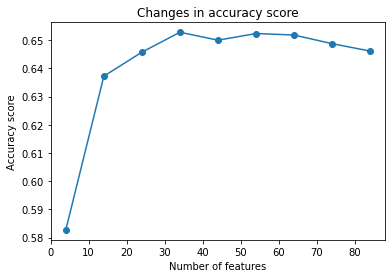

In [490]:
data = {
    84: 0.6461045332635573,
    74: 0.6487211356054163,
    64: 0.6517956433571008,
    54: 0.6523189638254726,
    44: 0.6499640217177994,
    34: 0.652776869235298,
    24: 0.6457120429122785,
    14: 0.6372080853012363,
    4: 0.5827173415320207
}

x_values = list(data.keys())
y_values = list(data.values())

plt.plot(x_values, y_values, marker='o')
plt.xlabel('Number of features')
plt.ylabel('Accuracy score')
plt.title('Changes in accuracy score')
plt.show()

In [483]:
X_train

movement_count_powerslide  movement_percent_supersonic_speed  \
94268                   0.193182                           0.509225   
1603                    0.201705                           0.273108   
74713                   0.161932                           0.216589   
96884                   0.167614                           0.353504   
70431                   0.196023                           0.341082   
...                          ...                                ...   
65457                   0.181818                           0.382678   
22220                   0.230114                           0.298478   
58698                   0.147727                           0.444322   
16072                   0.292614                           0.202255   
17808                   0.167614                           0.215134   

       movement_time_powerslide  movement_time_supersonic_speed  \
94268                  0.115938                        0.404970   
1603                   0.201195                        0.209245   
74713                  0.187619                        0.160210   
96884                  0.194407                        0.266879   
70431                  0.220201                        0.257246   
...                         ...                             ...   
65457                  0.229161                        0.281060   
22220                  0.325550                        0.244966   
58698                  0.150149                        0.319800   
16072                  0.242465                        0.189399   
17808                  0.140918                        0.175177   

       positioning_avg_distance_to_ball_possession  \
94268                                     0.236420   
1603                                      0.421914   
74713                                     0.262346   
96884                                     0.525926   
70431                                     0.470370   
...                                            ...   
65457                                     0.410494   
22220                                     0.484877   
58698                                     0.267901   
16072                                     0.507099   
17808                                     0.466975   

       movement_avg_powerslide_duration  boost_percent_full_boost  \
94268                          0.038462                  0.296527   
1603                           0.115385                  0.261181   
74713                          0.153846                  0.206115   
96884                          0.153846                  0.325829   
70431                          0.153846                  0.218482   
...                                 ...                       ...   
65457                          0.173077                  0.282003   
22220                          0.211538                  0.241029   
58698                          0.134615                  0.371421   
16072                          0.096154                  0.305537   
17808                          0.096154                  0.285547   

       boost_amount_used_while_supersonic  positioning_avg_distance_to_ball  \
94268                            0.221401                          0.231280   
1603                             0.157588                          0.423829   
74713                            0.142023                          0.284397   
96884                            0.210506                          0.359646   
70431                            0.136965                          0.496496   
...                                   ...                               ...   
65457                            0.105837                          0.420140   
22220                            0.063424                          0.362228   
58698                            0.177432                          0.254150   
16072                            0.067315                          0.425673   
17

In [58]:
#improve model with hyperparameter tuning using grid search


rf_classifier_bin = RandomForestClassifier()


param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(estimator=rf_classifier_bin, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.6520974295942308


In [69]:
# predict y with the new model with the best settings on the test data for model comparison
y_pred = grid_search.predict(X_test) 


metrics(y_test, y_pred) 

F1 score:  0.6499713627569593
Accuracy score:  0.650029436776346
Recall score:  0.650029436776346
Precision score:  0.6504010055583396


In [68]:

y_train

array(['young', 'old', 'old', ..., 'young', 'old', 'young'], dtype=object)

In [586]:
X_train

movement_count_powerslide  movement_percent_supersonic_speed  \
94268                   0.193182                           0.509225   
1603                    0.201705                           0.273108   
74713                   0.161932                           0.216589   
96884                   0.167614                           0.353504   
70431                   0.196023                           0.341082   
...                          ...                                ...   
65457                   0.181818                           0.382678   
22220                   0.230114                           0.298478   
58698                   0.147727                           0.444322   
16072                   0.292614                           0.202255   
17808                   0.167614                           0.215134   

       movement_time_powerslide  movement_time_supersonic_speed  \
94268                  0.115938                        0.404970   
1603                   0.201195                        0.209245   
74713                  0.187619                        0.160210   
96884                  0.194407                        0.266879   
70431                  0.220201                        0.257246   
...                         ...                             ...   
65457                  0.229161                        0.281060   
22220                  0.325550                        0.244966   
58698                  0.150149                        0.319800   
16072                  0.242465                        0.189399   
17808                  0.140918                        0.175177   

       positioning_avg_distance_to_ball_possession  \
94268                                     0.236420   
1603                                      0.421914   
74713                                     0.262346   
96884                                     0.525926   
70431                                     0.470370   
...                                            ...   
65457                                     0.410494   
22220                                     0.484877   
58698                                     0.267901   
16072                                     0.507099   
17808                                     0.466975   

       movement_avg_powerslide_duration  boost_percent_full_boost  \
94268                          0.038462                  0.296527   
1603                           0.115385                  0.261181   
74713                          0.153846                  0.206115   
96884                          0.153846                  0.325829   
70431                          0.153846                  0.218482   
...                                 ...                       ...   
65457                          0.173077                  0.282003   
22220                          0.211538                  0.241029   
58698                          0.134615                  0.371421   
16072                          0.096154                  0.305537   
17808                          0.096154                  0.285547   

       boost_amount_used_while_supersonic  positioning_avg_distance_to_ball  \
94268                            0.221401                          0.231280   
1603                             0.157588                          0.423829   
74713                            0.142023                          0.284397   
96884                            0.210506                          0.359646   
70431                            0.136965                          0.496496   
...                                   ...                               ...   
65457                            0.105837                          0.420140   
22220                            0.063424                          0.362228   
58698                            0.177432                          0.254150   
16072                            0.067315                          0.425673   
17

In [224]:
#run hyperparamter with more setting for longer loading time
y_train = np.ravel(y_train)
# Create a Random Forest classifier
rf_classifier_bin = RandomForestClassifier( n_jobs=-1)

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_classifier_bin, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

y_pred = grid_search.predict(X_val) 

metrics(y_val, y_pred) 

#0.6531693595865768 with 71 features
#0.6542814155818669 with 61 features

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best Score: 0.6565335691287529
F1 score:  0.6542707107669815
Accuracy score:  0.6542814155818669
Recall score:  0.6542814155818669
Precision score:  0.6544862811274808


In [585]:
params = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}


rf_classifier_bin = RandomForestClassifier(max_depth=params['max_depth'],
                                      min_samples_leaf=params['min_samples_leaf'],
                                      min_samples_split=params['min_samples_split'],
                                      n_estimators=params['n_estimators'] , n_jobs=-1,random_state = 42)

rf_classifier_bin.fit(X_train, y_train)

y_pred = rf_classifier_bin.predict(X_test) 

#check the score
metrics(y_test, y_pred) 

F1 score:  0.6581964232324392
Accuracy score:  0.6582063190946555
Recall score:  0.6582063190946555
Precision score:  0.6584096511233853


In [588]:
#0.6569634329822726 with 71 features
#0.66 with val data 61 feautres
#0.6601687708510499 61 features
rf_scores_bin = cross_val_score(rf_classifier_bin, x_bin2, pred_bin2, cv=10)  



print('\nMean Accuracy:', rf_scores_bin.mean())
print('Overall Standard Deviation:', np.std(rf_scores_bin))

C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa


Mean Accuracy: 0.3572291666666667
Overall Standard Deviation: 0.006550451903410092


In [589]:
print('\nMean Accuracy:', rf_scores_bin.mean())
print('Overall Standard Deviation:', np.std(rf_scores_bin))


Mean Accuracy: 0.6537186135235704
Overall Standard Deviation: 0.0133430330136231


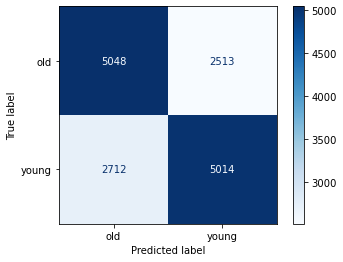

In [587]:
#confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.show()

In [ ]:
#KD RATIO
def calculate_KD(row):
    if row['demo_inflicted'] == 0:
        return -row['demo_taken']  # Returns the negative of demo_taken
    elif row['demo_taken'] == 0:
        return row['demo_inflicted'] / 1  # Returns demo_inflicted divided by 1
    else:
        return row['demo_inflicted'] / row['demo_taken']

final_featureengi['KD'] = final_featureengi.apply(calculate_KD, axis=1)
final_featureengi



In [86]:
final_region = final_featureengi.copy()

In [90]:
selected_regions = ['North America', 'Europe']

final_region = final_region[final_region['team_region'].isin(selected_regions)]

final_region

team_region   player_tag  core_shots  core_goals  core_saves  \
2124    North America       retals           6           2           3   
2125    North America      arsenal           4           2           1   
2126    North America      sypical           0           0           2   
2127    North America         oath           3           0           3   
2128    North America         fefe           4           0           0   
...               ...          ...         ...         ...         ...   
106790         Europe  m0nkey m00n           4           1           0   
106791         Europe       seikoo           3           0           2   
106792  North America       jknaps           2           0           3   
106793  North America      chicago           2           0           2   
106794  North America       atomic           1           0           0   

        core_assists  core_score  core_shooting_percentage  boost_bpm  \
2124               1         734                 33.333333      470.0   
2125               1         513                 50.000000      404.0   
2126               1         267                  0.000000      465.0   
2127               0         434                  0.000000      373.0   
2128               0         192                  0.000000      407.0   
...              ...         ...                       ...        ...   
106790             2         400                 25.000000      380.0   
106791             1         325                  0.000000      378.0   
106792             0         412                  0.000000      443.0   
106793             0         294                  0.000000      431.0   
106794             0          88                  0.000000      420.0   

        boost_bcpm  boost_avg_amount  boost_amount_collected  \
2124     471.03440             50.29                  2629.0   
2125     415.85043             49.20                  2321.0   
2126     495.58050             47.32                  2766.0   
2127     378.94170             42.60                  2115.0   
2128     405.27950             42.73                  2262.0   
...            ...               ...                     ...   
106790   388.65115             49.52                  2089.0   
106791   400.37210             54.93                  2152.0   
106792   448.18604             48.78                  2409.0   
106793   451.90698             50.05                  2429.0   
106794   443.16278             51.11                  2382.0   

        boost_amount_stolen  boost_amount_collected_big  \
2124                  670.0                      1886.0   
2125                  603.0                      1723.0   
2126                  738.0                      2041.0   
2127                  478.0                      1296.0   
2128                  521.0                      1400.0   
...                     ...                         ...   
106790                127.0                      1085.0   
106791                288.0                      1423.0   
106792                825.0                      1630.0   
106793                589.0                      1873.0   
106794                667.0                      1803.0   

        boost_amount_stolen_big  boost_amount_collected_small  \
2124                      396.0                         743.0   
2125                      400.0                         598.0   
2126                      577.0                         725.0   
2127                      160.0                         819.0   
2128                      272.0                         862.0   
...                         ...                           ...   
106790                      0.0                        1004.0   
106791                    157.0                         729.0   
106792                    568.0                         779.0   
106793                    354.0                         556.0   
106794                    395.0                    

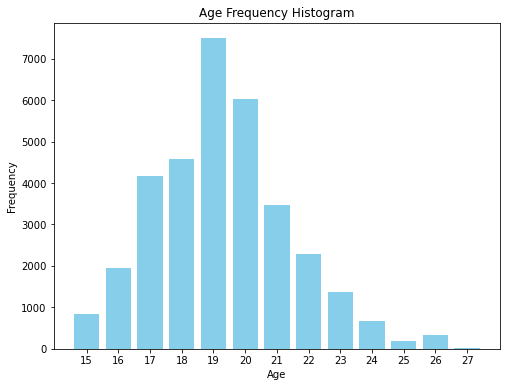

In [91]:
age_frequency = final_region['Age'].value_counts().reset_index()


age_frequency.columns = ['Age', 'Frequency']


age_frequency = age_frequency.sort_values(by='Frequency')

plt.figure(figsize=(8, 6))
plt.bar(age_frequency['Age'], age_frequency['Frequency'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Frequency Histogram')
plt.xticks(age_frequency['Age'])
plt.show()

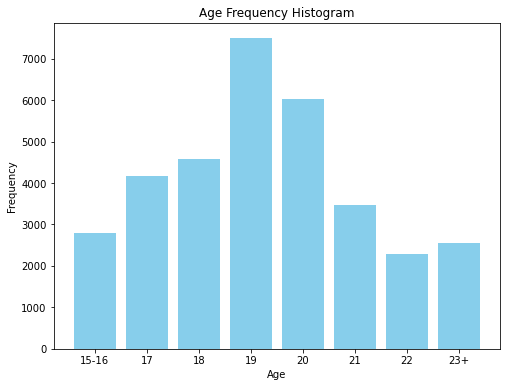

In [96]:
#balance the data
final_region2 = final_region.copy()

final_region2['Age_Group'] = final_region2['Age'].apply(lambda x: '15-16' if 15 <= x <= 16 else '23+' if x >= 23 else str(x))




age_frequency = final_region2['Age_Group'].value_counts().reset_index()


age_frequency.columns = ['Age_Group', 'Frequency']


age_frequency = age_frequency.sort_values(by='Age_Group')

plt.figure(figsize=(8, 6))
plt.bar(age_frequency['Age_Group'], age_frequency['Frequency'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Frequency Histogram')
plt.xticks(age_frequency['Age_Group'])
plt.show()

C:\Users\brams\AppData\Local\Temp\ipykernel_3700\3830829970.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bal_region = bal_region.append(group_data)
C:\Users\brams\AppData\Local\Temp\ipykernel_3700\3830829970.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bal_region = bal_region.append(group_data)
C:\Users\brams\AppData\Local\Temp\ipykernel_3700\3830829970.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bal_region = bal_region.append(group_data)
C:\Users\brams\AppData\Local\Temp\ipykernel_3700\3830829970.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bal_region = bal_region.append(group_data)
C:\Users\brams\AppDa

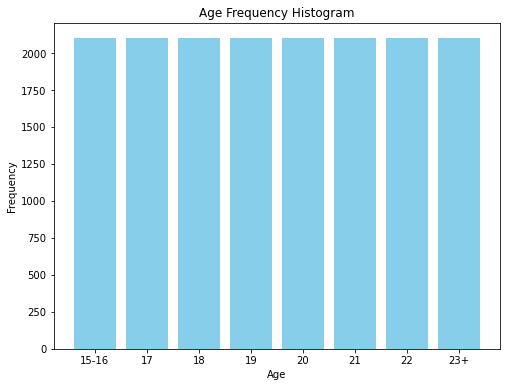

In [100]:
group_counts = final_region2['Age_Group'].value_counts()


target_count = 2100

bal_region = pd.DataFrame() 


for group in group_counts.index:
    
    group_data = final_region2[final_region2['Age_Group'] == group]
    
    
    if len(group_data) > target_count:
        group_data = group_data.sample(n=target_count, random_state=1)  
    
    
    bal_region = bal_region.append(group_data)


bal_region = bal_region.reset_index(drop=True)



age_frequency = bal_region['Age_Group'].value_counts().reset_index()


age_frequency.columns = ['Age_Group', 'Frequency']


age_frequency = age_frequency.sort_values(by='Age_Group')

plt.figure(figsize=(8, 6))
plt.bar(age_frequency['Age_Group'], age_frequency['Frequency'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Frequency Histogram')
plt.xticks(age_frequency['Age_Group'])
plt.show()

In [602]:
cols_to_normalize = bal_region.columns[2:87]

scaler = MinMaxScaler()

bal_region[cols_to_normalize] = scaler.fit_transform(bal_region[cols_to_normalize])

bal_region

team_region   player_tag  core_shots  core_goals  core_saves  \
0             Europe     virtuoso    0.285714    0.166667       0.250   
1      North America         tool    0.071429    0.000000       0.500   
2             Europe  m0nkey m00n    0.357143    0.000000       0.125   
3      North America         shad    0.142857    0.166667       0.000   
4      North America       taroco    0.214286    0.166667       0.250   
...              ...          ...         ...         ...         ...   
16795         Europe        deevo    0.214286    0.166667       0.000   
16796         Europe       yukiss    0.214286    0.000000       0.000   
16797         Europe        yukeo    0.142857    0.166667       0.125   
16798  North America      gimmick    0.357143    0.166667       0.250   
16799         Europe      tigreee    0.142857    0.000000       0.125   

       core_assists  core_score  core_shooting_percentage  boost_bpm  \
0               0.2    0.429288                  0.083333   0.522613   
1               0.0    0.375125                  0.000000   0.554439   
2               0.0    0.228686                  0.000000   0.631491   
3               0.4    0.318957                  0.166667   0.737018   
4               0.0    0.435306                  0.111111   0.512563   
...             ...         ...                       ...        ...   
16795           0.4    0.389168                  0.111111   0.686767   
16796           0.0    0.184554                  0.000000   0.546064   
16797           0.2    0.322969                  0.166667   0.569514   
16798           0.2    0.482447                  0.066667   0.541039   
16799           0.4    0.260782                  0.000000   0.631491   

       boost_bcpm  boost_avg_amount  boost_amount_collected  \
0        0.514894          0.566420                0.221153   
1        0.559857          0.474085                0.255132   
2        0.625582          0.725392                0.259654   
3        0.690231          0.478005                0.287835   
4        0.494536          0.400915                0.222660   
...           ...               ...                     ...   
16795    0.636112          0.648955                0.283196   
16796    0.502385          0.525044                0.210831   
16797    0.561886          0.614111                0.243999   
16798    0.530877          0.389373                0.285747   
16799    0.603643          0.470601                0.281573   

       boost_amount_stolen  boost_amount_collected_big  \
0                 0.210422                    0.213254   
1                 0.096328                    0.244912   
2                 0.158705                    0.297443   
3                 0.380576                    0.307184   
4                 0.099882                    0.213776   
...                    ...                         ...   
16795             0.142124                    0.320230   
16796             0.184366                    0.246652   
16797             0.151994                    0.277961   
16798             0.225030                    0.274135   
16799             0.253060                    0.280049   

       boost_amount_stolen_big  boost_amount_collected_small  \
0                     0.150871                      0.236952   
1                     0.093682                      0.275574   
2                     0.120370                      0.184064   
3                     0.411220                      0.249130   
4                     0.054466                      0.240431   
...                        ...                           ...   
16795                 0.086057                      0.209116   
16796                 0.185185                      0.139179   
16797                 0.173203                      0.176061   
16798                 0.212418                      0.308977   
16799                 0.206427                      0.284621   

       boost_amount_stolen_small  boost_coun

In [ ]:
#machine learning

In [603]:
pred = bal_region[["Age_Group"]]
x = bal_region.drop(['Age','team_region','player_tag','platform_id','car_name','DOB','advanced_rating','Z_Scores','Age_Group'], axis=1)
z = bal_region.iloc[:,2:13]
x

# Slit the data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(x, pred, test_size=0.2, random_state=123)

#further split the training set into a validation set

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

x

core_shots  core_goals  core_saves  core_assists  core_score  \
0        0.285714    0.166667       0.250           0.2    0.429288   
1        0.071429    0.000000       0.500           0.0    0.375125   
2        0.357143    0.000000       0.125           0.0    0.228686   
3        0.142857    0.166667       0.000           0.4    0.318957   
4        0.214286    0.166667       0.250           0.0    0.435306   
...           ...         ...         ...           ...         ...   
16795    0.214286    0.166667       0.000           0.4    0.389168   
16796    0.214286    0.000000       0.000           0.0    0.184554   
16797    0.142857    0.166667       0.125           0.2    0.322969   
16798    0.357143    0.166667       0.250           0.2    0.482447   
16799    0.142857    0.000000       0.125           0.4    0.260782   

       core_shooting_percentage  boost_bpm  boost_bcpm  boost_avg_amount  \
0                      0.083333   0.522613    0.514894          0.566420   
1                      0.000000   0.554439    0.559857          0.474085   
2                      0.000000   0.631491    0.625582          0.725392   
3                      0.166667   0.737018    0.690231          0.478005   
4                      0.111111   0.512563    0.494536          0.400915   
...                         ...        ...         ...               ...   
16795                  0.111111   0.686767    0.636112          0.648955   
16796                  0.000000   0.546064    0.502385          0.525044   
16797                  0.166667   0.569514    0.561886          0.614111   
16798                  0.066667   0.541039    0.530877          0.389373   
16799                  0.000000   0.631491    0.603643          0.470601   

       boost_amount_collected  boost_amount_stolen  \
0                    0.221153             0.210422   
1                    0.255132             0.096328   
2                    0.259654             0.158705   
3                    0.287835             0.380576   
4                    0.222660             0.099882   
...                       ...                  ...   
16795                0.283196             0.142124   
16796                0.210831             0.184366   
16797                0.243999             0.151994   
16798                0.285747             0.225030   
16799                0.281573             0.253060   

       boost_amount_collected_big  boost_amount_stolen_big  \
0                        0.213254                 0.150871   
1                        0.244912                 0.093682   
2                        0.297443                 0.120370   
3                        0.307184                 0.411220   
4                        0.213776                 0.054466   
...                           ...                      ...   
16795                    0.320230                 0.086057   
16796                    0.246652                 0.185185   
16797                    0.277961                 0.173203   
16798                    0.274135                 0.212418   
16799                    0.280049                 0.206427   

       boost_amount_collected_small  boost_amount_stolen_small  \
0                          0.236952                   0.226950   
1                          0.275574                   0.063830   
2                          0.184064                   0.160461   
3                          0.249130                   0.185284   
4                          0.240431                   0.135638   
...                             ...                        ...   
16795                      0.209116                   0.179078   
16796                      0.139179                   0.112589   
16797                      0.176061                   0.059397   
16798                      0.308977                   0.159574   
16799                      0.284621                   0.232270   

       boost_count_collected_big  boost_count_stolen_b

In [604]:
y_train = np.ravel(y_train

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42,n_jobs=-1)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

metrics(y_test, y_pred)

#0.3806547619047619

F1 score:  0.3711270751534358
Accuracy score:  0.3782738095238095
Recall score:  0.3782738095238095
Precision score:  0.37185292880158305


In [219]:
rf_scores = cross_val_score(rf_classifier, x, pred, cv=5)  

print('Cross-Validation Scores:', rf_scores)
print('Mean Accuracy:', rf_scores.mean())




C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

Cross-Validation Scores: [0.38541667 0.40267857 0.39434524 0.38988095 0.38720238]
Mean Accuracy: 0.3919047619047619


In [ ]:
#improve with feature importance

In [143]:
# Retrieve feature importances
feature_importance = pd.Series(rf_classifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)
pd.set_option('display.max_rows', None)
print(feature_importance)

movement_count_powerslide                         0.030287
movement_time_powerslide                          0.023810
movement_avg_powerslide_duration                  0.020585
movement_percent_supersonic_speed                 0.017723
boost_percent_full_boost                          0.017328
movement_percent_low_air                          0.016415
movement_percent_ground                           0.016248
boost_time_full_boost                             0.015930
positioning_avg_distance_to_mates                 0.015834
boost_amount_used_while_supersonic                0.015316
positioning_avg_distance_to_ball_possession       0.015273
movement_time_supersonic_speed                    0.015249
boost_percent_zero_boost                          0.014680
movement_percent_boost_speed                      0.014614
boost_amount_overfill                             0.014531
positioning_avg_distance_to_ball                  0.014400
boost_avg_amount                                  0.0143

In [605]:
pd.reset_option('display.max_rows')

pred = bal_region[["Age_Group"]]
selected_columns = [
    'movement_count_powerslide',
    'movement_time_powerslide',
    'movement_avg_powerslide_duration',
    'movement_percent_supersonic_speed',
    'boost_percent_full_boost',
    'movement_percent_low_air',
    'movement_percent_ground',
    'boost_time_full_boost',
    'positioning_avg_distance_to_mates',
    'boost_amount_used_while_supersonic',
    'positioning_avg_distance_to_ball_possession',
    'movement_time_supersonic_speed',
    'boost_percent_zero_boost',
    'movement_percent_boost_speed',
    'boost_amount_overfill',
    'positioning_avg_distance_to_ball',
    'boost_avg_amount',
    'boost_bpm',
    'boost_time_zero_boost',
    'positioning_percent_closest_to_ball',
    'boost_percent_boost_75_100',
    'positioning_percent_farthest_from_ball',
    'boost_bcpm',
    'movement_percent_high_air',
    'positioning_percent_most_forward',
    'positioning_percent_most_back',
    'movement_time_ground',
    'boost_amount_collected_small',
    'movement_percent_slow_speed',
    'movement_avg_speed_percentage',
    'positioning_avg_distance_to_ball_no_possession',
    'boost_percent_boost_25_50',
    'movement_time_high_air',
    'movement_avg_speed',
    'positioning_time_most_forward',
    'boost_percent_boost_0_25',
    'boost_time_boost_75_100',
    'positioning_time_farthest_from_ball',
    'core_score',
    'boost_percent_boost_50_75',
    'movement_time_low_air',
    'positioning_percent_neutral_third',
    'boost_count_collected_small',
    'movement_time_boost_speed'
]

x = bal_region[selected_columns]
#x_2 = final_bal.drop(['Age','team_region','player_tag','platform_id','car_name','DOB','advanced_rating','Z_Scores','Age_Group'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, pred, test_size=0.2, random_state=123)

#further split the training set into a validation set

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)
x

movement_count_powerslide  movement_time_powerslide  \
0                       0.112717                  0.084845   
1                       0.173410                  0.156015   
2                       0.089595                  0.089032   
3                       0.182081                  0.181970   
4                       0.101156                  0.114708   
...                          ...                       ...   
16795                   0.219653                  0.207647   
16796                   0.078035                  0.084287   
16797                   0.156069                  0.200112   
16798                   0.346821                  0.341055   
16799                   0.424855                  0.459950   

       movement_avg_powerslide_duration  movement_percent_supersonic_speed  \
0                              0.078431                           0.181063   
1                              0.098039                           0.162833   
2                              0.117647                           0.266987   
3                              0.117647                           0.437866   
4                              0.137255                           0.246238   
...                                 ...                                ...   
16795                          0.098039                           0.366215   
16796                          0.137255                           0.280799   
16797                          0.176471                           0.177050   
16798                          0.117647                           0.250412   
16799                          0.117647                           0.215273   

       boost_percent_full_boost  movement_percent_low_air  \
0                      0.378047                  0.489568   
1                      0.293743                  0.460722   
2                      0.333305                  0.428452   
3                      0.275211                  0.544082   
4                      0.350446                  0.346957   
...                         ...                       ...   
16795                  0.361282                  0.594463   
16796                  0.328278                  0.606287   
16797                  0.374202                  0.315526   
16798                  0.218280                  0.626891   
16799                  0.313934                  0.540825   

       movement_percent_ground  boost_time_full_boost  \
0                     0.474705               0.171308   
1                     0.520647               0.141085   
2                     0.452939               0.146027   
3                     0.417522               0.121127   
4                     0.511358               0.166318   
...                        ...                    ...   
16795                 0.396428               0.169597   
16796                 0.280327               0.145410   
16797                 0.583213               0.171403   
16798                 0.373819               0.123503   
16799                 0.414904               0.154296   

       positioning_avg_distance_to_mates  boost_amount_used_while_supersonic  \
0                               0.449687                            0.094647   
1                               0.395282                            0.113919   
2                               0.388541                            0.126767   
3                               0.654309                            0.165310   
4                               0.331728                            0.148180   
...                                  ...                                 ...   
16795                           0.569571                            0.111349   
16796                           0.444872                            0.074946   
16797                           0.573423                            0.087366   
16798                           0.413096                            0.090792   
16799                      

In [167]:
y_train = np.ravel(y_train)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42,n_jobs=-1)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

metrics(y_test, y_pred)
#0.3782738095238095 with 84
#0.37547386296616525 with 74
#0.38125 with 64
#0.38839285714285715 with 54
#0.3985119047619048 with 44
#0.3970238095238095 with 34
#0.3794642857142857 with 24
#0.3738095238095238 with 14
#0.22291666666666668 with 4


F1 score:  0.3934240697327893
Accuracy score:  0.3985119047619048
Recall score:  0.3985119047619048
Precision score:  0.3932485974219912


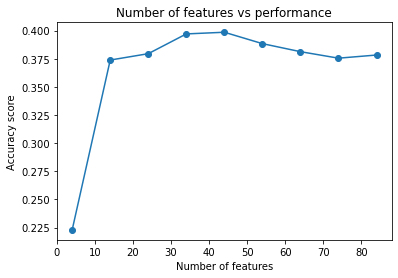

In [504]:

data = {
    84: 0.3782738095238095,
    74: 0.37547386296616525,
    64: 0.38125,
    54: 0.38839285714285715,
    44: 0.3985119047619048,
    34: 0.3970238095238095,
    24: 0.3794642857142857,
    14: 0.3738095238095238,
    4: 0.22291666666666668
}

x_values = list(data.keys())
y_values = list(data.values())

plt.plot(x_values, y_values, marker='o')
plt.xlabel('Number of features')
plt.ylabel('Accuracy score')
plt.title('Number of features vs performance')
plt.show()

In [168]:
rf_scores = cross_val_score(rf_classifier, x, pred, cv=10)  

print('Cross-Validation Scores:', rf_scores)
print('Mean Accuracy:', rf_scores.mean())

C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

Cross-Validation Scores: [0.40654762 0.39345238 0.43095238 0.42321429 0.4125     0.4125
 0.41547619 0.41071429 0.40416667 0.43035714]
Mean Accuracy: 0.41398809523809527


In [606]:
#improve with hyperparameter tuning
params = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}
y_train = np.ravel(y_train)
rf_classifier = RandomForestClassifier(max_depth=params['max_depth'],
                                      min_samples_leaf=params['min_samples_leaf'],
                                      min_samples_split=params['min_samples_split'],
                                      n_estimators=params['n_estimators'] , n_jobs=-1,random_state=42)

rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test) 

metrics(y_test, y_pred) 

F1 score:  0.4208312767602787
Accuracy score:  0.4261904761904762
Recall score:  0.4261904761904762
Precision score:  0.4224538541487676


In [170]:
rf_scores = cross_val_score(rf_classifier, x, pred, cv=10)
print('Cross-Validation Scores:', rf_scores)
print('Mean Accuracy:', rf_scores.mean())





C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

Cross-Validation Scores: [0.43928571 0.4172619  0.44702381 0.44761905 0.42380952 0.42857143
 0.4375     0.43690476 0.42261905 0.43511905]
Mean Accuracy: 0.43357142857142855


In [607]:
rf_scores = cross_val_score(rf_classifier, x, pred, cv=10)
print('Cross-Validation Scores:', rf_scores)
print('Mean Accuracy:', rf_scores.mean())
print('Standard Deviation:', np.std(rf_scores))

C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

Cross-Validation Scores: [0.43988095 0.41547619 0.44464286 0.44821429 0.42321429 0.43035714
 0.43690476 0.43511905 0.42559524 0.43928571]
Mean Accuracy: 0.4338690476190476
Standard Deviation: 0.009647448936120708


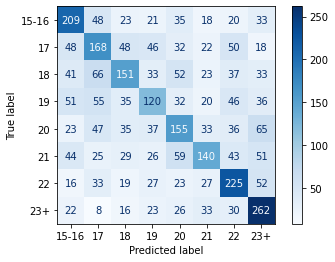

In [171]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.show()

In [172]:
frequency_table = y_test['Age_Group'].value_counts()
print(frequency_table)

18       436
17       432
20       431
22       422
23+      420
21       417
15-16    407
19       395
Name: Age_Group, dtype: int64


In [ ]:
#naive bayes

In [608]:
#reset data

pred = bal_region[["Age_Group"]]
x = bal_region.drop(['Age','team_region','player_tag','platform_id','car_name','DOB','advanced_rating','Z_Scores','Age_Group'], axis=1)
z = bal_region.iloc[:,2:13]
x
# Slit the data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(x, pred, test_size=0.2, random_state=123)

#further split the training set into a validation set

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

X_train

core_shots  core_goals  core_saves  core_assists  core_score  \
4862     0.500000    0.000000       0.625           0.2    0.762287   
15478    0.142857    0.000000       0.000           0.0    0.138415   
12060    0.357143    0.000000       0.375           0.4    0.571715   
8472     0.142857    0.000000       0.125           0.0    0.300903   
2464     0.214286    0.166667       0.125           0.0    0.312939   
...           ...         ...         ...           ...         ...   
13710    0.571429    0.333333       0.500           0.2    0.783350   
9099     0.214286    0.166667       0.000           0.2    0.282849   
5909     0.214286    0.166667       0.000           0.0    0.290873   
8740     0.285714    0.166667       0.375           0.0    0.462387   
12192    0.285714    0.000000       0.250           0.0    0.292879   

       core_shooting_percentage  boost_bpm  boost_bcpm  boost_avg_amount  \
4862                   0.000000   0.636516    0.621233          0.741071   
15478                  0.000000   0.559464    0.574363          0.667901   
12060                  0.000000   0.676717    0.644924          0.682709   
8472                   0.000000   0.596315    0.597912          0.710366   
2464                   0.111111   0.643216    0.594929          0.647866   
...                         ...        ...         ...               ...   
13710                  0.083333   0.675042    0.647836          0.569251   
9099                   0.111111   0.582915    0.567836          0.600392   
5909                   0.111111   0.633166    0.602096          0.838850   
8740                   0.083333   0.564489    0.544254          0.544643   
12192                  0.000000   0.671692    0.650953          0.699695   

       boost_amount_collected  boost_amount_stolen  \
4862                 0.633190             0.576392   
15478                0.303375             0.159100   
12060                0.385597             0.200553   
8472                 0.399049             0.497829   
2464                 0.325873             0.202132   
...                       ...                  ...   
13710                0.471878             0.385314   
9099                 0.249565             0.095539   
5909                 0.262902             0.197000   
8740                 0.230082             0.108962   
12192                0.275310             0.219503   

       boost_amount_collected_big  boost_amount_stolen_big  \
4862                     0.676465                 0.503813   
15478                    0.353453                 0.141068   
12060                    0.417464                 0.166122   
8472                     0.405636                 0.420479   
2464                     0.345451                 0.154139   
...                           ...                      ...   
13710                    0.523047                 0.354031   
9099                     0.265437                 0.054466   
5909                     0.289268                 0.144336   
8740                     0.246478                 0.054466   
12192                    0.299530                 0.156863   

       boost_amount_collected_small  boost_amount_stolen_small  \
4862                       0.546625                   0.474291   
15478                      0.203201                   0.127660   
12060                      0.321851                   0.179965   
8472                       0.385873                   0.433511   
2464                       0.286708                   0.203014   
...                             ...                        ...   
13710                      0.369520                   0.289007   
9099                       0.217815                   0.125887   
5909                       0.210160                   0.207447   
8740                       0.197286                   0.156028   
12192                      0.226862                   0.237589   

       boost_count_collected_big  boost_count_stolen_b

In [177]:
#naive base
y_train = np.ravel(y_train)
gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
metrics(y_test, y_pred)

F1 score:  0.2021517910265055
Accuracy score:  0.23422619047619048
Recall score:  0.23422619047619048
Precision score:  0.2287437145760441


In [179]:
nb_scores = cross_val_score(gnb, x, pred, cv=10) 
print('Cross-Validation Scores:', nb_scores)
print('Mean Accuracy:', nb_scores.mean())

C:\Users\brams\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Cross-Validation Scores: [0.23095238 0.21071429 0.22559524 0.23630952 0.22916667 0.24464286
 0.23214286 0.24464286 0.2202381  0.22738095]
Mean Accuracy: 0.23017857142857143


In [185]:
pd.reset_option('display.max_rows')

pred = bal_region[["Age_Group"]]
selected_columns = [
    'movement_count_powerslide',
    'movement_time_powerslide',
    'movement_avg_powerslide_duration',
    'movement_percent_supersonic_speed',
    'boost_percent_full_boost',
    'movement_percent_low_air',
    'movement_percent_ground',
    'boost_time_full_boost',
    'positioning_avg_distance_to_mates',
    'boost_amount_used_while_supersonic',
    'positioning_avg_distance_to_ball_possession',
    'movement_time_supersonic_speed',
    'boost_percent_zero_boost',
    'movement_percent_boost_speed',
    'boost_amount_overfill',
    'positioning_avg_distance_to_ball',
    'boost_avg_amount',
    'boost_bpm',
    'boost_time_zero_boost',
    'positioning_percent_closest_to_ball',
    'boost_percent_boost_75_100',
    'positioning_percent_farthest_from_ball',
    'boost_bcpm',
    'movement_percent_high_air',
    'positioning_percent_most_forward',
    'positioning_percent_most_back',
    'movement_time_ground',
    'boost_amount_collected_small',
    'movement_percent_slow_speed',
    'movement_avg_speed_percentage',
    'positioning_avg_distance_to_ball_no_possession',
    'boost_percent_boost_25_50',
    'movement_time_high_air',
    'movement_avg_speed',
    'positioning_time_most_forward',
    'boost_percent_boost_0_25',
    'boost_time_boost_75_100',
    'positioning_time_farthest_from_ball',
    'core_score',
    'boost_percent_boost_50_75',
    'movement_time_low_air',
    'positioning_percent_neutral_third',
    'boost_count_collected_small',
    'movement_time_boost_speed'
]

x = bal_region[selected_columns]
#x_2 = final_bal.drop(['Age','team_region','player_tag','platform_id','car_name','DOB','advanced_rating','Z_Scores','Age_Group'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, pred, test_size=0.2, random_state=123)

#further split the training set into a validation set

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)
x

movement_count_powerslide  movement_time_powerslide  \
0                           46.0                      4.18   
1                           67.0                      6.73   
2                           38.0                      4.33   
3                           70.0                      7.66   
4                           42.0                      5.25   
...                          ...                       ...   
16795                       83.0                      8.58   
16796                       34.0                      4.16   
16797                       61.0                      8.31   
16798                      127.0                     13.36   
16799                      154.0                     17.62   

       movement_avg_powerslide_duration  movement_percent_supersonic_speed  \
0                                  0.09                           9.641922   
1                                  0.10                           8.671159   
2                                  0.11                          14.217525   
3                                  0.11                          23.317194   
4                                  0.12                          13.112609   
...                                 ...                                ...   
16795                              0.10                          19.501625   
16796                              0.12                          14.953071   
16797                              0.14                           9.428238   
16798                              0.11                          13.334923   
16799                              0.11                          11.463673   

       boost_percent_full_boost  movement_percent_low_air  \
0                     11.002930                 35.837498   
1                      8.549297                 34.893550   
2                      9.700739                 33.837520   
3                      8.009930                 37.621445   
4                     10.199621                 31.170639   
...                         ...                       ...   
16795                 10.514995                 39.270138   
16796                  9.554439                 39.657070   
16797                 10.891029                 30.142060   
16798                  6.352970                 40.331350   
16799                  9.136956                 37.514866   

       movement_percent_ground  boost_time_full_boost  \
0                    59.442660                  36.05   
1                    61.215590                  29.69   
2                    58.602734                  30.73   
3                    57.235990                  25.49   
4                    60.857098                  35.00   
...                        ...                    ...   
16795                56.421950                  35.69   
16796                51.941597                  30.60   
16797                63.629993                  36.07   
16798                55.549465                  25.99   
16799                57.134933                  32.47   

       positioning_avg_distance_to_mates  boost_amount_used_while_supersonic  \
0                                 3683.0                               221.0   
1                                 3570.0                               266.0   
2                                 3556.0                               296.0   
3                                 4108.0                               386.0   
4                                 3438.0                               346.0   
...                                  ...                                 ...   
16795                             3932.0                               260.0   
16796                             3673.0                               175.0   
16797                             3940.0                               204.0   
16798                             3607.0                               212.0   
16799                      

In [184]:

y_train = np.ravel(y_train) 
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
metrics(y_test, y_pred)

F1 score:  0.2408352613593491
Accuracy score:  0.2675595238095238
Recall score:  0.2675595238095238
Precision score:  0.258982722292611


In [189]:
nb_scores = cross_val_score(gnb, x, pred, cv=10)  

print('Cross-Validation Scores:', nb_scores)
print('Mean Accuracy:', nb_scores.mean())

C:\Users\brams\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Cross-Validation Scores: [0.26488095 0.25654762 0.25178571 0.2577381  0.2702381  0.27380952
 0.2672619  0.2827381  0.2547619  0.27142857]
Mean Accuracy: 0.2651190476190476


C:\Users\brams\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

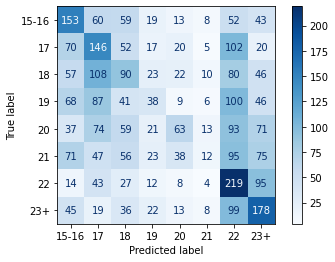

In [196]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.show()

In [ ]:
#improve with parameter tuning



In [191]:

gnb = GaussianNB()
y_train = np.ravel(y_train) 

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],  
    'priors': [None, [0.25, 0.25, 0.5], [0.2, 0.3, 0.5]] 

}

param_grid = {'var_smoothing': np.logspace(0,-9, num=100)
             }


grid_search = GridSearchCV(gnb, param_grid, cv=5)
grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)
metrics(y_test, y_pred)

F1 score:  0.2408352613593491
Accuracy score:  0.2675595238095238
Recall score:  0.2675595238095238
Precision score:  0.258982722292611


In [194]:
y_train = np.ravel(y_train) 
nb_scores = cross_val_score(grid_search, x, pred, cv=10)  

print('Cross-Validation Scores:', nb_scores)
print('Mean Accuracy:', nb_scores.mean())

C:\Users\brams\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Cross-Validation Scores: [0.26488095 0.25654762 0.25178571 0.2577381  0.2702381  0.27380952
 0.2672619  0.27857143 0.2547619  0.27142857]
Mean Accuracy: 0.26470238095238097


C:\Users\brams\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [195]:
#reset data

pred = bal_region[["Age_Group"]]
x = bal_region.drop(['Age','team_region','player_tag','platform_id','car_name','DOB','advanced_rating','Z_Scores','Age_Group'], axis=1)
z = bal_region.iloc[:,2:13]
x
# Slit the data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(x, pred, test_size=0.2, random_state=123)

#further split the training set into a validation set

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

X_train

core_shots  core_goals  core_saves  core_assists  core_score  \
4862            7           0           5             1         760   
15478           2           0           0             0         138   
12060           5           0           3             2         570   
8472            2           0           1             0         300   
2464            3           1           1             0         312   
...           ...         ...         ...           ...         ...   
13710           8           2           4             1         781   
9099            3           1           0             1         282   
5909            3           1           0             0         290   
8740            4           1           3             0         461   
12192           4           0           2             0         292   

       core_shooting_percentage  boost_bpm  boost_bcpm  boost_avg_amount  \
4862                   0.000000      419.0   427.94852             54.71   
15478                  0.000000      373.0   396.15594             51.35   
12060                  0.000000      443.0   444.01874             52.03   
8472                   0.000000      395.0   412.12958             53.30   
2464                  33.333333      423.0   410.10614             50.43   
...                         ...        ...         ...               ...   
13710                 25.000000      442.0   445.99365             46.82   
9099                  33.333333      387.0   391.72858             48.25   
5909                  33.333333      417.0   414.96744             59.20   
8740                  25.000000      376.0   375.73240             45.69   
12192                  0.000000      440.0   448.10810             52.81   

       boost_amount_collected  boost_amount_stolen  \
4862                   5496.0               1460.0   
15478                  2652.0                403.0   
12060                  3361.0                508.0   
8472                   3477.0               1261.0   
2464                   2846.0                512.0   
...                       ...                  ...   
13710                  4105.0                976.0   
9099                   2188.0                242.0   
5909                   2303.0                499.0   
8740                   2020.0                276.0   
12192                  2410.0                556.0   

       boost_amount_collected_big  boost_amount_stolen_big  \
4862                       3889.0                    925.0   
15478                      2032.0                    259.0   
12060                      2400.0                    305.0   
8472                       2332.0                    772.0   
2464                       1986.0                    283.0   
...                           ...                      ...   
13710                      3007.0                    650.0   
9099                       1526.0                    100.0   
5909                       1663.0                    265.0   
8740                       1417.0                    100.0   
12192                      1722.0                    288.0   

       boost_amount_collected_small  boost_amount_stolen_small  \
4862                         1607.0                      535.0   
15478                         620.0                      144.0   
12060                         961.0                      203.0   
8472                         1145.0                      489.0   
2464                          860.0                      229.0   
...                             ...                        ...   
13710                        1098.0                      326.0   
9099                          662.0                      142.0   
5909                          640.0                      234.0   
8740                          603.0                      176.0   
12192                         688.0                      268.0   

       boost_count_collected_big  boost_count_stolen_b

In [ ]:
#logistic regression


In [204]:

y_train = np.ravel(y_train)

log_reg = LogisticRegression(n_jobs=-1)

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
metrics(y_test, y_pred)

F1 score:  0.1611719413748986
Accuracy score:  0.18720238095238095
Recall score:  0.18720238095238095
Precision score:  0.19196701938183616


In [199]:
y_train = np.ravel(y_train) 
lr_scores = cross_val_score(log_reg, x, pred, cv=10) 

print('Cross-Validation Scores:', lr_scores)
print('Mean Accuracy:', lr_scores.mean())

C:\Users\brams\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Cross-Validation Scores: [0.21904762 0.1922619  0.19880952 0.19047619 0.19285714 0.20714286
 0.19940476 0.21428571 0.18452381 0.20238095]
Mean Accuracy: 0.2001190476190476


In [207]:
pd.reset_option('display.max_rows')

pred = bal_region[["Age_Group"]]
selected_columns = [
    'movement_count_powerslide',
    'movement_time_powerslide',
    'movement_avg_powerslide_duration',
    'movement_percent_supersonic_speed',
    'boost_percent_full_boost',
    'movement_percent_low_air',
    'movement_percent_ground',
    'boost_time_full_boost',
    'positioning_avg_distance_to_mates',
    'boost_amount_used_while_supersonic',
    'positioning_avg_distance_to_ball_possession',
    'movement_time_supersonic_speed',
    'boost_percent_zero_boost',
    'movement_percent_boost_speed',
    'boost_amount_overfill',
    'positioning_avg_distance_to_ball',
    'boost_avg_amount',
    'boost_bpm',
    'boost_time_zero_boost',
    'positioning_percent_closest_to_ball',
    'boost_percent_boost_75_100',
    'positioning_percent_farthest_from_ball',
    'boost_bcpm',
    'movement_percent_high_air',
    'positioning_percent_most_forward',
    'positioning_percent_most_back',
    'movement_time_ground',
    'boost_amount_collected_small',
    'movement_percent_slow_speed',
    'movement_avg_speed_percentage',
    'positioning_avg_distance_to_ball_no_possession',
    'boost_percent_boost_25_50',
    'movement_time_high_air',
    'movement_avg_speed',
    'positioning_time_most_forward',
    'boost_percent_boost_0_25',
    'boost_time_boost_75_100',
    'positioning_time_farthest_from_ball',
    'core_score',
    'boost_percent_boost_50_75',
    'movement_time_low_air',
    'positioning_percent_neutral_third',
    'boost_count_collected_small',
    'movement_time_boost_speed'
]

x = bal_region[selected_columns]
#x_2 = final_bal.drop(['Age','team_region','player_tag','platform_id','car_name','DOB','advanced_rating','Z_Scores','Age_Group'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, pred, test_size=0.2, random_state=123)

#further split the training set into a validation set

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)
x

movement_count_powerslide  movement_time_powerslide  \
0                           46.0                      4.18   
1                           67.0                      6.73   
2                           38.0                      4.33   
3                           70.0                      7.66   
4                           42.0                      5.25   
...                          ...                       ...   
16795                       83.0                      8.58   
16796                       34.0                      4.16   
16797                       61.0                      8.31   
16798                      127.0                     13.36   
16799                      154.0                     17.62   

       movement_avg_powerslide_duration  movement_percent_supersonic_speed  \
0                                  0.09                           9.641922   
1                                  0.10                           8.671159   
2                                  0.11                          14.217525   
3                                  0.11                          23.317194   
4                                  0.12                          13.112609   
...                                 ...                                ...   
16795                              0.10                          19.501625   
16796                              0.12                          14.953071   
16797                              0.14                           9.428238   
16798                              0.11                          13.334923   
16799                              0.11                          11.463673   

       boost_percent_full_boost  movement_percent_low_air  \
0                     11.002930                 35.837498   
1                      8.549297                 34.893550   
2                      9.700739                 33.837520   
3                      8.009930                 37.621445   
4                     10.199621                 31.170639   
...                         ...                       ...   
16795                 10.514995                 39.270138   
16796                  9.554439                 39.657070   
16797                 10.891029                 30.142060   
16798                  6.352970                 40.331350   
16799                  9.136956                 37.514866   

       movement_percent_ground  boost_time_full_boost  \
0                    59.442660                  36.05   
1                    61.215590                  29.69   
2                    58.602734                  30.73   
3                    57.235990                  25.49   
4                    60.857098                  35.00   
...                        ...                    ...   
16795                56.421950                  35.69   
16796                51.941597                  30.60   
16797                63.629993                  36.07   
16798                55.549465                  25.99   
16799                57.134933                  32.47   

       positioning_avg_distance_to_mates  boost_amount_used_while_supersonic  \
0                                 3683.0                               221.0   
1                                 3570.0                               266.0   
2                                 3556.0                               296.0   
3                                 4108.0                               386.0   
4                                 3438.0                               346.0   
...                                  ...                                 ...   
16795                             3932.0                               260.0   
16796                             3673.0                               175.0   
16797                             3940.0                               204.0   
16798                             3607.0                               212.0   
16799                      

In [208]:
# Logstic regression
y_train = np.ravel(y_train) 

log_reg = LogisticRegression(n_jobs=-1)

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = log_reg.predict(X_test)
metrics(y_test, y_pred)

F1 score:  0.2292202921741016
Accuracy score:  0.24077380952380953
Recall score:  0.24077380952380953
Precision score:  0.2283123873302807


In [209]:
y_train = np.ravel(y_train)
lr_scores = cross_val_score(log_reg, x, pred, cv=10) 

print('Cross-Validation Scores:', lr_scores)
print('Mean Accuracy:', lr_scores.mean())

C:\Users\brams\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Cross-Validation Scores: [0.24940476 0.22738095 0.25833333 0.26011905 0.26964286 0.27857143
 0.24761905 0.26547619 0.2702381  0.2452381 ]
Mean Accuracy: 0.25720238095238096


In [211]:
#reset data

pred = bal_region[["Age_Group"]]
x = bal_region.drop(['Age','team_region','player_tag','platform_id','car_name','DOB','advanced_rating','Z_Scores','Age_Group'], axis=1)
z = bal_region.iloc[:,2:13]
x
# Slit the data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(x, pred, test_size=0.2, random_state=123)

#further split the training set into a validation set

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

X_train

core_shots  core_goals  core_saves  core_assists  core_score  \
4862            7           0           5             1         760   
15478           2           0           0             0         138   
12060           5           0           3             2         570   
8472            2           0           1             0         300   
2464            3           1           1             0         312   
...           ...         ...         ...           ...         ...   
13710           8           2           4             1         781   
9099            3           1           0             1         282   
5909            3           1           0             0         290   
8740            4           1           3             0         461   
12192           4           0           2             0         292   

       core_shooting_percentage  boost_bpm  boost_bcpm  boost_avg_amount  \
4862                   0.000000      419.0   427.94852             54.71   
15478                  0.000000      373.0   396.15594             51.35   
12060                  0.000000      443.0   444.01874             52.03   
8472                   0.000000      395.0   412.12958             53.30   
2464                  33.333333      423.0   410.10614             50.43   
...                         ...        ...         ...               ...   
13710                 25.000000      442.0   445.99365             46.82   
9099                  33.333333      387.0   391.72858             48.25   
5909                  33.333333      417.0   414.96744             59.20   
8740                  25.000000      376.0   375.73240             45.69   
12192                  0.000000      440.0   448.10810             52.81   

       boost_amount_collected  boost_amount_stolen  \
4862                   5496.0               1460.0   
15478                  2652.0                403.0   
12060                  3361.0                508.0   
8472                   3477.0               1261.0   
2464                   2846.0                512.0   
...                       ...                  ...   
13710                  4105.0                976.0   
9099                   2188.0                242.0   
5909                   2303.0                499.0   
8740                   2020.0                276.0   
12192                  2410.0                556.0   

       boost_amount_collected_big  boost_amount_stolen_big  \
4862                       3889.0                    925.0   
15478                      2032.0                    259.0   
12060                      2400.0                    305.0   
8472                       2332.0                    772.0   
2464                       1986.0                    283.0   
...                           ...                      ...   
13710                      3007.0                    650.0   
9099                       1526.0                    100.0   
5909                       1663.0                    265.0   
8740                       1417.0                    100.0   
12192                      1722.0                    288.0   

       boost_amount_collected_small  boost_amount_stolen_small  \
4862                         1607.0                      535.0   
15478                         620.0                      144.0   
12060                         961.0                      203.0   
8472                         1145.0                      489.0   
2464                          860.0                      229.0   
...                             ...                        ...   
13710                        1098.0                      326.0   
9099                          662.0                      142.0   
5909                          640.0                      234.0   
8740                          603.0                      176.0   
12192                         688.0                      268.0   

       boost_count_collected_big  boost_count_stolen_b

In [ ]:
#SVM

In [213]:

y_train = np.ravel(y_train) 

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
     
metrics(y_test, y_pred)


KeyboardInterrupt: 

In [ ]:
#binary + region

In [610]:
final_bin_region = final_featureengi.copy()

In [611]:
selected_regions = ['North America', 'Europe']

final_bin_region = final_bin_region[final_bin_region['team_region'].isin(selected_regions)]

final_bin_region

team_region   player_tag  core_shots  core_goals  core_saves  \
2124    North America       retals           6           2           3   
2125    North America      arsenal           4           2           1   
2126    North America      sypical           0           0           2   
2127    North America         oath           3           0           3   
2128    North America         fefe           4           0           0   
...               ...          ...         ...         ...         ...   
106790         Europe  m0nkey m00n           4           1           0   
106791         Europe       seikoo           3           0           2   
106792  North America       jknaps           2           0           3   
106793  North America      chicago           2           0           2   
106794  North America       atomic           1           0           0   

        core_assists  core_score  core_shooting_percentage  boost_bpm  \
2124               1         734                 33.333333      470.0   
2125               1         513                 50.000000      404.0   
2126               1         267                  0.000000      465.0   
2127               0         434                  0.000000      373.0   
2128               0         192                  0.000000      407.0   
...              ...         ...                       ...        ...   
106790             2         400                 25.000000      380.0   
106791             1         325                  0.000000      378.0   
106792             0         412                  0.000000      443.0   
106793             0         294                  0.000000      431.0   
106794             0          88                  0.000000      420.0   

        boost_bcpm  boost_avg_amount  boost_amount_collected  \
2124     471.03440             50.29                  2629.0   
2125     415.85043             49.20                  2321.0   
2126     495.58050             47.32                  2766.0   
2127     378.94170             42.60                  2115.0   
2128     405.27950             42.73                  2262.0   
...            ...               ...                     ...   
106790   388.65115             49.52                  2089.0   
106791   400.37210             54.93                  2152.0   
106792   448.18604             48.78                  2409.0   
106793   451.90698             50.05                  2429.0   
106794   443.16278             51.11                  2382.0   

        boost_amount_stolen  boost_amount_collected_big  \
2124                  670.0                      1886.0   
2125                  603.0                      1723.0   
2126                  738.0                      2041.0   
2127                  478.0                      1296.0   
2128                  521.0                      1400.0   
...                     ...                         ...   
106790                127.0                      1085.0   
106791                288.0                      1423.0   
106792                825.0                      1630.0   
106793                589.0                      1873.0   
106794                667.0                      1803.0   

        boost_amount_stolen_big  boost_amount_collected_small  \
2124                      396.0                         743.0   
2125                      400.0                         598.0   
2126                      577.0                         725.0   
2127                      160.0                         819.0   
2128                      272.0                         862.0   
...                         ...                           ...   
106790                      0.0                        1004.0   
106791                    157.0                         729.0   
106792                    568.0                         779.0   
106793                    354.0                         556.0   
106794                    395.0                    

In [612]:

from dateutil.relativedelta import relativedelta


final_bin_region['DOB'] = pd.to_datetime(final_bin_region['DOB'])


reference_date = pd.to_datetime('2022-10-01')


final_bin_region['Age'] = final_bin_region['DOB'].apply(lambda x: relativedelta(reference_date, x).years + round(relativedelta(reference_date, x).months / 12, 1))
frequency_table3 = final_bin_region['Age'].value_counts()
frequency_table3 = frequency_table3.sort_index()

frequency_table3.to_excel('frequency_table4.xlsx', index_label='Age')


In [613]:
#make the problem binary classification: 15:19 and 20:31
#which are 43810 and 32622 values

#now better with 15:19.7 and 19.8:31.2
#which are 38323 and 18109

def categorize_age(age):
    if age >= 15 and age <= 19.6:
        return 'young'
    elif age >= 19.7 and age <= 31.2:
        return 'old'
    else:
        return 'unknown'




final_bin_region['Age_Category'] = final_bin_region['Age'].apply(categorize_age)


frequency_table3 = final_bin_region['Age_Category'].value_counts()
frequency_table3 = frequency_table3.sort_index()



print(frequency_table3)




old      16768
young    16586
Name: Age_Category, dtype: int64


In [614]:

cols_to_normalize = bal_region.columns[2:87]

scaler = MinMaxScaler()

final_bin_region[cols_to_normalize] = scaler.fit_transform(final_bin_region[cols_to_normalize])



pred_bin = final_bin_region[["Age_Category"]]
x_bin = final_bin_region.drop(['Age','Age_Category','team_region','player_tag','platform_id','car_name','DOB','advanced_rating','Z_Scores'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(x_bin, pred_bin, test_size=0.2, random_state=123)

#further split the training set into a validation set

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)
x_bin

core_shots  core_goals  core_saves  core_assists  core_score  \
2124      0.428571    0.333333    0.333333         0.125    0.734735   
2125      0.285714    0.333333    0.111111         0.125    0.513514   
2126      0.000000    0.000000    0.222222         0.125    0.267267   
2127      0.214286    0.000000    0.333333         0.000    0.434434   
2128      0.285714    0.000000    0.000000         0.000    0.192192   
...            ...         ...         ...           ...         ...   
106790    0.285714    0.166667    0.000000         0.250    0.400400   
106791    0.214286    0.000000    0.222222         0.125    0.325325   
106792    0.142857    0.000000    0.333333         0.000    0.412412   
106793    0.142857    0.000000    0.222222         0.000    0.294294   
106794    0.071429    0.000000    0.000000         0.000    0.088088   

        core_shooting_percentage  boost_bpm  boost_bcpm  boost_avg_amount  \
2124                    0.111111   0.721943    0.684752          0.644817   
2125                    0.166667   0.611390    0.603397          0.621080   
2126                    0.000000   0.713568    0.720939          0.580139   
2127                    0.000000   0.559464    0.548985          0.477352   
2128                    0.000000   0.616415    0.587813          0.480183   
...                          ...        ...         ...               ...   
106790                  0.083333   0.571189    0.563299          0.628049   
106791                  0.000000   0.567839    0.580579          0.745862   
106792                  0.000000   0.676717    0.651068          0.611934   
106793                  0.000000   0.656616    0.656553          0.639591   
106794                  0.000000   0.638191    0.643662          0.662674   

        boost_amount_collected  boost_amount_stolen  \
2124                  0.300707             0.264508   
2125                  0.264989             0.238058   
2126                  0.316595             0.291354   
2127                  0.241099             0.188709   
2128                  0.258147             0.205685   
...                        ...                  ...   
106790                0.238084             0.050138   
106791                0.245390             0.113699   
106792                0.275194             0.325701   
106793                0.277514             0.232531   
106794                0.272063             0.263324   

        boost_amount_collected_big  boost_amount_stolen_big  \
2124                      0.328057                 0.215686   
2125                      0.299704                 0.217865   
2126                      0.355018                 0.314270   
2127                      0.225431                 0.087146   
2128                      0.243521                 0.148148   
...                            ...                      ...   
106790                    0.188728                 0.000000   
106791                    0.247521                 0.085512   
106792                    0.283528                 0.309368   
106793                    0.325796                 0.192810   
106794                    0.313620                 0.215142   

        boost_amount_collected_small  boost_amount_stolen_small  \
2124                        0.245999                   0.242908   
2125                        0.195546                   0.179965   
2126                        0.239736                   0.142730   
2127                        0.272443                   0.281915   
2128                        0.287404                   0.220745   
...                              ...                        ...   
106790                      0.336813                   0.112589   
106791                      0.241127                   0.116135   
106792                      0.258525                   0.227837   
106793                      0.180932                   0.208333   
106794                      0.188935                   0.241135

In [615]:
y_train = np.ravel(y_train) 
rf_classifier_bin = RandomForestClassifier(n_estimators=100, random_state=42,n_jobs=-1)


rf_classifier_bin.fit(X_train, y_train)


y_pred = rf_classifier_bin.predict(X_test)

metrics(y_test, y_pred)

F1 score:  0.693828716665795
Accuracy score:  0.693898965672313
Recall score:  0.693898965672313
Precision score:  0.6944421314759766


In [231]:
rf_scores_bin = cross_val_score(rf_classifier_bin, x_bin, pred_bin, cv=10) 
print('Cross-Validation Scores:', rf_scores_bin)
print('Mean Accuracy:', rf_scores_bin.mean())




C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

Cross-Validation Scores: [0.67416067 0.65377698 0.67476019 0.67745803 0.66746627 0.66356822
 0.71724138 0.69805097 0.68635682 0.70914543]
Mean Accuracy: 0.6821984960757032


In [232]:
# Retrieve feature importances
feature_importance = pd.Series(rf_classifier_bin.feature_importances_, index=X_train.columns).sort_values(ascending=False)
pd.set_option('display.max_rows', None)

print(feature_importance)

movement_count_powerslide                         0.050146
movement_avg_powerslide_duration                  0.030825
movement_time_powerslide                          0.022075
movement_percent_supersonic_speed                 0.021041
movement_time_supersonic_speed                    0.018973
boost_bpm                                         0.017156
boost_bcpm                                        0.016852
positioning_avg_distance_to_mates                 0.016707
positioning_avg_distance_to_ball_possession       0.016609
movement_percent_boost_speed                      0.015844
boost_percent_full_boost                          0.015778
boost_amount_used_while_supersonic                0.015406
boost_amount_collected_small                      0.015285
boost_time_full_boost                             0.015047
positioning_avg_distance_to_ball                  0.014392
positioning_percent_farthest_from_ball            0.014363
movement_percent_ground                           0.0138

In [616]:
selected_columns = [
    "movement_count_powerslide",
    "movement_avg_powerslide_duration",
    "movement_time_powerslide",
    "movement_percent_supersonic_speed",
    "movement_time_supersonic_speed",
    "boost_bpm",
    "boost_bcpm",
    "positioning_avg_distance_to_mates",
    "positioning_avg_distance_to_ball_possession",
    "movement_percent_boost_speed",
    "boost_percent_full_boost",
    "boost_amount_used_while_supersonic",
    "boost_amount_collected_small",
    "boost_time_full_boost",
    "positioning_avg_distance_to_ball",
    "positioning_percent_farthest_from_ball",
    "movement_percent_ground",
    "core_score",
    "movement_time_boost_speed",
    "positioning_percent_closest_to_ball",
    "movement_percent_low_air",
    "boost_amount_collected",
    "boost_avg_amount",
    "boost_count_collected_small",
    "boost_amount_overfill",
    "positioning_percent_most_back",
    "movement_percent_high_air",
    "boost_time_zero_boost",
    "boost_percent_boost_75_100",
    "positioning_avg_distance_to_ball_no_possession",
    "boost_time_boost_75_100",
    "movement_time_high_air",
    "positioning_percent_neutral_third",
    "boost_percent_boost_50_75",
    "boost_percent_boost_0_25",
    "boost_percent_zero_boost",
    "positioning_percent_most_forward",
    "boost_percent_boost_25_50",
    "boost_time_boost_25_50",
    "movement_time_low_air",
    "positioning_time_farthest_from_ball",
    "positioning_time_most_back",
    "boost_time_boost_50_75",
    "movement_percent_slow_speed",
    "movement_avg_speed",
    "movement_avg_speed_percentage",
    "movement_total_distance",
    "boost_amount_collected_big",
    "boost_time_boost_0_25",
    "positioning_time_neutral_third",
    "movement_time_ground",
    "movement_time_slow_speed",
    "positioning_time_in_front_ball",
    "boost_amount_stolen",
    "boost_amount_stolen_small",
    "positioning_percent_offensive_third",
    "positioning_time_most_forward",
    "positioning_time_behind_ball",
    "positioning_time_closest_to_ball",
    "positioning_percent_in_front_ball",
    "boost_amount_overfill_stolen",
    "boost_amount_stolen_big",
    "positioning_percent_behind_ball",
    "positioning_percent_defensive_third"
]


pd.reset_option('display.max_rows')
pred_bin = final_bin_region[["Age_Category"]]
x_bin = final_bin_region[selected_columns]



#selected_columns = ['movement_count_powerslide', 'movement_percent_supersonic_speed', 'movement_time_powerslide', 'movement_time_supersonic_speed', 'positioning_avg_distance_to_ball_possession', 'movement_avg_powerslide_duration', 'boost_percent_full_boost', 'boost_amount_used_while_supersonic', 'positioning_avg_distance_to_ball', 'boost_time_full_boost', 'movement_percent_boost_speed', 'positioning_avg_distance_to_mates', 'movement_percent_ground', 'movement_percent_high_air', 'positioning_avg_distance_to_ball_no_possession', 'positioning_percent_most_back', 'boost_bpm', 'movement_time_high_air', 'movement_percent_low_air', 'boost_percent_boost_75_100', 'boost_amount_overfill', 'positioning_percent_closest_to_ball', 'positioning_percent_farthest_from_ball', 'boost_bcpm', 'boost_avg_amount', 'movement_time_boost_speed', 'boost_amount_collected_small', 'positioning_percent_most_forward', 'boost_time_boost_75_100', 'boost_percent_zero_boost', 'positioning_percent_neutral_third', 'core_score', 'boost_percent_boost_25_50', 'boost_time_zero_boost', 'movement_time_ground', 'boost_percent_boost_50_75', 'boost_time_boost_25_50', 'positioning_time_most_back', 'movement_time_low_air', 'boost_time_boost_50_75', 'movement_percent_slow_speed', 'boost_time_boost_0_25', 'positioning_time_neutral_third', 'positioning_time_most_forward', 'positioning_time_farthest_from_ball', 'positioning_percent_behind_ball', 'boost_percent_boost_0_25', 'movement_avg_speed', 'boost_amount_stolen', 'movement_avg_speed_percentage', 'positioning_percent_in_front_ball', 'boost_amount_stolen_small', 'positioning_time_in_front_ball', 'positioning_time_closest_to_ball', 'boost_amount_collected', 'boost_amount_collected_big', 'boost_amount_stolen_big', 'positioning_percent_offensive_third', 'positioning_time_offensive_third', 'movement_time_slow_speed', 'boost_count_collected_small', 'boost_amount_overfill_stolen', 'movement_total_distance', 'positioning_percent_defensive_third', 'positioning_time_behind_ball', 'positioning_time_defensive_half', 'positioning_time_defensive_third', 'positioning_time_offensive_half', 'positioning_percent_offensive_half', 'positioning_percent_defensive_half', 'boost_count_stolen_small']

#x_bin2 = final_binary[selected_columns]

X_train, X_test, y_train, y_test = train_test_split(x_bin, pred_bin, test_size=0.2, random_state=123)

#further split the training set into a validation set

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)
x_bin

movement_count_powerslide  movement_avg_powerslide_duration  \
2124                     0.127168                          0.137255   
2125                     0.208092                          0.117647   
2126                     0.248555                          0.039216   
2127                     0.239884                          0.078431   
2128                     0.291908                          0.098039   
...                           ...                               ...   
106790                   0.106936                          0.137255   
106791                   0.135838                          0.137255   
106792                   0.260116                          0.098039   
106793                   0.242775                          0.039216   
106794                   0.147399                          0.137255   

        movement_time_powerslide  movement_percent_supersonic_speed  \
2124                    0.139548                           0.338788   
2125                    0.218811                           0.308563   
2126                    0.154061                           0.477562   
2127                    0.188111                           0.400823   
2128                    0.256768                           0.201445   
...                          ...                                ...   
106790                  0.115267                           0.234928   
106791                  0.145967                           0.214426   
106792                  0.232487                           0.328743   
106793                  0.143176                           0.346478   
106794                  0.169969                           0.419375   

        movement_time_supersonic_speed  boost_bpm  boost_bcpm  \
2124                          0.260677   0.721943    0.684752   
2125                          0.237400   0.611390    0.603397   
2126                          0.361020   0.713568    0.720939   
2127                          0.308347   0.559464    0.548985   
2128                          0.151900   0.616415    0.587813   
...                                ...        ...         ...   
106790                        0.169016   0.571189    0.563299   
106791                        0.156282   0.567839    0.580579   
106792                        0.239674   0.676717    0.651068   
106793                        0.254930   0.656616    0.656553   
106794                        0.305205   0.638191    0.643662   

        positioning_avg_distance_to_mates  \
2124                             0.460257   
2125                             0.486435   
2126                             0.551642   
2127                             0.402665   
2128                             0.280819   
...                                   ...   
106790                           0.212280   
106791                           0.211328   
106792                           0.361733   
106793                           0.390766   
106794                           0.359353   

        positioning_avg_distance_to_ball_possession  \
2124                                       0.266556   
2125                                       0.228619   
2126                                       0.447255   
2127                                       0.319135   
2128                                       0.179035   
...                                             ...   
106790                                     0.353078   
106791                                     0.239933   
106792                                     0.235275   
106793                                     0.185691   
106794                                     0.231281   

        movement_percent_boost_speed  boost_percent_full_boost  \
2124                        0.842714                  0.282789   
2125                        0.755859                  0.398924   
2126                        0.719289                  0.221886   
2127                        0.754589                  0

In [270]:
y_train = np.ravel(y_train) 
rf_classifier_bin = RandomForestClassifier(n_estimators=100, random_state=42,n_jobs=-1)

rf_classifier_bin.fit(X_train, y_train)

y_pred = rf_classifier_bin.predict(X_test)

metrics(y_test, y_pred)
#0.693898965672313 with 84
#0.688502473392295 with 74
#0.6940488682356468 with 64
#0.69299955029231 with 54
#0.6959976015589867 with 44
#0.6926997451656424 with 34
# with 0.6889521810822965 with 24
#0.6756108529455853 with 14
#0.6018587917853395 with 4

F1 score:  0.6940263866614202
Accuracy score:  0.6940488682356468
Recall score:  0.6940488682356468
Precision score:  0.6943746352672463


In [271]:
rf_scores_bin = cross_val_score(rf_classifier_bin, x_bin, pred_bin, cv=10)  # Change cv=5 to the desired number of folds

print('Cross-Validation Scores:', rf_scores_bin)
print('Mean Accuracy:', rf_scores_bin.mean())


C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

Cross-Validation Scores: [0.68255396 0.65617506 0.68045564 0.68105516 0.66686657 0.66806597
 0.72533733 0.69235382 0.69055472 0.71304348]
Mean Accuracy: 0.6856461697208951


In [ ]:
#improve with tuning

In [617]:
params = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}
y_train = np.ravel(y_train)
rf_classifier_bin = RandomForestClassifier(max_depth=params['max_depth'],
                                      min_samples_leaf=params['min_samples_leaf'],
                                      min_samples_split=params['min_samples_split'],
                                      n_estimators=params['n_estimators'] , n_jobs=-1,random_state=42)

rf_classifier_bin.fit(X_train, y_train)

y_pred = rf_classifier_bin.predict(X_test) 

metrics(y_test, y_pred) 

F1 score:  0.7005048950277346
Accuracy score:  0.7004946784590016
Recall score:  0.7004946784590016
Precision score:  0.7005817259033418


In [619]:
rf_scores_bin = cross_val_score(rf_classifier_bin, x_bin, pred_bin, cv=10)  
print('Cross-Validation Scores:', rf_scores_bin)
print('Mean Accuracy:', rf_scores_bin.mean())
print('Standard Deviation:', np.std(rf_scores_bin))

C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\brams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

Cross-Validation Scores: [0.69154676 0.66636691 0.68764988 0.69844125 0.67766117 0.67346327
 0.72893553 0.70704648 0.70014993 0.72473763]
Mean Accuracy: 0.6955998799161571
Standard Deviation: 0.01966239817538657


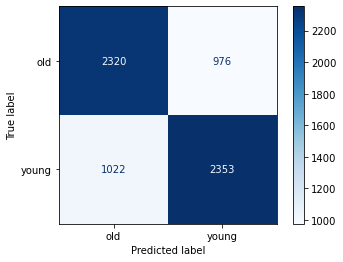

In [618]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.show()